In [1]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [2]:
from tabGAN import TabGAN
from src import constants as const
import helpers

imports_path = "src//imports.ipynb"

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in global vars")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [5]:
import sys
n_epochs = 300
n_critic = 10
opt_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

if sys.platform == "win32":
    jit_compile=True
elif sys.platform == "linux":
    jit_compile=False
else:
    raise RuntimeError("Did not recognize the system platform and therefore does not know how to initialize the storage directory path.")

retrain = True

In [6]:
tg = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = False, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile)

ctg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=jit_compile,
                ctgan=True)

# data_train_changed_dtypes = data_train.copy()
# data_train_changed_dtypes = data_train_changed_dtypes.astype({"capital.gain" : float, "capital.loss" : float})
# tg_qt_dtype = TabGAN(data_train_changed_dtypes, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
#               quantile_transformation_int = True, quantile_rand_transformation = False,
#              noise_discrete_unif_max = noise_discrete_unif_max)  

In [ ]:
ctg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max, jit_compile=False,
                ctgan=True, ctgan_binomial_loss=True, ctgan_log_frequency=True, tf_data_use=False)
ctg_qtr.train(300, batch_size=500, restart_training=False, progress_bar=True)

  0%|          | 0/300 [00:00<?, ?it/s]

[0.0637091547 0.0046985168 0.00759045174 ... 0.0479418747 0.449709117 0.918805242] min_val: 2.48534988e-08 sum: 130 [-2.75342703 -5.36050844 -4.88086414 ... -3.03776598 -0.799154282 -0.0846811] min_val: -17.5102673 total_loss: -3.60394168
[0.00089413923 2.85620149e-06 0.0725520402 ... 0.894682765 0.0300857816 0.0786337554] min_val: 1.60130625e-07 sum: 128 [-7.01964903 -12.7660179 -2.62345123 ... -0.111286074 -3.50370264 -2.54295421] min_val: -15.6472759 total_loss: -3.42966866
[0.105714887 0.00217352738 0.796987116 ... 0.0504462 0.00294405269 0.0406521335] min_val: 1.35942768e-08 sum: 135 [-2.24700952 -6.13140392 -0.22691676 ... -2.98684788 -5.82796812 -3.20270395] min_val: -18.1136169 total_loss: -3.48784757
[0.0474975929 0.00382435601 0.000341478153 ... 0.000896821672 0.00744072581 0.329103351] min_val: 1.76776016e-08 sum: 123 [-3.04707623 -5.56636524 -7.98222685 ... -7.01665354 -4.90078688 -1.11138344] min_val: -17.8509674 total_loss: -3.5050745
[0.000613468408 0.000675538031 0.2160

[0.896756 0.999400675 0.0370946713 ... 0.0754799619 0.976924896 0.987289846] min_val: 2.04311362e-07 sum: 234 [-0.108971477 -0.00059950439 -3.29428196 ... -2.58388805 -0.0233455021 -0.0127916187] min_val: -15.4036207 total_loss: -2.32735038
[0.00423927046 0.999888837 0.996268451 ... 0.929253459 0.99069649 6.9365097e-10] min_val: 5.59593705e-10 sum: 230 [-5.46336412 -0.00011116884 -0.00373852835 ... -0.0733737499 -0.0093470579 -21.0890522] min_val: -21.3038101 total_loss: -2.27314568
[0.304056197 0.00252850913 0.0126316333 ... 0.0971141532 4.75041852e-05 0.407476962] min_val: 4.14883796e-12 sum: 257 [-1.1905427 -5.98012543 -4.37155104 ... -2.33186817 -9.95469284 -0.897770882] min_val: -26.2081928 total_loss: -2.36999035
[0.000552453334 0.972890556 0.903515458 ... 0.9916448 0.0375310965 0.374319106] min_val: 5.073681e-07 sum: 230 [-7.50114155 -0.0274836849 -0.101462059 ... -0.00839030091 -3.28258538 -0.982646585] min_val: -14.494029 total_loss: -2.53791618
[0.0213394109 0.8931095 0.74285

[0.995269597 0.058218807 0.104536623 ... 0.842947602 0.051013723 0.850984395] min_val: 3.23706672e-07 sum: 267 [-0.00474162726 -2.84354687 -2.25821781 ... -0.170850486 -2.97566056 -0.161361486] min_val: -14.943428 total_loss: -2.098212
[0.994358897 0.939589679 4.42567289e-05 ... 0.00885348581 0.0123017933 0.188991025] min_val: 5.24570623e-07 sum: 255 [-0.00565707404 -0.0623120107 -10.0255032 ... -4.72694397 -4.39801025 -1.6660558] min_val: -14.4606857 total_loss: -2.29622936
[0.000685646955 0.129743129 0.348277062 ... 0.999958336 0.984918177 0.0624348894] min_val: 8.84318538e-08 sum: 245 [-7.28514767 -2.04219866 -1.054757 ... -4.16645162e-05 -0.0151967099 -2.7736311] min_val: -16.2410336 total_loss: -2.34730124
[0.376208663 0.993936121 0.999999642 ... 0.00111966324 0.987370968 0.000235908388] min_val: 1.08784923e-06 sum: 244 [-0.977611303 -0.00608233828 -3.57627925e-07 ... -6.79472733 -0.0127094565 -8.35206699] min_val: -13.731308 total_loss: -2.28094625
[0.0335731171 0.999998 0.534037

[0.00767077599 0.985230565 0.999958575 ... 0.00175170845 0.960836112 0.000259592081] min_val: 1.21082451e-07 sum: 241 [-4.87033749 -0.014879589 -4.14260867e-05 ... -6.34716368 -0.0399514213 -8.25639915] min_val: -15.9267941 total_loss: -2.45812345
[0.999946 0.99691397 0.0217286739 ... 0.998749137 0.000287300849 0.803425431] min_val: 2.88678166e-08 sum: 282 [-5.4003267e-05 -0.00309080211 -3.82912254 ... -0.00125164608 -8.15498066 -0.218870908] min_val: -17.3605385 total_loss: -2.10398173
[0.127563909 0.0849574283 0.999999762 ... 0.000514775 0.990347743 0.00259882142] min_val: 4.9817578e-07 sum: 266 [-2.05913782 -2.46560502 -2.38418608e-07 ... -7.57178068 -0.00969914161 -5.95269728] min_val: -14.5123129 total_loss: -2.10372186
[0.966300845 0.97246176 0.0579120964 ... 0.0244074985 0.997150719 0.98670119] min_val: 5.09866084e-07 sum: 260 [-0.034280058 -0.0279245246 -2.84882903 ... -3.71286488 -0.00285334769 -0.0133880302] min_val: -14.4891176 total_loss: -2.14572287
[0.9405123 0.08716546 0

[0.398460239 0.0122490777 0.060259223 ... 0.711644173 0.57311 0.999971628] min_val: 4.51233468e-08 sum: 295 [-0.920147538 -4.40230465 -2.80909967 ... -0.340177238 -0.556677639 -2.83722129e-05] min_val: -16.913866 total_loss: -1.86692619
[0.998238862 0.127701908 0.998221934 ... 0.999587357 0.318411618 0.95705235] min_val: 7.31787466e-08 sum: 284 [-0.00176269107 -2.05805659 -0.00177964882 ... -0.000412728114 -1.14441037 -0.0438971855] min_val: -16.4303608 total_loss: -1.94303715
[0.944062 0.943044603 0.122439265 ... 0.79764086 0.821771443 0.00692810165] min_val: 2.17410427e-08 sum: 275 [-0.0575634427 -0.0586417 -2.10014 ... -0.226096839 -0.196292967 -4.9721694] min_val: -17.6440639 total_loss: -2.07998466
[0.999572575 0.00339950039 0.869829834 ... 0.70697844 0.950636804 0.655405581] min_val: 1.92783219e-07 sum: 290 [-0.000427516294 -5.68412685 -0.139457673 ... -0.346755117 -0.0506231971 -0.422501028] min_val: -15.4616995 total_loss: -1.91602039
[0.13179563 0.0054105958 0.737340569 ... 0.

[0.566386878 0.0334264338 0.801457405 ... 0.676502287 0.997960687 0.987970889] min_val: 8.03823639e-07 sum: 280 [-0.568477929 -3.39840817 -0.22132346 ... -0.39081946 -0.00204139552 -0.012102047] min_val: -14.033886 total_loss: -1.97060883
[0.0879023 0.0250278506 0.00377391349 ... 0.613376677 0.999997735 0.342637509] min_val: 6.10070714e-08 sum: 289 [-2.43152928 -3.68776608 -5.57964277 ... -0.488776058 -2.264979e-06 -1.07108223] min_val: -16.6122761 total_loss: -1.92269957
[0.961909771 0.46657306 0.996928871 ... 0.997359693 0.999846518 0.999990582] min_val: 8.56295969e-07 sum: 293 [-0.038834624 -0.762340665 -0.00307585485 ... -0.00264379871 -0.000153493733 -9.41757844e-06] min_val: -13.9706497 total_loss: -1.83587301
[0.944731 0.999997079 0.991206 ... 0.137111977 0.057577271 0.00292362249] min_val: 7.22779891e-10 sum: 310 [-0.0568550527 -2.92063191e-06 -0.00883290544 ... -1.98695731 -2.85462737 -5.83493185] min_val: -21.0479164 total_loss: -1.57146907
[0.399301201 0.492229968 0.99915742

[0.996090949 0.0159158707 0.536281109 ... 0.999997377 0.0283068232 0.198909163] min_val: 2.36567352e-08 sum: 301 [-0.00391671155 -4.14043856 -0.623096824 ... -2.62260778e-06 -3.56465244 -1.61490703] min_val: -17.559618 total_loss: -1.82436943
[6.73899413e-05 0.126624405 0.613703251 ... 0.866977 0.216357589 0.567789674] min_val: 8.31175157e-07 sum: 312 [-9.6050148 -2.06653 -0.488243759 ... -0.142742857 -1.53082275 -0.566004217] min_val: -14.0004253 total_loss: -1.62852025
[0.00408711052 0.0789533406 0.998462081 ... 0.003802408 0.989753842 0.999362409] min_val: 5.04653576e-11 sum: 277 [-5.49991703 -2.53889823 -0.00153910287 ... -5.57212067 -0.0102990111 -0.000637794205] min_val: -23.709734 total_loss: -1.99420786
[0.996398807 0.999752522 0.000157075 ... 0.153259754 0.0024255591 0.996735036] min_val: 1.69175692e-07 sum: 306 [-0.00360769336 -0.000247509102 -8.75878716 ... -1.87562108 -6.02169323 -0.00327030523] min_val: -15.5923281 total_loss: -1.76251817
[0.970857084 0.969245672 0.0491883

[0.0473416522 0.496517181 0.808130085 ... 0.985970676 0.738100946 0.984560966] min_val: 1.19460344e-06 sum: 316 [-3.05036473 -0.700137198 -0.213032231 ... -0.0141286654 -0.303674668 -0.0155594563] min_val: -13.6376963 total_loss: -1.65234554
[0.999834478 0.996902347 0.996214569 ... 0.987107635 0.997603655 0.207893312] min_val: 1.85646843e-06 sum: 327 [-0.000165535792 -0.00310246111 -0.00379261421 ... -0.0129761929 -0.00239922106 -1.57073021] min_val: -13.1968346 total_loss: -1.56948483
[0.97357595 0.989261389 0.864936769 ... 0.995279729 0.730333567 0.999334097] min_val: 2.43727e-06 sum: 310 [-0.0267794393 -0.0107966866 -0.14509888 ... -0.0047314465 -0.314253896 -0.000666124921] min_val: -12.9246321 total_loss: -1.56560767
[0.881756663 1.98850666e-05 0.000119489407 ... 0.990486622 0.986283123 0.00277383463] min_val: 1.47267576e-06 sum: 309 [-0.125839159 -10.8255415 -9.03228283 ... -0.00955892 -0.013811822 -5.8875246] min_val: -13.4284296 total_loss: -1.68700123
[0.997392595 0.274172366 

[0.665594161 0.231368706 0.999866247 ... 0.414608061 0.000251868158 0.927912831] min_val: 2.92582286e-06 sum: 324 [-0.407075167 -1.46374273 -0.000133761772 ... -0.880421638 -8.28660488 -0.0748174787] min_val: -12.7419348 total_loss: -1.51537263
[0.000187728481 0.639750183 0.984952867 ... 0.0577624105 0.999907672 0.841284513] min_val: 9.0343566e-11 sum: 320 [-8.58051395 -0.446677506 -0.0151614901 ... -2.85141706 -9.23318585e-05 -0.172825366] min_val: -23.1274014 total_loss: -1.69498706
[0.909186304 0.999873459 0.0577762946 ... 0.998886287 0.105741136 0.993390083] min_val: 1.58088778e-08 sum: 331 [-0.0952052474 -0.000126548664 -2.85117674 ... -0.0011143334 -2.24676132 -0.00663185911] min_val: -17.9626942 total_loss: -1.56417155
[0.586670935 0.0157707613 0.117322929 ... 0.987522244 0.684822083 0.690109074] min_val: 4.27693922e-11 sum: 314 [-0.533291221 -4.14959764 -2.14282513 ... -0.0125562567 -0.378596216 -0.370905608] min_val: -23.8751984 total_loss: -1.67812753
[0.999849319 0.685807228

[0.991207 0.999990225 0.00327209802 ... 0.000931079383 0.999956429 0.999757409] min_val: 6.32206536e-07 sum: 327 [-0.00883188285 -9.77521e-06 -5.72232389 ... -6.97916603 -4.35719448e-05 -0.000242620328] min_val: -14.2740498 total_loss: -1.58891928
[0.992260277 0.986630917 0.98504734 ... 0.564901471 0.897710323 0.257285058] min_val: 7.02366265e-07 sum: 324 [-0.00776983 -0.0134592541 -0.0150655778 ... -0.57110393 -0.107907839 -1.35757065] min_val: -14.1688108 total_loss: -1.53114748
[0.999946 6.43157318e-06 0.957300603 ... 0.468728334 0.457810581 0.988084257] min_val: 2.42410533e-06 sum: 351 [-5.4003267e-05 -11.9542913 -0.043637827 ... -0.757731915 -0.78129977 -0.0119873052] min_val: -12.930048 total_loss: -1.39187181
[0.956274927 0.127639487 0.987263203 ... 0.00219341856 0.998661935 0.998465121] min_val: 2.65530211e-08 sum: 314 [-0.0447098278 -2.05854559 -0.0128186056 ... -6.12229395 -0.00133896072 -0.00153605838] min_val: -17.4441223 total_loss: -1.6957618
[0.316854835 0.999276459 0.99

[0.00617593 0.0293686148 0.785584152 ... 0.955212176 0.999007463 0.999831736] min_val: 2.30723374e-09 sum: 333 [-5.08709574 -3.52782869 -0.241327703 ... -0.0458217897 -0.000993029447 -0.000168278071] min_val: -19.8872166 total_loss: -1.42411935
[0.999966681 0.991971135 0.125861824 ... 0.104956381 0.133487836 0.0889697522] min_val: 2.99035741e-10 sum: 346 [-3.3319553e-05 -0.0080612693 -2.07257056 ... -2.25421047 -2.01374483 -2.41945887] min_val: -21.9304581 total_loss: -1.34835
[0.999840379 0.999998689 0.321973622 ... 0.0029953 0.867021143 0.729373753] min_val: 1.12242947e-06 sum: 360 [-0.000159633986 -1.31130309e-06 -1.13328564 ... -5.81071091 -0.14269191 -0.315568984] min_val: -13.7000151 total_loss: -1.27049565
[0.99750483 0.649784088 0.0622330643 ... 0.999619544 0.997070312 0.987186253] min_val: 1.61467369e-07 sum: 342 [-0.00249828771 -0.43111515 -2.77686882 ... -0.000380528829 -0.00293398742 -0.0128965508] min_val: -15.6389627 total_loss: -1.40422511
[0.243011713 0.923526168 0.9008

[0.999859571 0.999942124 0.0453770682 ... 0.00511727808 0.0137636969 0.970422864] min_val: 1.86637567e-06 sum: 366 [-0.000140438409 -5.78777835e-05 -3.0927484 ... -5.27513266 -4.28572083 -0.0300233606] min_val: -13.1915121 total_loss: -1.19019985
[0.999932289 0.999711931 0.897349775 ... 0.999970376 0.999910891 0.99986732] min_val: 8.8764773e-06 sum: 362 [-6.77131684e-05 -0.00028811075 -0.108309552 ... -2.96239468e-05 -8.91129166e-05 -0.000132688743] min_val: -11.6321058 total_loss: -1.25286436
[0.0196656957 0.999992 0.989918172 ... 0.998672783 0.999957919 0.987583816] min_val: 1.66118309e-06 sum: 365 [-3.9288795 -7.98705423e-06 -0.0101329936 ... -0.00132809812 -4.20817632e-05 -0.0124939084] min_val: -13.3079805 total_loss: -1.23358858
[0.999968529 0.99997592 0.00129216304 ... 0.0374719799 0.9999246 0.999999881] min_val: 3.09756246e-07 sum: 361 [-3.14717472e-05 -2.40805657e-05 -6.65143776 ... -3.28416181 -7.54027205e-05 -1.19209304e-07] min_val: -14.9874802 total_loss: -1.1536777
[0.004

[0.851314485 0.999985337 0.957981 ... 0.999986 0.999931693 0.608429253] min_val: 2.33091124e-09 sum: 370 [-0.160973668 -1.46628499e-05 -0.0429273434 ... -1.40071897e-05 -6.83092585e-05 -0.49687463] min_val: -19.8770065 total_loss: -1.1887008
[0.125984296 0.999790728 0.999983847 ... 0.98368603 0.999999523 0.883904696] min_val: 5.23081189e-10 sum: 372 [-2.07159805 -0.000209293808 -1.61529897e-05 ... -0.0164485089 -4.76837272e-07 -0.12340603] min_val: -21.3712845 total_loss: -1.19723189
[0.99930346 0.999990046 0.97214669 ... 0.927274883 0.610728145 0.0115832286] min_val: 1.1194245e-06 sum: 372 [-0.000696782547 -9.95402479e-06 -0.0282485709 ... -0.0755052269 -0.493103355 -4.45819712] min_val: -13.7026958 total_loss: -0.979850531
[0.999810159 0.991902411 0.999997139 ... 0.991931379 0.852113664 0.999460518] min_val: 7.24814819e-10 sum: 376 [-0.000189858809 -0.00813055225 -2.86102704e-06 ... -0.00810134877 -0.160035357 -0.000539627217] min_val: -21.045105 total_loss: -1.06142366
[0.0002442938

[0.999900818 0.995313883 0.915457428 ... 0.998637736 0.996543109 0.999738872] min_val: 1.64059088e-07 sum: 379 [-9.91870475e-05 -0.00469713146 -0.0883314162 ... -0.00136319292 -0.00346287945 -0.000261162058] min_val: -15.6230392 total_loss: -0.995165288
[0.00713354908 0.0570227467 0.999159813 ... 0.994935274 0.77267772 0.855508208] min_val: 9.54366669e-07 sum: 375 [-4.94294643 -2.86430502 -0.000840540219 ... -0.00507759489 -0.257893234 -0.156059593] min_val: -13.8622179 total_loss: -1.00663233
[0.999425769 0.999646187 0.901577234 ... 0.84647727 0.999994755 0.36412859] min_val: 7.86674761e-08 sum: 379 [-0.000574396108 -0.000353875774 -0.103609569 ... -0.166671932 -5.24522238e-06 -1.01024818] min_val: -16.358036 total_loss: -0.925834
[0.547853231 0.993477106 0.999976575 ... 0.999490678 0.999700308 0.997861326] min_val: 1.36550602e-08 sum: 377 [-0.60174787 -0.00654426077 -2.34249e-05 ... -0.000509451434 -0.000299737061 -0.00214096438] min_val: -18.1091557 total_loss: -0.981928766
[0.77558

[0.748915255 0.99657625 0.963234782 ... 0.999995 0.584596276 0.999990463] min_val: 7.92237472e-07 sum: 408 [-0.289129436 -0.00342962495 -0.037458092 ... -5.00680289e-06 -0.536833763 -9.53678864e-06] min_val: -14.0484047 total_loss: -0.776385367
[0.997133732 1 0.993219078 ... 0.999965906 0.985013485 0.999999046] min_val: 3.164551e-07 sum: 397 [-0.00287038367 0 -0.00680401735 ... -3.40944389e-05 -0.0150999473 -9.53674771e-07] min_val: -14.9660845 total_loss: -0.883765459
[0.00156487327 0.999998271 0.99984628 ... 0.956213176 0.999873281 0.999999881] min_val: 4.56560542e-07 sum: 367 [-6.45995045 -1.72853618e-06 -0.000153732195 ... -0.0447744019 -0.000126727507 -1.19209304e-07] min_val: -14.5995445 total_loss: -1.14612079
[0.999993682 0.998701096 0.999934 ... 0.969069242 0.96334213 0.970545411] min_val: 3.92361812e-07 sum: 392 [-6.31811236e-06 -0.00129974878 -6.59845173e-05 ... -0.0314192101 -0.0373466536 -0.0298970863] min_val: -14.7510815 total_loss: -0.91819495
[0.772564113 0.999998271 0

[0.797068 0.999261379 0.997646809 ... 0.999197721 0.71537441 0.999455392] min_val: 1.01470427e-07 sum: 412 [-0.226815283 -0.000738893694 -0.00235596439 ... -0.000802600523 -0.334949225 -0.000544756] min_val: -16.1034985 total_loss: -0.760637641
[1 0.999988198 0.986065149 ... 0.554026783 0.144071236 0.000748346] min_val: 5.44603267e-07 sum: 399 [0 -1.18017897e-05 -0.0140328519 ... -0.590542257 -1.93744743 -7.19764519] min_val: -14.4232082 total_loss: -0.751187921
[0.999011278 0.0281243548 0.35290283 ... 1 0.999943197 0.995522201] min_val: 4.76790518e-07 sum: 396 [-0.000989210908 -3.57111931 -1.04156256 ... 0 -5.68048381e-05 -0.00448785443] min_val: -14.5561886 total_loss: -0.814177454
[0.0595886372 0.999950528 0.00266076904 ... 0.992452919 0.999518275 0.999997139] min_val: 9.33535489e-07 sum: 409 [-2.82029033 -4.94730775e-05 -5.92914 ... -0.00757570378 -0.000481840805 -2.86102704e-06] min_val: -13.8842869 total_loss: -0.708789885
[0.248117641 0.535675824 0.803700924 ... 0.975219846 0.99

[0.960119 0.999999642 0.93261379 ... 0.999989867 0.145723939 0.999998271] min_val: 1.12070684e-05 sum: 425 [-0.0406980328 -3.57627925e-07 -0.0697641075 ... -1.01328405e-05 -1.92604125 -1.72853618e-06] min_val: -11.3989658 total_loss: -0.564015508
[0.823997796 0.999975502 0.457773149 ... 1 0.492574543 0.213622496] min_val: 0.000139811629 sum: 416 [-0.193587422 -2.44978091e-05 -0.781381547 ... 0 -0.708109498 -1.54354489] min_val: -8.87521458 total_loss: -0.624957502
[0.999993265 0.985730708 0.999975801 ... 0.999967456 0.99694705 0.295596063] min_val: 1.89796936e-07 sum: 420 [-6.7353476e-06 -0.0143720778 -2.41997786e-05 ... -3.25446672e-05 -0.00305761956 -1.21876144] min_val: -15.4773111 total_loss: -0.730093896
[0.999978542 0.999946415 0.839426219 ... 0.46062535 0.21495229 0.999993324] min_val: 3.65535379e-06 sum: 406 [-2.14579031e-05 -5.35860127e-05 -0.175036699 ... -0.775170267 -1.53733921 -6.6757425e-06] min_val: -12.5193176 total_loss: -0.716133893
[0.849579096 0.999942422 0.99532061

[0.99993825 0.999926925 0.99811852 ... 0.999997079 0.999999642 0.0738802478] min_val: 1.18127659e-07 sum: 419 [-6.17523183e-05 -7.30779648e-05 -0.00188325241 ... -2.92063191e-06 -3.57627925e-07 -2.60530972] min_val: -15.9515 total_loss: -0.602523565
[0.999738 0.976611733 0.814993322 ... 0.9977175 0.999813735 0.999735594] min_val: 8.59998818e-06 sum: 433 [-0.000262056361 -0.0236661136 -0.20457536 ... -0.00228510913 -0.000186281861 -0.000264441158] min_val: -11.6637497 total_loss: -0.506581426
[0.193404853 0.0149010634 8.56023398e-05 ... 0.999653 0.999465704 0.998963475] min_val: 1.92778629e-07 sum: 418 [-1.64296961 -4.20632267 -9.365798 ... -0.000347078458 -0.000534438819 -0.00103706238] min_val: -15.4617233 total_loss: -0.684505939
[0.999895096 0.999961615 0.8638677 ... 0.998783171 0.999998927 0.972628534] min_val: 7.64372362e-06 sum: 429 [-0.000104909675 -3.83861297e-05 -0.146335647 ... -0.00121756981 -1.07288417e-06 -0.0277530439] min_val: -11.7816257 total_loss: -0.628798842
[0.4807

[0.999692678 0.996357739 0.986975074 ... 0.999857664 0.999998271 0.972196639] min_val: 2.69294833e-06 sum: 438 [-0.000307368784 -0.00364891021 -0.0131104942 ... -0.00014234602 -1.72853618e-06 -0.0281971917] min_val: -12.8248739 total_loss: -0.560184717
[0.99915123 0.999999523 0.98183763 ... 0.991802216 0.999762 0.999971509] min_val: 4.12389636e-06 sum: 431 [-0.000849130563 -4.76837272e-07 -0.0183293298 ... -0.00823157094 -0.000238029679 -2.84914258e-05] min_val: -12.3987122 total_loss: -0.50639689
[0.999968 0.999980688 0.999924779 ... 0.999999762 0.000144022226 0.99998939] min_val: 0.000134749105 sum: 434 [-3.20082072e-05 -1.93120923e-05 -7.52238921e-05 ... -2.38418608e-07 -8.84554291 -1.06096832e-05] min_val: -8.91209602 total_loss: -0.533335924
[0.947243452 0.999996781 0.999969304 ... 1 0.929807 0.999996781] min_val: 0.000202630283 sum: 431 [-0.0541991405 -3.21865605e-06 -3.0696865e-05 ... 0 -0.0727782324 -3.21865605e-06] min_val: -8.5041275 total_loss: -0.534186244
[0.772056699 1 0.

[0.99994874 0.999924123 0.99999845 ... 0.999984264 0.969683409 0.999164343] min_val: 1.17426726e-08 sum: 447 [-5.12613078e-05 -7.58795941e-05 -1.54972201e-06 ... -1.57357499e-05 -0.0307856426 -0.000836006482] min_val: -18.2600365 total_loss: -0.501772225
[0.999987245 0.998812139 0.470272958 ... 0.977741778 0.869259298 0.983242452] min_val: 9.37263334e-09 sum: 440 [-1.27554749e-05 -0.00118856702 -0.754442 ... -0.0225096755 -0.140113816 -0.0168995447] min_val: -18.4854717 total_loss: -0.498483509
[0.99982959 0.485840052 0.999942124 ... 0.999999642 0.150715306 0.0616965517] min_val: 1.37611345e-08 sum: 441 [-0.000170424202 -0.721875846 -5.78777835e-05 ... -3.57627925e-07 -1.89236259 -2.78552723] min_val: -18.1014175 total_loss: -0.421812087
[0.766674936 0.999661326 0.989726067 ... 0.999964833 0.951439798 0.987787426] min_val: 6.17058106e-07 sum: 442 [-0.265692383 -0.000338730955 -0.0103270747 ... -3.51673589e-05 -0.0497788638 -0.0122877611] min_val: -14.2983027 total_loss: -0.453012973
[0

[0.84554106 0.999942183 0.999960542 ... 0.999106407 0.200201541 0.982698083] min_val: 1.29729078e-05 sum: 452 [-0.167778552 -5.78181753e-05 -3.94590534e-05 ... -0.000893992314 -1.60843074 -0.0174533445] min_val: -11.2526474 total_loss: -0.315477878
[0.999985576 0.844143689 0.999999642 ... 0.119712129 0.998992145 0.470739156] min_val: 2.63869673e-08 sum: 446 [-1.44244277e-05 -0.169432551 -3.57627925e-07 ... -2.12266541 -0.00100836321 -0.753451169] min_val: -17.4503956 total_loss: -0.406472236
[0.998470962 0.422906846 0.99994427 ... 0.999009073 0.582198501 0.999999642] min_val: 7.98245128e-06 sum: 437 [-0.00153020816 -0.860603333 -5.57318963e-05 ... -0.000991418492 -0.540943861 -3.57627925e-07] min_val: -11.738265 total_loss: -0.481419981
[0.999999285 0.981625199 0.993416846 ... 0.999999881 2.66662937e-05 0.999503136] min_val: 3.40846782e-06 sum: 431 [-7.15256e-07 -0.0185457151 -0.00660491874 ... -1.19209304e-07 -10.5321102 -0.000496987777] min_val: -12.5892477 total_loss: -0.553074181
[

[0.99994576 0.0430621393 0.972305119 ... 0.999976575 0.990468085 0.999999881] min_val: 5.915163e-06 sum: 444 [-5.42416965e-05 -3.14511108 -0.0280856155 ... -2.34249e-05 -0.00957763474 -1.19209304e-07] min_val: -12.0379915 total_loss: -0.419658095
[0.12688826 0.999757409 0.999984503 ... 0.999991119 0.99998337 0.999999642] min_val: 2.54885799e-05 sum: 444 [-2.06444836 -0.000242620328 -1.54973277e-05 ... -8.88113118e-06 -1.66298341e-05 -3.57627925e-07] min_val: -10.57728 total_loss: -0.465601504
[0.999993265 0.999920607 0.99999845 ... 0.998490393 0.999998808 0.996346951] min_val: 4.84689311e-09 sum: 446 [-6.7353476e-06 -7.93965373e-05 -1.54972201e-06 ... -0.00151074748 -1.19209358e-06 -0.00365973823] min_val: -19.144928 total_loss: -0.350390971
[0.999999523 0.999979615 0.999999881 ... 0.991386235 0.99995482 0.933143795] min_val: 9.38597111e-07 sum: 438 [-4.76837272e-07 -2.03849959e-05 -1.19209304e-07 ... -0.00865107775 -4.5181343e-05 -0.0691959709] min_val: -13.8788795 total_loss: -0.4488

[0.997544 0.999997497 0.999998689 ... 0.982516348 0.999999046 0.989308894] min_val: 3.09996358e-06 sum: 464 [-0.00245903037 -2.50339826e-06 -1.31130309e-06 ... -0.0176382959 -9.53674771e-07 -0.0107486667] min_val: -12.6841202 total_loss: -0.318890482
[0.999999881 0.998930395 0.998468816 ... 0.999993 0.99527669 1] min_val: 3.82874177e-09 sum: 463 [-1.19209304e-07 -0.00107017776 -0.00153235719 ... -6.97376754e-06 -0.00473450078 0] min_val: -19.3807297 total_loss: -0.321186036
[0.999986589 0.959756851 0.882678449 ... 0.999855697 0.999893963 0.99949646] min_val: 2.16927469e-06 sum: 450 [-1.34111351e-05 -0.0410753079 -0.124794297 ... -0.000144313264 -0.000106042287 -0.000503666874] min_val: -13.0411177 total_loss: -0.426868647
[1 0.999997079 0.999757 ... 0.943190575 0.999995232 0.722862244] min_val: 5.4685944e-07 sum: 449 [0 -2.92063191e-06 -0.000243037663 ... -0.0584869236 -4.76838295e-06 -0.324536622] min_val: -14.4190741 total_loss: -0.414932758
[0.999944329 0.999999762 0.972675085 ... 0

[0.975830495 0.172809914 0.999993682 ... 0.999997139 0.999992788 0.979972482] min_val: 0.000695650466 sum: 459 [-0.0244663805 -1.75556302 -6.31811236e-06 ... -2.86102704e-06 -7.21218794e-06 -0.0202307869] min_val: -7.27066326 total_loss: -0.277551502
[0.999996 0.999999106 0.999957502 ... 0.999753416 0.999990344 0.999999523] min_val: 1.73861096e-07 sum: 460 [-3.99351939e-06 -8.9407007e-07 -4.24990139e-05 ... -0.000246614829 -9.65599884e-06 -4.76837272e-07] min_val: -15.5650091 total_loss: -0.322440296
[1 0.247097433 0.999999881 ... 0.987287641 0.992343485 0.96617347] min_val: 3.7167596e-05 sum: 458 [0 -1.39797258 -1.19209304e-07 ... -0.0127938529 -0.0076859761 -0.0344118848] min_val: -10.2000732 total_loss: -0.270747691
[0.999446511 0.958738804 0.999999106 ... 0.999600708 0.999985218 0.999995828] min_val: 0.000141781 sum: 460 [-0.000553641934 -0.0421366058 -8.9407007e-07 ... -0.00039937126 -1.4782061e-05 -4.17233377e-06] min_val: -8.86122704 total_loss: -0.250824779
[0.999999881 0.99988

[0.999942183 0.999999762 1 ... 0.0891990289 1 0.987051308] min_val: 6.22035941e-07 sum: 458 [-5.78181753e-05 -2.38418608e-07 0 ... -2.41688514 0 -0.0130332569] min_val: -14.2902679 total_loss: -0.30929175
[0.99997741 1 0.999996 ... 0.999989271 0.999999642 0.999483466] min_val: 8.12245489e-05 sum: 453 [-2.2590415e-05 0 -3.99351939e-06 ... -1.07288934e-05 -3.57627925e-07 -0.000516667322] min_val: -9.418293 total_loss: -0.290082693
[0.998041332 0.999566376 0.999961793 ... 0.146719366 0.999888301 0.537880898] min_val: 2.05669053e-07 sum: 458 [-0.00196058885 -0.000433717825 -3.82073085e-05 ... -1.91923356 -0.00011170534 -0.620118141] min_val: -15.3969975 total_loss: -0.402264208
[0.998547554 0.998789608 0.999999642 ... 0.999999523 0.988339126 0.999948323] min_val: 2.02196425e-05 sum: 458 [-0.00145350175 -0.00121112459 -3.57627925e-07 ... -4.76837272e-07 -0.011729395 -5.16785622e-05] min_val: -10.808856 total_loss: -0.340534747
[0.999997735 0.999479175 0.996031106 ... 0.990834951 0.97145915 

[0.999959946 0.999239087 1 ... 0.120350234 0.99982208 0.0134984879] min_val: 1.47997225e-05 sum: 469 [-4.00551253e-05 -0.000761202537 0 ... -2.11734915 -0.000177935697 -4.30517769] min_val: -11.1209021 total_loss: -0.274166048
[0.999999523 0.99989444 1 ... 0.999969959 0.999999642 0.266742051] min_val: 5.72179815e-05 sum: 462 [-4.76837272e-07 -0.000105565399 0 ... -3.00411921e-05 -3.57627925e-07 -1.32147324] min_val: -9.76864243 total_loss: -0.237563491
[0.975520909 1 0.99999845 ... 0.999999642 0.999902368 0.99556] min_val: 1.27902958e-05 sum: 464 [-0.0247836858 0 -1.54972201e-06 ... -3.57627925e-07 -9.76371739e-05 -0.00444989558] min_val: -11.2668238 total_loss: -0.262370229
[0.999999881 0.999999106 0.999997497 ... 0.968792498 0.998571634 0.000291520584] min_val: 1.36049202e-05 sum: 461 [-1.19209304e-07 -8.9407007e-07 -2.50339826e-06 ... -0.0317048319 -0.00142938679 -8.1404] min_val: -11.2050791 total_loss: -0.270777524
[1 0.995188117 0.982980609 ... 1 0.999991715 0.996330321] min_val:

[0.999958873 0.999825299 0.999727249 ... 0.999046862 0.81428206 0.952683032] min_val: 1.03612513e-06 sum: 472 [-4.11280489e-05 -0.000174716479 -0.000272788049 ... -0.000953592418 -0.205448464 -0.0484730303] min_val: -13.7800226 total_loss: -0.206833854
[0.999324799 0.989136636 0.00194087939 ... 0.999999285 0.999982357 0.999999881] min_val: 0.000239384026 sum: 478 [-0.000675429474 -0.0109228007 -6.24461412 ... -7.15256e-07 -1.76431313e-05 -1.19209304e-07] min_val: -8.33744144 total_loss: -0.149600655
[0.313262552 0.999968648 0.999999642 ... 0.999982774 0.0012056327 0.965924203] min_val: 5.09491656e-06 sum: 462 [-1.16071367 -3.13525343e-05 -3.57627925e-07 ... -1.72258915e-05 -6.72075081 -0.0346699134] min_val: -12.1872673 total_loss: -0.278505832
[0.999985754 1 0.912498057 ... 0.818374932 0.99955672 0.999994934] min_val: 8.20965283e-07 sum: 477 [-1.4245612e-05 0 -0.0915693194 ... -0.2004347 -0.000443378027 -5.06640754e-06] min_val: -14.012785 total_loss: -0.199215755
[0.999288917 0.99998

[0.999397457 0.999999046 0.99952352 ... 0.999990225 0.999801397 0.998469591] min_val: 3.59099868e-05 sum: 475 [-0.000602724962 -9.53674771e-07 -0.000476593093 ... -9.77521e-06 -0.000198622394 -0.00153158116] min_val: -10.2344952 total_loss: -0.183828518
[0.999549448 0.999999642 0.999884784 ... 0.884903669 0.999865711 0.999999106] min_val: 3.00094962e-05 sum: 472 [-0.000450653053 -3.57627925e-07 -0.000115222414 ... -0.122276485 -0.000134298287 -8.9407007e-07] min_val: -10.4139967 total_loss: -0.204012364
[0.999990225 0.994711637 0.999987245 ... 1 0.999999046 0.936982] min_val: 9.45111515e-06 sum: 473 [-9.77521e-06 -0.00530239521 -1.27554749e-05 ... 0 -9.53674771e-07 -0.06509123] min_val: -11.5693779 total_loss: -0.246578246
[0.998594165 0.999948084 0.999999523 ... 0.999663472 0.999999344 0.999990582] min_val: 5.56990199e-06 sum: 465 [-0.00140682422 -5.19169917e-05 -4.76837272e-07 ... -0.00033658446 -6.5565132e-07 -9.41757844e-06] min_val: -12.0981331 total_loss: -0.236187592
[0.999998 0

[0.999448717 1 0.99987942 ... 1 0.999932468 0.999997497] min_val: 4.99529742e-05 sum: 464 [-0.000551435398 0 -0.000120587465 ... 0 -6.75343399e-05 -2.50339826e-06] min_val: -9.90442848 total_loss: -0.252061725
[0.998917699 0.999935925 1 ... 0.999795437 0.999997854 0.999948144] min_val: 9.53300623e-05 sum: 469 [-0.00108288729 -6.4077045e-05 0 ... -0.000204584067 -2.14576949e-06 -5.1857387e-05] min_val: -9.25816536 total_loss: -0.212030262
[0.999966919 1 0.996317327 ... 0.999791443 0.989777863 1] min_val: 0.00063978415 sum: 477 [-3.30811235e-05 0 -0.0036894707 ... -0.000208578407 -0.0102747418 0] min_val: -7.35437965 total_loss: -0.161872774
[0.999983668 1 1 ... 0.999999523 0.999824107 0.999997854] min_val: 4.36259917e-08 sum: 476 [-1.63318055e-05 0 0 ... -4.76837272e-07 -0.000175908775 -2.14576949e-06] min_val: -16.9476128 total_loss: -0.231669441
[0.999982834 0.99998 0.98985815 ... 0.998995125 0.984619677 0.999999285] min_val: 2.85959601e-07 sum: 476 [-1.7166285e-05 -2.00273607e-05 -0.

[0.999997497 0.999966681 0.999999344 ... 1 0.99999547 0.852175534] min_val: 1.65592141e-07 sum: 471 [-2.50339826e-06 -3.3319553e-05 -6.5565132e-07 ... 0 -4.52996346e-06 -0.159962744] min_val: -15.6137381 total_loss: -0.23686637
[0.999989271 0.542177916 0.999997139 ... 0.989786148 0.999999523 0.892277539] min_val: 0.000174073401 sum: 479 [-1.07288934e-05 -0.6121611 -2.86102704e-06 ... -0.0102663711 -4.76837272e-07 -0.113978051] min_val: -8.65603352 total_loss: -0.136276871
[1 1 0.999999881 ... 0.999999762 0.000278874766 0.996679902] min_val: 0.000278874766 sum: 469 [0 0 -1.19209304e-07 ... -2.38418608e-07 -8.1847477 -0.0033256216] min_val: -8.1847477 total_loss: -0.236066
[0.999997079 0.995984316 0.999996781 ... 0.999985516 0.9994995 1] min_val: 0.000531813595 sum: 477 [-2.92063191e-06 -0.00402376847 -3.21865605e-06 ... -1.44840333e-05 -0.000500625523 0] min_val: -7.53921747 total_loss: -0.146964833
[0.999874294 0.999992788 0.999982119 ... 1 0.967668474 0.999999046] min_val: 0.002960585

[1 0.999975 1 ... 0.99999094 1 0.977897406] min_val: 8.7630171e-05 sum: 474 [0 -2.49746572e-05 0 ... -9.05994693e-06 0 -0.0223505162] min_val: -9.34238529 total_loss: -0.143579781
[0.878701687 0.999905 0.999971628 ... 0.999967217 0.999850333 0.988938332] min_val: 0.0116496636 sum: 478 [-0.129309818 -9.50143149e-05 -2.83722129e-05 ... -3.2783093e-05 -0.000149678468 -0.0111233033] min_val: -4.45247793 total_loss: -0.114983208
[0.232110977 0.99999845 0.999897242 ... 0.999176621 0.963017046 1] min_val: 0.000375593198 sum: 473 [-1.4605397 -1.54972201e-06 -0.00010276369 ... -0.000823717739 -0.0376841649 0] min_val: -7.8870039 total_loss: -0.202820122
[0.999999881 0.999219 0.9999156 ... 1 0.999972105 0.999306917] min_val: 2.66413523e-11 sum: 481 [-1.19209304e-07 -0.000781304785 -8.44037422e-05 ... 0 -2.7895363e-05 -0.000693323091] min_val: -24.3485565 total_loss: -0.182492167
[1 1 0.996435583 ... 1 0.999996066 0.999709964] min_val: 5.83104566e-07 sum: 479 [0 0 -0.00357078505 ... 0 -3.93391429

[1 1 0.981593907 ... 0.999972284 0.999949813 1] min_val: 0.000214175205 sum: 466 [0 0 -0.0185775924 ... -2.77165436e-05 -5.01883696e-05 0] min_val: -8.44871616 total_loss: -0.214731932
[0.999999762 1 0.999836504 ... 1 1 0.999996662] min_val: 6.470878e-05 sum: 482 [-2.38418608e-07 0 -0.000163508914 ... 0 0 -3.33786579e-06] min_val: -9.64561367 total_loss: -0.141304836
[0.999997318 0.999865353 0.999992847 ... 0.973026335 0.999973476 0.999986827] min_val: 0.000239235465 sum: 478 [-2.68221265e-06 -0.000134655958 -7.15258284e-06 ... -0.0273441318 -2.6524418e-05 -1.31727129e-05] min_val: -8.33806229 total_loss: -0.167429253
[0.999852 0.994476318 4.30920608e-07 ... 0.999545455 0.99995023 0.999999523] min_val: 4.30920608e-07 sum: 475 [-0.000148009291 -0.00553899352 -14.657342 ... -0.000454648369 -4.97711153e-05 -4.76837272e-07] min_val: -14.657342 total_loss: -0.2192716
[0.999999762 0.999999881 0.984240949 ... 0.99992305 0.984086931 0.998178363] min_val: 0.000115277464 sum: 478 [-2.38418608e-0

[1 1 1 ... 0.999999642 0.998316944 0.999999762] min_val: 0.000179370574 sum: 483 [0 0 0 ... -3.57627925e-07 -0.00168447429 -2.38418608e-07] min_val: -8.62605667 total_loss: -0.112049043
[0.999999881 0.998551667 0.999998212 ... 0.999799788 0.999999881 0.999995708] min_val: 2.93527796e-06 sum: 472 [-1.19209304e-07 -0.0014493831 -1.78814093e-06 ... -0.00020023204 -1.19209304e-07 -4.29154352e-06] min_val: -12.7387085 total_loss: -0.255330533
[0.870156705 0.99966687 0.999999642 ... 1 0.882085562 0.982020378] min_val: 6.82872633e-05 sum: 475 [-0.139081955 -0.000333185861 -3.57627925e-07 ... 0 -0.125466213 -0.0181432199] min_val: -9.59178734 total_loss: -0.181338921
[0.999990046 0.997570932 1 ... 0.916260064 1 1] min_val: 4.85860692e-05 sum: 484 [-9.95402479e-06 -0.00243202318 0 ... -0.0874550417 0 0] min_val: -9.93217373 total_loss: -0.0940336287
[0.757084489 0.984699428 0.519837558 ... 0.999967 0.999535739 0.999975085] min_val: 1.04123101e-05 sum: 480 [-0.278280437 -0.0154188331 -0.65423888

[1 0.999913335 0.999771774 ... 0.99769038 0.999318719 0.999989808] min_val: 2.61760164e-07 sum: 477 [0 -8.66689079e-05 -0.000228252233 ... -0.00231229165 -0.00068151328 -1.01924461e-05] min_val: -15.1558371 total_loss: -0.143424019
[0.999959648 1 0.999983609 ... 0.999417365 0.999487758 1] min_val: 0.00262751151 sum: 486 [-4.03531594e-05 0 -1.63914119e-05 ... -0.000582805194 -0.000512373575 0] min_val: -5.9417181 total_loss: -0.0945111811
[0.999997735 0.999999642 0.999999046 ... 1 0.999977469 0.997968733] min_val: 9.22788331e-06 sum: 486 [-2.264979e-06 -3.57627925e-07 -9.53674771e-07 ... 0 -2.25308104e-05 -0.0020333326] min_val: -11.5932808 total_loss: -0.12913762
[0.999853611 0.999979377 1 ... 0.999997616 0.999982834 1] min_val: 1.22813367e-06 sum: 468 [-0.000146399718 -2.06234199e-05 0 ... -2.38418875e-06 -1.7166285e-05 0] min_val: -13.6100149 total_loss: -0.216716528
[0.999994516 0.99999547 0.997591138 ... 0.999934852 0.998854518 0.955360711] min_val: 1.12106545e-06 sum: 489 [-5.4836

[0.948573291 1 1 ... 1 0.999999344 0.999833167] min_val: 6.42570649e-06 sum: 481 [-0.0527962223 0 0 ... 0 -6.5565132e-07 -0.000166847312] min_val: -11.955204 total_loss: -0.154100373
[0.999992 0.999981165 0.999999523 ... 0.386812389 0.999769747 1] min_val: 3.97412259e-05 sum: 481 [-7.98705423e-06 -1.8835246e-05 -4.76837272e-07 ... -0.949815512 -0.000230279256 0] min_val: -10.1331215 total_loss: -0.158248931
[0.999707878 0.999997377 0.998532057 ... 0.999996543 0.999718547 0.982186258] min_val: 3.26168242e-06 sum: 480 [-0.00029216503 -2.62260778e-06 -0.00146902166 ... -3.45707531e-06 -0.000281492743 -0.0179743171] min_val: -12.6332674 total_loss: -0.167723864
[0.968149722 1 0.999997735 ... 0.99999392 1 1] min_val: 9.88043248e-05 sum: 474 [-0.0323685333 0 -2.264979e-06 ... -6.07969241e-06 0 0] min_val: -9.22236919 total_loss: -0.179001674
[0.999542713 1 0.828044057 ... 0.999999642 0.99977541 1] min_val: 0.000646574888 sum: 488 [-0.000457391434 0 -0.188688919 ... -3.57627925e-07 -0.0002246

[1 0.999986887 1 ... 0.996784806 1 0.999999762] min_val: 0.000932627 sum: 488 [0 -1.31131083e-05 0 ... -0.00322037353 0 -2.38418608e-07] min_val: -6.97750521 total_loss: -0.0852270499
[0.999944031 1 0.999913633 ... 1 1 1] min_val: 2.92234787e-08 sum: 490 [-5.59703294e-05 0 -8.63708628e-05 ... 0 0 0] min_val: -17.3482933 total_loss: -0.104522422
[0.874307692 1 0.999999046 ... 0.837559342 1 1] min_val: 6.61846425e-05 sum: 489 [-0.134322912 0 -9.53674771e-07 ... -0.177263156 0 0] min_val: -9.62306213 total_loss: -0.0951030552
[0.999934196 1 0.999999762 ... 0.984742165 0.999999881 0.999918222] min_val: 8.59852935e-06 sum: 473 [-6.58056961e-05 0 -2.38418608e-07 ... -0.0153754335 -1.19209304e-07 -8.17809196e-05] min_val: -11.6639194 total_loss: -0.191616282
[0.984971702 0.916115761 1 ... 1 0.970581472 1] min_val: 0.00319426274 sum: 491 [-0.0151423672 -0.087612547 0 ... 0 -0.0298599321 0] min_val: -5.74639893 total_loss: -0.0651193708
[0.993996143 0.999999762 0.999990106 ... 0.999998212 0.999

[0.999999344 0.99999845 0.999883115 ... 0.998795 0.997900724 0.999993] min_val: 0.000595957565 sum: 483 [-6.5565132e-07 -1.54972201e-06 -0.000116891541 ... -0.00120575377 -0.00210148212 -6.97376754e-06] min_val: -7.42534113 total_loss: -0.118094943
[0.73047 0.873503208 0.999996305 ... 1 0.999999523 1] min_val: 1.29132395e-05 sum: 478 [-0.314067125 -0.135243475 -3.6954948e-06 ... 0 -4.76837272e-07 0] min_val: -11.2572575 total_loss: -0.190387905
[1 0.999960721 0.999986291 ... 1 0.999999881 0.00142381724] min_val: 3.19766087e-07 sum: 484 [0 -3.92802322e-05 -1.3709162e-05 ... 0 -1.19209304e-07 -6.5544138] min_val: -14.9556761 total_loss: -0.152230069
[0.999999881 1 0.998943627 ... 0.999996781 0.999991119 0.999999881] min_val: 0.00148968154 sum: 489 [-1.19209304e-07 0 -0.00105693145 ... -3.21865605e-06 -8.88113118e-06 -1.19209304e-07] min_val: -6.50919294 total_loss: -0.0815323591
[0.99999845 0.999996781 0.999999046 ... 1 1 1] min_val: 0.00443033688 sum: 487 [-1.54972201e-06 -3.21865605e-0

[1 0.951835275 0.999987483 ... 1 1 0.999950469] min_val: 0.00425705966 sum: 485 [0 -0.049363289 -1.25170536e-05 ... 0 0 -4.95326858e-05] min_val: -5.45917654 total_loss: -0.077525422
[0.999999881 0.999999762 0.999980211 ... 0.992638111 0.999999881 0.999958575] min_val: 0.000740854419 sum: 489 [-1.19209304e-07 -2.38418608e-07 -1.97889385e-05 ... -0.00738912122 -1.19209304e-07 -4.14260867e-05] min_val: -7.20770645 total_loss: -0.0623709112
[0.999796212 0.999999285 0.999245167 ... 1 0.99859345 1] min_val: 0.000207916397 sum: 487 [-0.000203809046 -7.15256e-07 -0.000755118264 ... 0 -0.00140754052 0] min_val: -8.47837448 total_loss: -0.0931068584
[0.999999642 0.999860883 0.999997854 ... 1 1 0.987757683] min_val: 7.25134305e-06 sum: 480 [-3.57627925e-07 -0.000139126918 -2.14576949e-06 ... 0 0 -0.0123178717] min_val: -11.8343239 total_loss: -0.144810513
[1 1 0.999934435 ... 1 1 0.00774788531] min_val: 0.000250530167 sum: 482 [0 0 -6.55672557e-05 ... 0 0 -4.86033535] min_val: -8.29193115 total_

[0.88457793 0.999999881 0.999607265 ... 0.999875963 0.999961615 1] min_val: 0.0143238865 sum: 489 [-0.122644663 -1.19209304e-07 -0.000392812159 ... -0.000124044964 -3.83861297e-05 0] min_val: -4.24582672 total_loss: -0.0580252931
[1 1 1 ... 0.999959648 0.995484531 0.999999881] min_val: 2.85168618e-08 sum: 488 [0 0 0 ... -4.03531594e-05 -0.00452569453 -1.19209304e-07] min_val: -17.3727703 total_loss: -0.117758334
[0.998312652 0.999997497 0.999987245 ... 0.999999762 0.973963082 0.999990225] min_val: 0.00951248687 sum: 487 [-0.00168877305 -2.50339826e-06 -1.27554749e-05 ... -2.38418608e-07 -0.02638188 -9.77521e-06] min_val: -4.65515 total_loss: -0.0647152513
[0.999545574 0.98957181 1 ... 0.997451544 1 1] min_val: 0.000249802513 sum: 484 [-0.000454529101 -0.0104829445 0 ... -0.00255170907 0 0] min_val: -8.29484 total_loss: -0.128564253
[1 0.999997377 1 ... 1 0.999960184 1] min_val: 2.62484377e-07 sum: 484 [0 -2.62260778e-06 0 ... 0 -3.98166958e-05 0] min_val: -15.1530743 total_loss: -0.153

[0.999550879 0.999967456 0.999990344 ... 0.417220354 0.999879956 0.999997139] min_val: 4.42264707e-07 sum: 486 [-0.000449221872 -3.25446672e-05 -9.65599884e-06 ... -0.874140739 -0.000120050958 -2.86102704e-06] min_val: -14.6313572 total_loss: -0.104148805
[1 0.999993086 0.999955416 ... 1 0.999989808 0.999998689] min_val: 0.132004783 sum: 491 [0 -6.9141629e-06 -4.45852675e-05 ... 0 -1.01924461e-05 -1.31130309e-06] min_val: -2.02491713 total_loss: -0.0334296152
[0.999092042 1 1 ... 0.9994753 1 0.999999046] min_val: 3.56176533e-05 sum: 491 [-0.00090837 0 0 ... -0.000524837407 0 -9.53674771e-07] min_val: -10.2426691 total_loss: -0.0658751205
[0.999999642 0.997853637 1 ... 0.99999845 0.99995172 1] min_val: 0.000708613952 sum: 492 [-3.57627925e-07 -0.00214867 0 ... -1.54972201e-06 -4.82809264e-05 0] min_val: -7.25219965 total_loss: -0.0658988133
[0.99992305 0.853650212 0.998890877 ... 0.993235886 0.999995708 0.999997735] min_val: 4.96798248e-06 sum: 484 [-7.69525577e-05 -0.158233762 -0.00110

[0.999992609 0.998443544 1 ... 1 0.999999881 0.999999881] min_val: 0.000851339253 sum: 486 [-7.39100324e-06 -0.00155766867 0 ... 0 -1.19209304e-07 -1.19209304e-07] min_val: -7.0687 total_loss: -0.0834121406
[1 1 0.999999642 ... 0.999997139 0.999949813 0.999999881] min_val: 1.05345293e-06 sum: 484 [0 0 -3.57627925e-07 ... -2.86102704e-06 -5.01883696e-05 -1.19209304e-07] min_val: -13.7634373 total_loss: -0.119971566
[1 1 0.999858499 ... 1 0.999756575 0.999999881] min_val: 6.21591711e-09 sum: 489 [0 0 -0.000141511438 ... 0 -0.000243455 -1.19209304e-07] min_val: -18.8961525 total_loss: -0.0883539766
[1 1 0.999981165 ... 1 1 1] min_val: 0.000508572499 sum: 488 [0 0 -1.8835246e-05 ... 0 0 0] min_val: -7.58390284 total_loss: -0.0900753736
[0.999992371 0.999971271 1 ... 0.460254103 0.986835063 0.999888062] min_val: 6.32875086e-10 sum: 491 [-7.62942364e-06 -2.87298517e-05 0 ... -0.775976539 -0.0132523635 -0.000111943787] min_val: -21.180748 total_loss: -0.0928883404
[0.796766877 1 1 ... 0.99204

[1 1 0.998740137 ... 0.999999881 0.999979317 1] min_val: 4.33677124e-05 sum: 486 [0 0 -0.00126065768 ... -1.19209304e-07 -2.06830264e-05 0] min_val: -10.0457954 total_loss: -0.11376372
[0.999770701 0.626082063 0.999916673 ... 0.999949 0.999934 0.999990046] min_val: 0.0783666223 sum: 495 [-0.000229325364 -0.468273818 -8.3330764e-05 ... -5.10228783e-05 -6.59845173e-05 -9.95402479e-06] min_val: -2.54635715 total_loss: -0.0285310056
[1 1 1 ... 1 1 0.999994397] min_val: 0.00170233194 sum: 488 [0 0 0 ... 0 0 -5.60285253e-06] min_val: -6.37575626 total_loss: -0.0650272
[0.999994099 0.999998927 0.999993324 ... 0.999999881 0.999949 1] min_val: 0.000104804385 sum: 490 [-5.90087711e-06 -1.07288417e-06 -6.6757425e-06 ... -1.19209304e-07 -5.10228783e-05 0] min_val: -9.16341496 total_loss: -0.0755981
[0.999999285 0.999885917 0.999996901 ... 0.979979873 0.997489929 0.999999881] min_val: 0.00112817041 sum: 487 [-7.15256e-07 -0.000114089795 -3.0994463e-06 ... -0.020223245 -0.00251322635 -1.19209304e-07

[0.999818 0.978050828 0.999863625 ... 0.999999762 0.998976946 1] min_val: 0.00571361324 sum: 488 [-0.000181989541 -0.0221936386 -0.000136384726 ... -2.38418608e-07 -0.00102357776 0] min_val: -5.16490364 total_loss: -0.0744203776
[0.999999046 0.9999336 1 ... 1 1 0.999967] min_val: 0.316548109 sum: 496 [-9.53674771e-07 -6.64017789e-05 0 ... 0 0 -3.30215189e-05] min_val: -1.15028 total_loss: -0.0134590995
[1 1 0.999813616 ... 0.999999881 0.999998212 1] min_val: 0.000690092042 sum: 490 [0 0 -0.000186401099 ... -1.19209304e-07 -1.78814093e-06 0] min_val: -7.27868557 total_loss: -0.0670724511
[1 0.999822795 0.999999881 ... 0.999999523 0.99999249 0.604045391] min_val: 3.7677259e-07 sum: 490 [0 -0.00017722031 -1.19209304e-07 ... -4.76837272e-07 -7.51021344e-06 -0.504105926] min_val: -14.7916241 total_loss: -0.0913778767
[1 0.999997854 0.287268728 ... 1 0.999999523 1] min_val: 0.000132296904 sum: 484 [0 -2.14576949e-06 -1.24733722 ... 0 -4.76837272e-07 0] min_val: -8.93046188 total_loss: -0.103

[1 0.999998689 1 ... 1 1 0.999956429] min_val: 5.49927609e-06 sum: 490 [0 -1.31130309e-06 0 ... 0 0 -4.35719448e-05] min_val: -12.1108942 total_loss: -0.0859980509
[0.998865902 0.129076168 1 ... 0.999998569 1 1] min_val: 0.00137719617 sum: 491 [-0.00113474112 -2.04735255 0 ... -1.4305125e-06 0 0] min_val: -6.58770561 total_loss: -0.0548883118
[0.999511957 0.999993086 0.93071866 ... 0.969118 0.999995708 1] min_val: 0.000600744563 sum: 488 [-0.000488161953 -6.9141629e-06 -0.0717982352 ... -0.0313689 -4.29154352e-06 0] min_val: -7.41734076 total_loss: -0.0779993311
[0.999995351 0.999890745 0.999999762 ... 1 0.999996901 0.978549778] min_val: 0.000369445188 sum: 489 [-4.64917321e-06 -0.00010926128 -2.38418608e-07 ... 0 -3.0994463e-06 -0.0216836203] min_val: -7.90350819 total_loss: -0.0507691763
[0.963221252 0.99999547 0.019578144 ... 1 0.929262638 0.999997735] min_val: 2.9899913e-05 sum: 490 [-0.03747214 -4.52996346e-06 -3.9333415 ... 0 -0.0733638704 -2.264979e-06] min_val: -10.417655 total

[1 1 0.828345656 ... 1 1 1] min_val: 0.00425776234 sum: 492 [0 0 -0.188324749 ... 0 0 0] min_val: -5.45901155 total_loss: -0.0531815
[1 1 0.999999881 ... 0.999969363 0.99995482 0.999999106] min_val: 0.000281377404 sum: 494 [0 0 -1.19209304e-07 ... -3.06372567e-05 -4.5181343e-05 -8.9407007e-07] min_val: -8.17581367 total_loss: -0.0520269312
[0.993789613 0.99284035 0.976627588 ... 1 1 0.999999642] min_val: 6.79061145e-07 sum: 486 [-0.00622975128 -0.00718540372 -0.0236498788 ... 0 0 -3.57627925e-07] min_val: -14.2025547 total_loss: -0.137622133
[0.999999285 1 0.910969794 ... 1 1 0.999999523] min_val: 0.000698594667 sum: 491 [-7.15256e-07 0 -0.0932455361 ... 0 0 -4.76837272e-07] min_val: -7.26644 total_loss: -0.0489750504
[1 1 1 ... 5.26403119e-06 0.999999523 1] min_val: 5.26403119e-06 sum: 493 [0 0 0 ... -12.1546135 -4.76837272e-07 0] min_val: -12.1546135 total_loss: -0.0912773088
[0.809751213 0.999398351 0.999993 ... 0.999319673 0.999999762 1] min_val: 6.06379035e-05 sum: 492 [-0.2110282

[1 0.999999881 0.999999285 ... 0.993483603 1 1] min_val: 0.000954008196 sum: 496 [0 -1.19209304e-07 -7.15256e-07 ... -0.00653772149 0 0] min_val: -6.95483828 total_loss: -0.03030256
[0.999988198 1 0.995972633 ... 1 1 1] min_val: 0.00406510662 sum: 490 [-1.18017897e-05 0 -0.00403549848 ... 0 0 0] min_val: -5.5053153 total_loss: -0.0605477355
[0.999996 0.999999642 1 ... 1 0.999999881 0.980057478] min_val: 0.000397104042 sum: 491 [-3.99351939e-06 -3.57627925e-07 0 ... 0 -1.19209304e-07 -0.0201440584] min_val: -7.83131218 total_loss: -0.0764333904
[0.999999642 1 0.995988429 ... 0.999756634 1 0.999999881] min_val: 0.00449658092 sum: 496 [-3.57627925e-07 0 -0.00401963945 ... -0.000243395378 0 -1.19209304e-07] min_val: -5.40443802 total_loss: -0.0325101539
[1 0.999997318 1 ... 1 1 0.999999642] min_val: 0.00195257564 sum: 490 [0 -2.68221265e-06 0 ... 0 0 -3.57627925e-07] min_val: -6.23860598 total_loss: -0.0629859567
[1 1 1 ... 0.999999762 0.99999845 0.997938514] min_val: 1.03756238e-05 sum: 4

[1 0.987686574 1 ... 1 0.400960147 0.990832627] min_val: 0.0116267502 sum: 489 [0 -0.0123898638 0 ... 0 -0.913893223 -0.00920965243] min_val: -4.45444679 total_loss: -0.0465912074
[1 0.999220669 1 ... 0.996966124 0.99999392 1] min_val: 0.00191608525 sum: 493 [0 -0.000779634574 0 ... -0.00303848786 -6.07969241e-06 0] min_val: -6.25747108 total_loss: -0.0492526926
[0.99997592 0.97432375 0.999817669 ... 0.999533594 0.999962926 1] min_val: 0.00493711513 sum: 496 [-2.40805657e-05 -0.0260116383 -0.000182347227 ... -0.000466515135 -3.70747766e-05 0] min_val: -5.31097412 total_loss: -0.0348029397
[0.964969277 0.999990046 0.999997616 ... 0.999999881 0.999839604 1] min_val: 0.000825185678 sum: 493 [-0.0356590152 -9.95402479e-06 -2.38418875e-06 ... -1.19209304e-07 -0.000160408963 0] min_val: -7.09990215 total_loss: -0.0528481938
[0.999999046 0.99845916 1 ... 1 0.999996901 0.999999881] min_val: 5.59383298e-05 sum: 494 [-9.53674771e-07 -0.00154202804 0 ... 0 -3.0994463e-06 -1.19209304e-07] min_val:

[0.999998927 0.999985099 0.999847412 ... 0.999915242 0.999999881 1] min_val: 0.0474345498 sum: 494 [-1.07288417e-06 -1.49012722e-05 -0.000152599532 ... -8.47614e-05 -1.19209304e-07 0] min_val: -3.04840446 total_loss: -0.025287956
[0.999999762 0.999945104 0.999688268 ... 1 0.999986827 0.993567765] min_val: 0.000812996121 sum: 491 [-2.38418608e-07 -5.4897384e-05 -0.000311780896 ... 0 -1.31727129e-05 -0.00645301118] min_val: -7.11478424 total_loss: -0.0711606145
[0.999999523 0.999838531 0.999983609 ... 1 0.999997497 0.999994755] min_val: 0.000118348849 sum: 490 [-4.76837272e-07 -0.000161482021 -1.63914119e-05 ... 0 -2.50339826e-06 -5.24522238e-06] min_val: -9.04187393 total_loss: -0.0858333856
[0.999989569 1 1 ... 1 1 1] min_val: 0.00311670336 sum: 492 [-1.04308674e-05 0 0 ... 0 0 0] min_val: -5.7709794 total_loss: -0.0680620894
[0.999999762 0.999576628 0.999994397 ... 1 0.999993861 0.999983072] min_val: 0.000339072372 sum: 494 [-2.38418608e-07 -0.000423461432 -5.60285253e-06 ... 0 -6.139

[1 1 0.999999881 ... 0.999999881 1 1] min_val: 6.49162757e-05 sum: 487 [0 0 -1.19209304e-07 ... -1.19209304e-07 0 0] min_val: -9.64241219 total_loss: -0.0936581343
[0.999999762 1 0.999997497 ... 0.94515419 0.99996531 0.999999762] min_val: 1.27036571e-07 sum: 488 [-2.38418608e-07 0 -2.50339826e-06 ... -0.056407202 -3.46905035e-05 -2.38418608e-07] min_val: -15.8787909 total_loss: -0.0901105925
[1 0.999997497 0.999999881 ... 0.754234 0.999999285 1] min_val: 0.000137470095 sum: 491 [0 -2.50339826e-06 -1.19209304e-07 ... -0.282052606 -7.15256e-07 0] min_val: -8.89210415 total_loss: -0.0741319284
[0.99996829 0.998672128 0.999999881 ... 1 1 0.999999285] min_val: 0.00051460322 sum: 495 [-3.17101731e-05 -0.0013287547 -1.19209304e-07 ... 0 0 -7.15256e-07] min_val: -7.57211447 total_loss: -0.0408338867
[0.999999881 1 1 ... 0.998117745 0.999999881 0.99998045] min_val: 1.72872319e-06 sum: 491 [-1.19209304e-07 0 0 ... -0.00188402878 -1.19209304e-07 -1.95505145e-05] min_val: -13.2681274 total_loss: -

[0.999986827 1 1 ... 0.999900222 1 1] min_val: 0.0017633331 sum: 494 [-1.31727129e-05 0 0 ... -9.97831521e-05 0 0] min_val: -6.34054947 total_loss: -0.0377534889
[0.999999881 1 1 ... 1 0.999772727 0.289186656] min_val: 5.34638684e-06 sum: 492 [-1.19209304e-07 0 0 ... 0 -0.00022729834 -1.24068296] min_val: -12.1390896 total_loss: -0.0581197515
[1 0.999996662 1 ... 0.999999642 0.999093413 0.999999881] min_val: 1.32416499e-05 sum: 493 [0 -3.33786579e-06 0 ... -3.57627925e-07 -0.000906997826 -1.19209304e-07] min_val: -11.2321434 total_loss: -0.0858978331
[1 0.0353170969 0.999362111 ... 1 1 1] min_val: 0.000162744735 sum: 496 [0 -3.34338808 -0.000638092461 ... 0 0 0] min_val: -8.72332764 total_loss: -0.0389140099
[1 1 0.999998033 ... 0.999997318 0.999985576 1] min_val: 0.0502592474 sum: 495 [0 0 -1.96695532e-06 ... -2.68221265e-06 -1.44244277e-05 0] min_val: -2.99056077 total_loss: -0.0237874463
[0.973901689 0.999981523 1 ... 0.999999762 0.999999523 1] min_val: 0.000925655186 sum: 493 [-0.0

[1 0.999991715 0.999991715 ... 0.999996543 1 0.999998927] min_val: 5.49078322e-07 sum: 489 [0 -8.28508e-06 -8.28508e-06 ... -3.45707531e-06 0 -1.07288417e-06] min_val: -14.4150248 total_loss: -0.0861791894
[1 0.599216282 1 ... 0.726157486 0.999997854 0.999994755] min_val: 0.00108496961 sum: 497 [0 -0.512132645 0 ... -0.31998837 -2.14576949e-06 -5.24522238e-06] min_val: -6.82620335 total_loss: -0.0268963166
[0.99992758 1 0.999999523 ... 1 0.999996543 0.999999881] min_val: 0.0505720899 sum: 496 [-7.24222627e-05 0 -4.76837272e-07 ... 0 -3.45707531e-06 -1.19209304e-07] min_val: -2.98435545 total_loss: -0.0215896089
[0.999998271 1 0.999999762 ... 0.999437153 1 0.999998271] min_val: 7.2907219e-06 sum: 490 [-1.72853618e-06 0 -2.38418608e-07 ... -0.000563005102 0 -1.72853618e-06] min_val: -11.828908 total_loss: -0.0648030788
[0.99993062 0.979047 0.999997616 ... 0.999999881 1 1] min_val: 3.30274524e-05 sum: 495 [-6.93822149e-05 -0.0211756285 -2.38418875e-06 ... -1.19209304e-07 0 0] min_val: -10

[0.999999881 1 0.999985754 ... 0.999982834 1 0.882326841] min_val: 0.00030923693 sum: 487 [-1.19209304e-07 0 -1.4245612e-05 ... -1.7166285e-05 0 -0.125192717] min_val: -8.08140278 total_loss: -0.0786080509
[1 1 0.999597073 ... 0.975843251 0.999933541 0.999999762] min_val: 2.17664358e-08 sum: 487 [0 0 -0.000403008598 ... -0.0244533084 -6.64613908e-05 -2.38418608e-07] min_val: -17.6428967 total_loss: -0.0997064114
[1 1 0.998905957 ... 0.999838 0.999995708 0.997100532] min_val: 0.00454202853 sum: 492 [0 0 -0.00109464221 ... -0.00016201855 -4.29154352e-06 -0.00290367962] min_val: -5.39438152 total_loss: -0.0374462232
[1 0.999999642 0.999446154 ... 1 1 1] min_val: 0.00109347387 sum: 491 [0 -3.57627925e-07 -0.000553999795 ... 0 0 0] min_val: -6.81839561 total_loss: -0.0514950417
[0.999999762 0.999776244 0.999174833 ... 1 0.668283761 1] min_val: 2.6338008e-05 sum: 495 [-2.38418608e-07 -0.00022378088 -0.000825507334 ... 0 -0.403042406 0] min_val: -10.5444975 total_loss: -0.050866
[1 1 0.999657

[0.999998927 1 0.999955356 ... 1 1 1] min_val: 0.0536876433 sum: 496 [-1.07288417e-06 0 -4.46448757e-05 ... 0 0 0] min_val: -2.92457247 total_loss: -0.0223257653
[1 1 0.99999845 ... 1 0.999999762 0.999846518] min_val: 0.00190286653 sum: 492 [0 0 -1.54972201e-06 ... 0 -2.38418608e-07 -0.000153493733] min_val: -6.26439381 total_loss: -0.0712259188
[1 0.491112 1 ... 0.999998271 0.999999762 0.999972343] min_val: 6.16724219e-06 sum: 490 [0 -0.711083114 0 ... -1.72853618e-06 -2.38418608e-07 -2.76569372e-05] min_val: -11.9962587 total_loss: -0.0793771222
[0.99974072 0.999999881 0.858112335 ... 0.999999344 0.999996245 0.999882638] min_val: 0.00403665565 sum: 495 [-0.00025931382 -1.19209304e-07 -0.153020263 ... -6.5565132e-07 -3.75509967e-06 -0.000117368436] min_val: -5.51233864 total_loss: -0.0290277377
[0.999967754 0.999808908 1 ... 0.996369839 0.999999762 1] min_val: 0.0439997911 sum: 492 [-3.22466331e-05 -0.000191110754 0 ... -0.00363676623 -2.38418608e-07 0] min_val: -3.12357044 total_loss

[1 1 0.999997377 ... 0.99999845 1 1] min_val: 0.0016361021 sum: 489 [0 0 -2.62260778e-06 ... -1.54972201e-06 0 0] min_val: -6.41543865 total_loss: -0.0563160963
[1 0.999996662 0.999997735 ... 1 1 1] min_val: 0.000964501058 sum: 494 [0 -3.33786579e-06 -2.264979e-06 ... 0 0 0] min_val: -6.94389963 total_loss: -0.0337090716
[1 1 1 ... 0.999970198 0.999997497 0.999998689] min_val: 0.00527974311 sum: 492 [0 0 0 ... -2.98027662e-05 -2.50339826e-06 -1.31130309e-06] min_val: -5.24387789 total_loss: -0.0342097618
[0.999959886 1 0.999735 ... 0.999999881 1 1] min_val: 0.0212691482 sum: 497 [-4.01147299e-05 0 -0.000265037379 ... -1.19209304e-07 0 0] min_val: -3.85049772 total_loss: -0.0210349672
[1 0.999998569 0.994858742 ... 0.999999762 1 0.999998033] min_val: 9.11527593e-07 sum: 496 [0 -1.4305125e-06 -0.00515452 ... -2.38418608e-07 0 -1.96695532e-06] min_val: -13.908144 total_loss: -0.0403856896
[0.999999881 1 1 ... 1 0.0132457307 0.999999523] min_val: 0.00025114161 sum: 488 [-1.19209304e-07 0 0

[0.999902964 1 0.99999547 ... 0.99999547 1 0.763222635] min_val: 0.00100510404 sum: 495 [-9.70410692e-05 0 -4.52996346e-06 ... -4.52996346e-06 0 -0.270205498] min_val: -6.90266418 total_loss: -0.0350325629
[1 1 0.999975502 ... 1 0.998043299 1] min_val: 0.00975434389 sum: 495 [0 0 -2.44978091e-05 ... 0 -0.00195861817 0] min_val: -4.63004255 total_loss: -0.0285713095
[1 1 0.925846398 ... 1 1 1] min_val: 0.00735480664 sum: 492 [0 0 -0.0770469382 ... 0 0 0] min_val: -4.9124012 total_loss: -0.0439338908
[1 1 0.999993682 ... 0.999992788 1 1] min_val: 7.37166965e-06 sum: 490 [0 0 -6.31811236e-06 ... -7.21218794e-06 0 0] min_val: -11.8178663 total_loss: -0.0846699774
[1 0.996780217 0.999043047 ... 0.999744475 1 1] min_val: 0.00787052698 sum: 494 [0 -0.00322497799 -0.000957410724 ... -0.000255557767 0 0] min_val: -4.84463024 total_loss: -0.0363388024
[0.999440372 0.999999285 1 ... 1 1 0.999999881] min_val: 0.0376672409 sum: 496 [-0.000559784647 -7.15256e-07 0 ... 0 0 -1.19209304e-07] min_val: -

[1 0.999999344 0.999996 ... 0.999995708 1 0.97467947] min_val: 0.322134465 sum: 499 [0 -6.5565132e-07 -3.99351939e-06 ... -4.29154352e-06 0 -0.0256466102] min_val: -1.13278627 total_loss: -0.00849741418
[1 1 1 ... 0.999999285 0.999997079 1] min_val: 3.46865563e-05 sum: 493 [0 0 0 ... -7.15256e-07 -2.92063191e-06 0] min_val: -10.2691584 total_loss: -0.0578984283
[1 1 0.999998 ... 0.999999881 0.999999285 1] min_val: 8.99997701e-07 sum: 492 [0 0 -2.02656e-06 ... -1.19209304e-07 -7.15256e-07 0] min_val: -13.9208736 total_loss: -0.0751765817
[1 0.999859273 1 ... 0.99946183 1 1] min_val: 0.00468903128 sum: 498 [0 -0.000140736476 0 ... -0.000538315217 0 0] min_val: -5.36252928 total_loss: -0.0169230215
[1 0.999995232 0.99999845 ... 0.999995828 1 0.999999881] min_val: 3.71356661e-11 sum: 490 [0 -4.76838295e-06 -1.54972201e-06 ... -4.17233377e-06 0 -1.19209304e-07] min_val: -24.0164433 total_loss: -0.0937366262
[1 1 0.999991536 ... 1 1 1] min_val: 4.32643681e-08 sum: 491 [0 0 -8.46389503e-06 ..

[0.999997497 1 1 ... 0.928776443 1 1] min_val: 0.132305205 sum: 497 [-2.50339826e-06 0 0 ... -0.0738872141 0 0] min_val: -2.0226438 total_loss: -0.0179108232
[0.999999285 1 1 ... 1 0.999999106 1] min_val: 9.84056673e-17 sum: 494 [-7.15256e-07 0 0 ... 0 -8.9407007e-07 0] min_val: -36.8574333 total_loss: -0.118308567
[1 1 1 ... 1 1 1] min_val: 0.0013092038 sum: 497 [0 0 0 ... 0 0 0] min_val: -6.63833618 total_loss: -0.0357420556
[0.450061023 1 0.999999881 ... 1 1 1] min_val: 3.43300985e-06 sum: 494 [-0.79837209 0 -1.19209304e-07 ... 0 0 0] min_val: -12.5820732 total_loss: -0.0458419807
[1 0.999977231 1 ... 1 1 0.999904752] min_val: 0.0792270079 sum: 499 [0 -2.27692344e-05 0 ... 0 0 -9.52527553e-05] min_val: -2.53543806 total_loss: -0.0103378473
[1 1 0.999432683 ... 1 1 0.999835432] min_val: 0.0144282067 sum: 496 [0 0 -0.000567478 ... 0 0 -0.000164581972] min_val: -4.23857 total_loss: -0.026220575
[0.999999881 0.999999881 1 ... 1 0.999202669 1] min_val: 5.29204236e-08 sum: 494 [-1.1920930

[0.999999523 1 0.999999881 ... 1 1 0.872192204] min_val: 0.232132137 sum: 498 [-4.76837272e-07 0 -1.19209304e-07 ... 0 0 -0.136745468] min_val: -1.4604485 total_loss: -0.00829513837
[1 1 0.999998 ... 1 1 0.94228518] min_val: 6.74316689e-05 sum: 490 [0 0 -2.02656e-06 ... 0 0 -0.0594473109] min_val: -9.60439587 total_loss: -0.0724085644
[0.99982506 1 1 ... 0.998847604 1 1] min_val: 0.0440961234 sum: 494 [-0.000174954941 0 0 ... -0.0011530607 0 0] min_val: -3.12138343 total_loss: -0.0256626513
[1 1 0.999921679 ... 1 1 1] min_val: 0.142474279 sum: 498 [0 0 -7.83235737e-05 ... 0 0 0] min_val: -1.94859385 total_loss: -0.0105882473
[1 1 1 ... 0.99998343 1 1] min_val: 2.80407949e-06 sum: 494 [0 0 0 ... -1.65702277e-05 0 0] min_val: -12.7844353 total_loss: -0.0940277278
[0.9999879 0.999999881 0.999999642 ... 0.999998569 0.0057272329 1] min_val: 0.0057272329 sum: 492 [-1.20998156e-05 -1.19209304e-07 -3.57627925e-07 ... -1.4305125e-06 -5.16252279 0] min_val: -5.16252279 total_loss: -0.0384980142


[1 0.999509275 0.999998569 ... 1 1 1] min_val: 0.00921949279 sum: 492 [0 -0.000490845472 -1.4305125e-06 ... 0 0 0] min_val: -4.68643522 total_loss: -0.0313430317
[1 1 1 ... 1 0.999088824 1] min_val: 0.00123693305 sum: 489 [0 0 0 ... 0 -0.000911591575 0] min_val: -6.69512033 total_loss: -0.0684798583
[1 1 1 ... 0.0252038389 1 1] min_val: 4.85413709e-09 sum: 488 [0 0 0 ... -3.68075895 0 0] min_val: -19.1434345 total_loss: -0.0914854
[1 0.914305031 0.999998808 ... 1 0.999999106 1] min_val: 3.77156903e-05 sum: 492 [0 -0.0895910338 -1.19209358e-06 ... 0 -8.9407007e-07 0] min_val: -10.1854343 total_loss: -0.0575613081
[1 0.997683644 0.999999106 ... 0.999984443 1 1] min_val: 0.384214938 sum: 498 [0 -0.00231904257 -8.9407007e-07 ... -1.55569342e-05 0 0] min_val: -0.956553161 total_loss: -0.00620529288
[0.999873 0.997002661 0.995355248 ... 0.952780068 0.999999881 0.999941468] min_val: 0.0949513242 sum: 498 [-0.00012702556 -0.00300183985 -0.00465557212 ... -0.0483711809 -1.19209304e-07 -5.853347

[0.926836252 0.999997079 0.999396205 ... 1 0.298364162 1] min_val: 0.00176595582 sum: 495 [-0.0759783685 -2.92063191e-06 -0.000603977416 ... 0 -1.20944047 0] min_val: -6.33906317 total_loss: -0.0358345881
[1 0.999998927 0.999983847 ... 1 0.999999762 0.999999106] min_val: 1.87029218e-06 sum: 486 [0 -1.07288417e-06 -1.61529897e-05 ... 0 -2.38418608e-07 -8.9407007e-07] min_val: -13.1894159 total_loss: -0.106134266
[0.719586909 1 0.999545753 ... 1 1 0.999965] min_val: 0.00063303404 sum: 494 [-0.329077959 0 -0.0004543502 ... 0 0 -3.49885377e-05] min_val: -7.36498642 total_loss: -0.0489298776
[1 0.998984 0.999997735 ... 1 0.999990344 1] min_val: 0.14128463 sum: 497 [0 -0.00101653731 -2.264979e-06 ... 0 -9.65599884e-06 0] min_val: -1.9569788 total_loss: -0.0108475927
[0.999999046 1 0.999927819 ... 0.999994397 1 1] min_val: 0.0001853219 sum: 496 [-9.53674771e-07 0 -7.21838296e-05 ... -5.60285253e-06 0 0] min_val: -8.59341621 total_loss: -0.0413497686
[0.999939144 1 1 ... 1 1 1] min_val: 0.0006

[1 1 0.999999881 ... 1 1 1] min_val: 7.15668211e-05 sum: 495 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -9.54487896 total_loss: -0.0495783091
[0.999993682 0.999999881 1 ... 0.999999106 0.999999881 1] min_val: 0.000171721316 sum: 495 [-6.31811236e-06 -1.19209304e-07 0 ... -8.9407007e-07 -1.19209304e-07 0] min_val: -8.66963768 total_loss: -0.0465695336
[0.998106301 0.999998569 1 ... 1 1 1] min_val: 0.00295705977 sum: 495 [-0.00189549453 -1.4305125e-06 0 ... 0 0 0] min_val: -5.82355976 total_loss: -0.0432620235
[1 0.999989808 1 ... 0.999973416 0.999994099 0.99756825] min_val: 4.09632912e-06 sum: 494 [0 -1.01924461e-05 0 ... -2.65840245e-05 -5.90087711e-06 -0.0024347119] min_val: -12.4054193 total_loss: -0.0580052026
[0.999959707 0.999999523 0.999998 ... 1 1 1] min_val: 3.7374004e-05 sum: 492 [-4.02935511e-05 -4.76837272e-07 -2.02656e-06 ... 0 0 0] min_val: -10.1945353 total_loss: -0.0592006072
[0.999787033 1 0.999954581 ... 0.999999762 0.999999106 1] min_val: 1.74081421e-07 sum: 491 [-0.000

[1 0.985294938 1 ... 0.999887764 1 1] min_val: 1.06408677e-07 sum: 490 [0 -0.014814253 0 ... -0.000112241847 0 0] min_val: -16.0559788 total_loss: -0.106596023
[1 1 0.9999789 ... 1 0.999994636 0.999996662] min_val: 0.000214454602 sum: 491 [0 0 -2.11002662e-05 ... 0 -5.36443258e-06 -3.33786579e-06] min_val: -8.44741249 total_loss: -0.0705864727
[0.999691486 0.999998808 0.999999762 ... 1 1 1] min_val: 0.030848138 sum: 495 [-0.000308561255 -1.19209358e-06 -2.38418608e-07 ... 0 0 0] min_val: -3.47867894 total_loss: -0.0224720445
[1 1 0.999999881 ... 0.923956871 1 1] min_val: 0.000219814261 sum: 495 [0 0 -1.19209304e-07 ... -0.0790898874 0 0] min_val: -8.42272758 total_loss: -0.0463801473
[0.999997079 1 1 ... 0.999999881 1 0.999995589] min_val: 8.59118e-07 sum: 497 [-2.92063191e-06 0 0 ... -1.19209304e-07 0 -4.41075326e-06] min_val: -13.9673595 total_loss: -0.0359134451
[0.999998212 1 1 ... 0.999687433 0.999999762 0.999998808] min_val: 3.56494797e-06 sum: 494 [-1.78814093e-06 0 0 ... -0.000

[1 1 1 ... 0.998284221 0.999993443 1] min_val: 0.00381837902 sum: 498 [0 0 0 ... -0.00171725289 -6.5565323e-06 0] min_val: -5.56792927 total_loss: -0.0166252777
[1 1 1 ... 0.999999523 0.999998271 1] min_val: 1.74118275e-09 sum: 493 [0 0 0 ... -4.76837272e-07 -1.72853618e-06 0] min_val: -20.1687012 total_loss: -0.0813173801
[1 0.999995 0.98253876 ... 0.999992788 1 0.999998808] min_val: 0.105963126 sum: 499 [0 -5.00680289e-06 -0.0176154859 ... -7.21218794e-06 0 -1.19209358e-06] min_val: -2.24466419 total_loss: -0.011257885
[1 1 0.999997318 ... 1 0.999996305 0.999993] min_val: 0.000597430277 sum: 489 [0 0 -2.68221265e-06 ... 0 -3.6954948e-06 -6.97376754e-06] min_val: -7.42287302 total_loss: -0.0647862703
[1 0.999998927 1 ... 0.999999344 1 0.999999881] min_val: 0.0216537677 sum: 496 [0 -1.07288417e-06 0 ... -6.5565132e-07 0 -1.19209304e-07] min_val: -3.8325758 total_loss: -0.0269281659
[1 1 1 ... 0.999999881 1 1] min_val: 0.00323307957 sum: 497 [0 0 0 ... -1.19209304e-07 0 0] min_val: -5.7

[1 0.999999344 0.999990225 ... 1 0.999940217 1] min_val: 0.0037638261 sum: 496 [0 -6.5565132e-07 -9.77521e-06 ... 0 -5.9785245e-05 0] min_val: -5.58231926 total_loss: -0.0304605328
[1 1 0.99998641 ... 0.999999881 1 0.999999106] min_val: 6.30733211e-06 sum: 489 [0 0 -1.35899518e-05 ... -1.19209304e-07 0 -8.9407007e-07] min_val: -11.9737978 total_loss: -0.121405452
[1 1 1 ... 1 1 1] min_val: 9.9120291e-07 sum: 497 [0 0 0 ... 0 0 0] min_val: -13.8243465 total_loss: -0.0538555048
[0.971428931 1 0.999201 ... 1 1 1] min_val: 0.00120862294 sum: 495 [-0.0289871674 0 -0.000799319649 ... 0 0 0] min_val: -6.71827364 total_loss: -0.0319935977
[1 1 1 ... 1 1 1] min_val: 8.64468348e-07 sum: 492 [0 0 0 ... 0 0 0] min_val: -13.9611511 total_loss: -0.0840732455
[1 1 0.999929249 ... 0.999999881 0.999964774 1] min_val: 0.0829053372 sum: 495 [0 0 -7.07532163e-05 ... -1.19209304e-07 -3.52269672e-05 0] min_val: -2.4900558 total_loss: -0.0183156822
[0.999999344 1 1 ... 1 1 1] min_val: 8.20234072e-06 sum: 493

[1 1 1 ... 1 1 1] min_val: 0.00309154252 sum: 493 [0 0 0 ... 0 0 0] min_val: -5.77908516 total_loss: -0.0326805115
[0.999999881 1 1 ... 0.999999642 1 0.99905622] min_val: 2.62429585e-05 sum: 497 [-1.19209304e-07 0 0 ... -3.57627925e-07 0 -0.000944225583] min_val: -10.5481129 total_loss: -0.0335264914
[0.999999106 1 0.999999881 ... 0.999994397 1 0.999486387] min_val: 2.59419181e-07 sum: 488 [-8.9407007e-07 0 -1.19209304e-07 ... -5.60285253e-06 0 -0.000513745181] min_val: -15.1648207 total_loss: -0.0978378803
[0.999998927 0.999989867 1 ... 1 1 0.999999523] min_val: 0.000970395282 sum: 493 [-1.07288417e-06 -1.01328405e-05 0 ... 0 0 -4.76837272e-07] min_val: -6.93780708 total_loss: -0.0461128242
[0.920931578 0.999999344 1 ... 0.999959469 0.999999523 1] min_val: 0.000224850461 sum: 491 [-0.0823695362 -6.5565132e-07 0 ... -4.05319806e-05 -4.76837272e-07 0] min_val: -8.40007496 total_loss: -0.0584127568
[1 0.999750912 1 ... 1 1 0.999999344] min_val: 0.00290348055 sum: 497 [0 -0.000249118835 0

[0.999999344 0.999996305 0.999973118 ... 1 1 1] min_val: 0.00398683781 sum: 495 [-6.5565132e-07 -3.6954948e-06 -2.68820568e-05 ... 0 0 0] min_val: -5.52475691 total_loss: -0.037222404
[0.999824762 1 1 ... 0.999999762 1 1] min_val: 0.000329377915 sum: 496 [-0.000175253008 0 0 ... -2.38418608e-07 0 0] min_val: -8.01830482 total_loss: -0.0281044859
[1 0.999190032 0.999911726 ... 0.999998689 0.9997769 0.999996066] min_val: 0.242990151 sum: 498 [0 -0.000810295693 -8.82783788e-05 ... -1.31130309e-06 -0.000223125069 -3.93391429e-06] min_val: -1.41473436 total_loss: -0.00842941552
[0.990810275 0.999998689 1 ... 1 1 1] min_val: 9.7873567e-08 sum: 495 [-0.00923221093 -1.31130309e-06 0 ... 0 0 0] min_val: -16.1395893 total_loss: -0.0691417679
[1 1 0.999968827 ... 0.999996543 0.999994397 1] min_val: 1.11165045e-05 sum: 492 [0 0 -3.11737167e-05 ... -3.45707531e-06 -5.60285253e-06 0] min_val: -11.4070797 total_loss: -0.0600058548
[1 1 1 ... 1 1 0.996418357] min_val: 8.97523122e-09 sum: 495 [0 0 0 ..

[1 1 1 ... 1 0.947656274 1] min_val: 0.0167977381 sum: 496 [0 0 0 ... 0 -0.0537634231 0] min_val: -4.08651114 total_loss: -0.0222093
[0.999999762 0.999989629 1 ... 1 1 0.999998808] min_val: 0.044761274 sum: 498 [-2.38418608e-07 -1.03712619e-05 0 ... 0 0 -1.19209358e-06] min_val: -3.10641193 total_loss: -0.0118586803
[1 0.999815941 1 ... 0.998925924 0.999999344 1] min_val: 3.2985551e-07 sum: 490 [0 -0.000184076081 0 ... -0.00107465289 -6.5565132e-07 0] min_val: -14.9246111 total_loss: -0.0907485336
[1 0.994916856 1 ... 1 0.999999523 0.996035874] min_val: 0.314757675 sum: 495 [0 -0.00509610679 0 ... 0 -4.76837272e-07 -0.00397200417] min_val: -1.15595222 total_loss: -0.0123923114
[1 1 1 ... 1 1 0.999999344] min_val: 0.029308131 sum: 496 [0 0 0 ... 0 0 -6.5565132e-07] min_val: -3.5298903 total_loss: -0.0239664987
[1 0.996761322 1 ... 1 1 1] min_val: 0.0520435 sum: 494 [0 -0.0032439339 0 ... 0 0 0] min_val: -2.95567536 total_loss: -0.0203784015
[0.999970675 0.999999881 0.998908699 ... 1 0.9

[1 1 1 ... 1 0.999853075 0.999956906] min_val: 0.000174815868 sum: 493 [0 0 0 ... 0 -0.000146936247 -4.30950859e-05] min_val: -8.65177727 total_loss: -0.0519578755
[1 0.999990582 0.999868095 ... 1 0.999999881 1] min_val: 0.00588282943 sum: 497 [0 -9.41757844e-06 -0.000131913781 ... 0 -1.19209304e-07 0] min_val: -5.13571739 total_loss: -0.017451182
[1 1 1 ... 1 1 0.963487744] min_val: 0.00256983028 sum: 496 [0 0 0 ... 0 0 -0.0371955112] min_val: -5.96391535 total_loss: -0.0248578433
[1 1 0.999999344 ... 0.999313116 0.999997139 1] min_val: 0.00394104188 sum: 495 [0 0 -6.5565132e-07 ... -0.000687119958 -2.86102704e-06 0] min_val: -5.53631 total_loss: -0.0253732111
[1 0.999999881 1 ... 0.999997854 1 1] min_val: 0.108766638 sum: 493 [0 -1.19209304e-07 0 ... -2.14576949e-06 0 0] min_val: -2.21855068 total_loss: -0.024282204
[1 1 0.999998808 ... 1 1 0.999530554] min_val: 0.000179682858 sum: 496 [0 0 -1.19209358e-06 ... 0 0 -0.000469556398] min_val: -8.62431717 total_loss: -0.040456567
[0.9999

[0.999999881 1 0.999999881 ... 0.999925852 0.999999285 0.999999523] min_val: 0.0116631985 sum: 498 [-1.19209304e-07 0 -1.19209304e-07 ... -7.41509284e-05 -7.15256e-07 -4.76837272e-07] min_val: -4.45131683 total_loss: -0.0154931275
[1 1 0.999981165 ... 0.999993086 1 1] min_val: 0.0579491109 sum: 495 [0 0 -1.8835246e-05 ... -6.9141629e-06 0 0] min_val: -2.84819 total_loss: -0.0242973026
[1 1 1 ... 1 0.999987483 1] min_val: 0.0680885687 sum: 497 [0 0 0 ... 0 -1.25170536e-05 0] min_val: -2.68694592 total_loss: -0.0168795064
[0.999999881 1 1 ... 0.999592245 0.999961555 0.999999881] min_val: 2.54159388e-10 sum: 495 [-1.19209304e-07 0 0 ... -0.000407838525 -3.84457344e-05 -1.19209304e-07] min_val: -22.0930595 total_loss: -0.115616091
[1 1 1 ... 1 0.999998569 1] min_val: 0.000313683122 sum: 494 [0 0 0 ... 0 -1.4305125e-06 0] min_val: -8.06712723 total_loss: -0.0409675799
[0.99999845 1 1 ... 1 0.999999642 1] min_val: 4.01783773e-10 sum: 491 [-1.54972201e-06 0 0 ... 0 -3.57627925e-07 0] min_val:

[1 1 0.999999344 ... 0.999882936 1 1] min_val: 0.0464357585 sum: 494 [0 0 -6.5565132e-07 ... -0.000117070376 0 0] min_val: -3.06968546 total_loss: -0.0271114651
[0.000217924651 0.999999881 1 ... 1 1 1] min_val: 0.000217924651 sum: 489 [-8.4313612 -1.19209304e-07 0 ... 0 0 0] min_val: -8.4313612 total_loss: -0.0801679939
[1 0.999984264 0.999999344 ... 0.999988556 0.999366164 0.999995351] min_val: 0.00423466787 sum: 497 [0 -1.57357499e-05 -6.5565132e-07 ... -1.14441573e-05 -0.000634036725 -4.64917321e-06] min_val: -5.46445036 total_loss: -0.0246756896
[1 1 1 ... 0.999999762 1 1] min_val: 4.50493047e-08 sum: 495 [0 0 0 ... -2.38418608e-07 0 0] min_val: -16.9155083 total_loss: -0.0701133683
[1 1 0.987352371 ... 1 0.999634564 1] min_val: 0.0106285308 sum: 495 [0 0 -0.0127282906 ... 0 -0.00036550287 0] min_val: -4.54421329 total_loss: -0.0233139638
[0.99815768 1 0.999996901 ... 1 1 0.999995828] min_val: 0.00219680672 sum: 495 [-0.00184401916 0 -3.0994463e-06 ... 0 0 -4.17233377e-06] min_val:

[1 1 0.999988 ... 0.999999762 1 0.999997497] min_val: 9.62637348e-09 sum: 495 [0 0 -1.19806054e-05 ... -2.38418608e-07 0 -2.50339826e-06] min_val: -18.4587593 total_loss: -0.0512009822
[0.999999881 0.999998808 1 ... 1 1 0.999999881] min_val: 0.000125684688 sum: 497 [-1.19209304e-07 -1.19209358e-06 0 ... 0 0 -1.19209304e-07] min_val: -8.98173428 total_loss: -0.0352696031
[0.999999523 0.999911189 0.999995828 ... 1 0.999982297 1] min_val: 0.189900249 sum: 499 [-4.76837272e-07 -8.88148643e-05 -4.17233377e-06 ... 0 -1.77027359e-05 0] min_val: -1.66125631 total_loss: -0.00484711723
[0.999999106 1 1 ... 1 1 1] min_val: 0.0475444421 sum: 496 [-8.9407007e-07 0 0 ... 0 0 0] min_val: -3.04609036 total_loss: -0.0145584848
[1 0.999982119 1 ... 1 1 0.999977648] min_val: 0.00448041502 sum: 494 [0 -1.78815535e-05 0 ... 0 0 -2.2351991e-05] min_val: -5.40803957 total_loss: -0.0248494055
[0.983464479 1 0.99998641 ... 1 0.999998808 0.999999881] min_val: 0.241024151 sum: 498 [-0.0166737586 0 -1.35899518e-0

[1 1 0.999937057 ... 1 0.998942435 0.999999881] min_val: 0.0537238605 sum: 497 [0 0 -6.29444839e-05 ... 0 -0.00105812482 -1.19209304e-07] min_val: -2.92389798 total_loss: -0.0129862307
[0.999999106 0.999999762 0.999994159 ... 0.999993086 1 1] min_val: 2.05290489e-05 sum: 494 [-8.9407007e-07 -2.38418608e-07 -5.84127247e-06 ... -6.9141629e-06 0 0] min_val: -10.7936697 total_loss: -0.078185983
[1 0.999999881 1 ... 0.999998271 1 0.999999881] min_val: 0.00486322446 sum: 498 [0 -1.19209304e-07 0 ... -1.72853618e-06 0 -1.19209304e-07] min_val: -5.32605362 total_loss: -0.0176352132
[0.934427 0.999004245 1 ... 1 0.999999285 1] min_val: 0.000650984526 sum: 493 [-0.0678217486 -0.000996251241 0 ... 0 -7.15256e-07 0] min_val: -7.33702469 total_loss: -0.0488873124
[0.999986589 1 0.999999523 ... 1 1 0.999808371] min_val: 0.000535066123 sum: 493 [-1.34111351e-05 0 -4.76837272e-07 ... 0 0 -0.000191647297] min_val: -7.53312 total_loss: -0.0485925227
[0.99831903 1 1 ... 1 1 0.99927] min_val: 0.0112261167

[1 0.991321802 0.999998808 ... 1 0.999999762 1] min_val: 6.44736815e-08 sum: 495 [0 -0.00871607289 -1.19209358e-06 ... 0 -2.38418608e-07 0] min_val: -16.5570087 total_loss: -0.0556249768
[0.99999249 1 1 ... 1 1 0.999989808] min_val: 0.0844852105 sum: 497 [-7.51021344e-06 0 0 ... 0 0 -1.01924461e-05] min_val: -2.47117877 total_loss: -0.0147510702
[0.999897242 0.999999344 1 ... 0.879706323 0.99994 1] min_val: 6.90735093e-16 sum: 491 [-0.00010276369 -6.5565132e-07 0 ... -0.128167152 -6.00236781e-05 0] min_val: -34.9087753 total_loss: -0.115971878
[0.999999762 1 1 ... 0.988893926 1 1] min_val: 3.23197878e-06 sum: 497 [-2.38418608e-07 0 0 ... -0.011168207 0 0] min_val: -12.642416 total_loss: -0.0426997617
[1 0.999997318 1 ... 0.998251796 1 1] min_val: 1.00171264e-05 sum: 496 [0 -2.68221265e-06 0 ... -0.00174973416 0 0] min_val: -11.5112143 total_loss: -0.035855148
[0.875350773 1 0.999999642 ... 1 1 0.99998641] min_val: 0.012758173 sum: 496 [-0.133130595 0 -3.57627925e-07 ... 0 0 -1.35899518

[1 1 0.999999881 ... 1 0.999998689 0.99996078] min_val: 0.10570962 sum: 499 [0 0 -1.19209304e-07 ... 0 -1.31130309e-06 -3.92206239e-05] min_val: -2.24705935 total_loss: -0.00712998677
[1 1 1 ... 1 1 1] min_val: 7.87262434e-06 sum: 496 [0 0 0 ... 0 0 0] min_val: -11.7521191 total_loss: -0.047666993
[0.999948382 1 1 ... 0.999998 1 1] min_val: 2.82997981e-08 sum: 496 [-5.16189539e-05 0 0 ... -2.02656e-06 0 0] min_val: -17.3804111 total_loss: -0.0506647304
[1 1 1 ... 0.999632418 0.999998569 1] min_val: 7.08076914e-05 sum: 495 [0 0 0 ... -0.000367649423 -1.4305125e-06 0] min_val: -9.55554295 total_loss: -0.0672999173
[1 1 1 ... 0.999999762 1 1] min_val: 0.0687308609 sum: 496 [0 0 0 ... -2.38418608e-07 0 0] min_val: -2.67755699 total_loss: -0.012514431
[0.999996901 0.999962628 1 ... 1 0.0643244535 0.998101413] min_val: 0.00439631287 sum: 494 [-3.0994463e-06 -3.73728108e-05 0 ... 0 -2.74381542 -0.0019003913] min_val: -5.42698908 total_loss: -0.0296352133
[0.998920321 1 1 ... 0.999997139 1 1] 

[1 1 1 ... 0.999999881 0.998046279 1] min_val: 0.188896596 sum: 499 [0 0 0 ... -1.19209304e-07 -0.00195563212 0] min_val: -1.66655552 total_loss: -0.00901066
[1 1 1 ... 0.999965847 0.999999881 0.999935925] min_val: 0.000263142952 sum: 495 [0 0 0 ... -3.41540435e-05 -1.19209304e-07 -6.4077045e-05] min_val: -8.24281311 total_loss: -0.0457598157
[0.999999642 0.999994159 1 ... 0.999981165 1 1] min_val: 0.107607342 sum: 497 [-3.57627925e-07 -5.84127247e-06 0 ... -1.8835246e-05 0 0] min_val: -2.22926641 total_loss: -0.014829007
[0.999999046 1 0.999999881 ... 0.999970436 0.996722639 1] min_val: 0.000465156045 sum: 497 [-9.53674771e-07 0 -1.19209304e-07 ... -2.95643404e-05 -0.00328274374 0] min_val: -7.67313766 total_loss: -0.0315032303
[0.999999762 1 1 ... 1 1 1] min_val: 3.7131671e-05 sum: 493 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -10.2010403 total_loss: -0.0492645353
[0.999999285 1 1 ... 0.999979734 1 0.999999881] min_val: 0.251828671 sum: 497 [-7.15256e-07 0 0 ... -2.02657848e-05 0 -1.1

[0.999998927 1 0.999979734 ... 0.999998808 1 0.999691606] min_val: 0.00649748417 sum: 496 [-1.07288417e-06 0 -2.02657848e-05 ... -1.19209358e-06 0 -0.000308442] min_val: -5.03634 total_loss: -0.0277864262
[0.999999762 1 0.999995589 ... 0.999918 1 1] min_val: 2.19378262e-06 sum: 497 [-2.38418608e-07 0 -4.41075326e-06 ... -8.20193527e-05 0 0] min_val: -13.0298834 total_loss: -0.0319363065
[1 1 1 ... 0.999999106 0.999999344 1] min_val: 0.0484428778 sum: 496 [0 0 0 ... -8.9407007e-07 -6.5565132e-07 0] min_val: -3.02737 total_loss: -0.0186181832
[1 1 1 ... 1 0.959710956 1] min_val: 1.66888753e-06 sum: 495 [0 0 0 ... 0 -0.0411231294 0] min_val: -13.3033533 total_loss: -0.0500840098
[0.999950886 0.999999881 1 ... 1 1 1] min_val: 1.40866587e-05 sum: 496 [-4.91154351e-05 -1.19209304e-07 0 ... 0 0 0] min_val: -11.1702824 total_loss: -0.0487195849
[1 0.999999523 1 ... 1 0.999999642 0.994651735] min_val: 0.00014223413 sum: 495 [0 -4.76837272e-07 0 ... 0 -3.57627925e-07 -0.00536261825] min_val: -8.

[0.999999762 0.999997079 0.999998 ... 1 1 1] min_val: 0.00610817131 sum: 495 [-2.38418608e-07 -2.92063191e-06 -2.02656e-06 ... 0 0 0] min_val: -5.09812784 total_loss: -0.032873787
[0.999992371 1 0.999997318 ... 0.999999285 0.99999547 1] min_val: 6.00710678e-07 sum: 494 [-7.62942364e-06 0 -2.68221265e-06 ... -7.15256e-07 -4.52996346e-06 0] min_val: -14.3251524 total_loss: -0.068856284
[1 1 0.999973416 ... 1 1 1] min_val: 0.00250183651 sum: 496 [0 0 -2.65840245e-05 ... 0 0 0] min_val: -5.99073029 total_loss: -0.0334104337
[1 1 1 ... 0.999994934 0.999974847 0.999992847] min_val: 3.85503563e-06 sum: 497 [0 0 0 ... -5.06640754e-06 -2.51534766e-05 -7.15258284e-06] min_val: -12.4661303 total_loss: -0.0476332642
[0.999866605 1 1 ... 1 0.999999881 1] min_val: 5.45877811e-05 sum: 490 [-0.000133404086 0 0 ... 0 -1.19209304e-07 0] min_val: -9.81570053 total_loss: -0.0561440885
[1 1 1 ... 1 1 1] min_val: 0.085945636 sum: 497 [0 0 0 ... 0 0 0] min_val: -2.45404029 total_loss: -0.0134600513
[0.999164

[1 0.999992251 0.999976635 ... 0.599437892 1 0.999999881] min_val: 0.0989743 sum: 497 [0 -7.74863383e-06 -2.33652936e-05 ... -0.511762917 0 -1.19209304e-07] min_val: -2.31289506 total_loss: -0.0153090386
[1 1 1 ... 0.999836624 0.909911633 1] min_val: 1.83420461e-08 sum: 493 [0 0 0 ... -0.000163389675 -0.0944077894 0] min_val: -17.8140697 total_loss: -0.0591753
[0.999435663 1 1 ... 1 1 0.999984443] min_val: 0.0020208694 sum: 497 [-0.000564496091 0 0 ... 0 0 -1.55569342e-05] min_val: -6.20422745 total_loss: -0.0281087514
[1 1 0.999999881 ... 0.999999523 1 1] min_val: 1.0336567e-10 sum: 496 [0 0 -1.19209304e-07 ... -4.76837272e-07 0 0] min_val: -22.9927483 total_loss: -0.0814122
[1 1 1 ... 1 1 1] min_val: 0.102990508 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.2731185 total_loss: -0.00823715609
[0.999991298 0.999984503 1 ... 1 1 1] min_val: 0.00277277408 sum: 496 [-8.70231634e-06 -1.54973277e-05 0 ... 0 0 0] min_val: -5.88790703 total_loss: -0.0270177592
[1 1 1 ... 0.998399198 1 1] min_val: 7.

[1 1 0.999995351 ... 1 0.999997377 0.999996662] min_val: 0.0242278092 sum: 497 [0 0 -4.64917321e-06 ... 0 -2.62260778e-06 -3.33786579e-06] min_val: -3.72025418 total_loss: -0.0182230528
[0.999998212 0.999999762 1 ... 0.999985218 1 1] min_val: 0.000420809549 sum: 496 [-1.78814093e-06 -2.38418608e-07 0 ... -1.4782061e-05 0 0] min_val: -7.77333 total_loss: -0.0319463685
[1 0.999999523 1 ... 1 1 1] min_val: 0.00139545556 sum: 498 [0 -4.76837272e-07 0 ... 0 0 0] min_val: -6.57453442 total_loss: -0.0198618229
[1 1 1 ... 1 1 1] min_val: 2.79311241e-08 sum: 495 [0 0 0 ... 0 0 0] min_val: -17.3935242 total_loss: -0.0560900643
[1 1 1 ... 1 1 1] min_val: 3.67379266e-06 sum: 497 [0 0 0 ... 0 0 0] min_val: -12.514286 total_loss: -0.053975258
[1 1 1 ... 0.999999642 1 1] min_val: 0.00320229703 sum: 495 [0 0 0 ... -3.57627925e-07 0 0] min_val: -5.74388695 total_loss: -0.0420871265
[0.998051286 1 1 ... 0.999999046 1 0.999835] min_val: 7.57627183e-10 sum: 496 [-0.00195061543 0 0 ... -9.53674771e-07 0 -0

[0.999999344 1 1 ... 1 1 1] min_val: 1.30854078e-05 sum: 497 [-6.5565132e-07 0 0 ... 0 0 0] min_val: -11.2440128 total_loss: -0.0475046039
[1 1 1 ... 1 1 0.999986] min_val: 0.0156934951 sum: 496 [0 0 0 ... 0 0 -1.40071897e-05] min_val: -4.15450907 total_loss: -0.0229991637
[1 1 0.999726653 ... 0.95537883 1 1] min_val: 0.208680212 sum: 498 [0 0 -0.00027338427 ... -0.0456473343 0 0] min_val: -1.56695223 total_loss: -0.00802482851
[1 0.999999762 1 ... 0.999999762 0.999998689 0.998881519] min_val: 0.0318214372 sum: 496 [0 -2.38418608e-07 0 ... -2.38418608e-07 -1.31130309e-06 -0.00111910712] min_val: -3.44761515 total_loss: -0.0210556071
[0.999836624 1 1 ... 1 0.987238109 1] min_val: 0.0215962715 sum: 495 [-0.000163389675 0 0 ... 0 -0.0128440233 0] min_val: -3.83523464 total_loss: -0.0274133831
[1 1 0.999626517 ... 1 1 1] min_val: 0.0202154573 sum: 498 [0 0 -0.000373552466 ... 0 0 0] min_val: -3.90130782 total_loss: -0.012706534
[1 1 0.999856591 ... 0.92667383 0.999999642 0.99978739] min_va

[1 1 1 ... 0.999997139 1 1] min_val: 0.168449774 sum: 499 [0 0 0 ... -2.86102704e-06 0 0] min_val: -1.78111768 total_loss: -0.00610493496
[1 0.999939799 0.999998689 ... 0.99998 0.999999642 1] min_val: 0.000100772289 sum: 494 [0 -6.02025029e-05 -1.31130309e-06 ... -2.00273607e-05 -3.57627925e-07 0] min_val: -9.20264721 total_loss: -0.0618625432
[1 0.999996066 0.999364913 ... 1 0.99956131 1] min_val: 0.0149883665 sum: 497 [0 -3.93391429e-06 -0.000635289238 ... 0 -0.000438786432 0] min_val: -4.20048094 total_loss: -0.0212765839
[1 1 0.116752788 ... 0.999997079 0.999999523 0.999999881] min_val: 0.0755903944 sum: 495 [0 0 -2.1476965 ... -2.92063191e-06 -4.76837272e-07 -1.19209304e-07] min_val: -2.58242607 total_loss: -0.0254119188
[0.999999642 0.999947667 1 ... 1 0.999996245 1] min_val: 0.126526296 sum: 497 [-3.57627925e-07 -5.2334246e-05 0 ... 0 -3.75509967e-06 0] min_val: -2.06730509 total_loss: -0.0131686954
[1 1 1 ... 1 0.999999881 1] min_val: 9.00058239e-06 sum: 495 [0 0 0 ... 0 -1.192

[1 0.999985814 0.967382193 ... 1 1 1] min_val: 0.0384036787 sum: 496 [0 -1.41860064e-05 -0.0331616253 ... 0 0 0] min_val: -3.25960207 total_loss: -0.023132639
[1 0.999840319 1 ... 1 0.999990582 0.999999881] min_val: 0.585842133 sum: 500 [0 -0.000159693591 0 ... 0 -9.41757844e-06 -1.19209304e-07] min_val: -0.534704924 total_loss: -0.00325117237
[0.999990106 1 1 ... 1 1 1] min_val: 0.00635545 sum: 497 [-9.89442e-06 0 0 ... 0 0 0] min_val: -5.05844259 total_loss: -0.021985082
[1 0.99999392 1 ... 1 1 0.988693655] min_val: 0.165186599 sum: 499 [0 -6.07969241e-06 0 ... 0 0 -0.0113707483] min_val: -1.80067956 total_loss: -0.00416837633
[1 0.999999881 1 ... 0.999999881 1 1] min_val: 9.28031568e-06 sum: 495 [0 -1.19209304e-07 0 ... -1.19209304e-07 0 0] min_val: -11.587615 total_loss: -0.0569621809
[1 1 1 ... 0.999999523 1 1] min_val: 0.0732788 sum: 496 [0 0 0 ... -4.76837272e-07 0 0] min_val: -2.61348391 total_loss: -0.0168403815
[1 1 1 ... 1 1 1] min_val: 7.83806584e-08 sum: 494 [0 0 0 ... 0 0

[1 1 0.999784172 ... 1 1 0.999999881] min_val: 8.46385149e-07 sum: 495 [0 0 -0.000215851716 ... 0 0 -1.19209304e-07] min_val: -13.9822912 total_loss: -0.0476819798
[0.999999285 1 0.999986053 ... 1 1 1] min_val: 0.081018284 sum: 495 [-7.15256e-07 0 -1.39475842e-05 ... 0 0 0] min_val: -2.51308036 total_loss: -0.0185472481
[1 1 1 ... 0.999187 1 0.999999881] min_val: 0.00191952288 sum: 496 [0 0 0 ... -0.000813338032 0 -1.19209304e-07] min_val: -6.25567865 total_loss: -0.0239325985
[1 0.999999642 1 ... 0.999934673 0.999999762 0.999997377] min_val: 2.36644961e-08 sum: 497 [0 -3.57627925e-07 0 ... -6.53288225e-05 -2.38418608e-07 -2.62260778e-06] min_val: -17.5592899 total_loss: -0.0623442791
[1 0.999999642 0.999930859 ... 1 0.999998927 1] min_val: 0.000185041456 sum: 495 [0 -3.57627925e-07 -6.91437817e-05 ... 0 -1.07288417e-06 0] min_val: -8.59493065 total_loss: -0.0422960036
[1 1 1 ... 1 0.999999344 0.999598801] min_val: 0.748201311 sum: 500 [0 0 0 ... 0 -6.5565132e-07 -0.000401279365] min_v

[1 0.999999881 1 ... 1 0.999998808 0.999942541] min_val: 0.125245392 sum: 497 [0 -1.19209304e-07 0 ... 0 -1.19209358e-06 -5.74605292e-05] min_val: -2.07748032 total_loss: -0.0112156766
[0.999999881 1 0.999998033 ... 1 1 1] min_val: 6.43329713e-06 sum: 494 [-1.19209304e-07 0 -1.96695532e-06 ... 0 0 0] min_val: -11.9540234 total_loss: -0.0475861505
[0.99999547 0.999999881 1 ... 1 1 1] min_val: 0.00045911115 sum: 497 [-4.52996346e-06 -1.19209304e-07 0 ... 0 0 0] min_val: -7.68621826 total_loss: -0.02957117
[1 1 1 ... 0.681869268 1 1] min_val: 0.0134478044 sum: 496 [0 0 0 ... -0.382917345 0 0] min_val: -4.30893946 total_loss: -0.0194466896
[0.999971509 1 1 ... 1 0.985069633 1] min_val: 1.17015782e-06 sum: 494 [-2.84914258e-05 0 0 ... 0 -0.0150429476 0] min_val: -13.6583719 total_loss: -0.0636776388
[1 1 1 ... 0.999996901 1 0.999978721] min_val: 2.04695e-07 sum: 495 [0 0 0 ... -3.0994463e-06 0 -2.12790837e-05] min_val: -15.4017448 total_loss: -0.0693218261
[1 1 1 ... 1 1 0.999994159] min_va

[1 1 0.999814868 ... 1 1 0.9998703] min_val: 1.54037698e-05 sum: 498 [0 0 -0.000185149169 ... 0 0 -0.000129708118] min_val: -11.0808983 total_loss: -0.0306832381
[1 0.999996245 1 ... 0.999999762 1 1] min_val: 0.00776751246 sum: 495 [0 -3.75509967e-06 0 ... -2.38418608e-07 0 0] min_val: -4.85780525 total_loss: -0.0254480857
[1 1 1 ... 1 1 1] min_val: 0.864944935 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.145089433 total_loss: -0.00130694127
[1 1 1 ... 1 1 0.999888837] min_val: 2.41543676e-05 sum: 499 [0 0 0 ... 0 0 -0.00011116884] min_val: -10.6310453 total_loss: -0.0223173834
[1 1 1 ... 0.974101901 0.98931 1] min_val: 5.1996476e-06 sum: 493 [0 0 0 ... -0.0262393598 -0.0107475221 0] min_val: -12.1669197 total_loss: -0.0461945683
[1 1 1 ... 1 1 1] min_val: 2.53701359e-07 sum: 498 [0 0 0 ... 0 0 0] min_val: -15.187108 total_loss: -0.0376100503
[0.999999881 1 1 ... 1 1 1] min_val: 4.6190047e-07 sum: 497 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -14.5879164 total_loss: -0.0359127074
[1 1 0.99999

[1 1 0.99992907 ... 1 1 1] min_val: 0.00235369848 sum: 499 [0 0 -7.09320448e-05 ... 0 0 0] min_val: -6.05176735 total_loss: -0.014451799
[1 0.999998033 0.999936581 ... 0.999993682 1 0.999977171] min_val: 5.15534211e-08 sum: 496 [0 -1.96695532e-06 -6.34213502e-05 ... -6.31811236e-06 0 -2.28288391e-05] min_val: -16.7806473 total_loss: -0.0426490195
[1 1 0.999998689 ... 1 1 1] min_val: 0.0024924 sum: 499 [0 0 -1.31130309e-06 ... 0 0 0] min_val: -5.99450922 total_loss: -0.0136957299
[1 1 1 ... 1 0.999998569 1] min_val: 0.000165018093 sum: 497 [0 0 0 ... 0 -1.4305125e-06 0] min_val: -8.70945549 total_loss: -0.0373409279
[1 1 0.999998033 ... 1 1 1] min_val: 0.000458266673 sum: 494 [0 0 -1.96695532e-06 ... 0 0 0] min_val: -7.68805933 total_loss: -0.0498668961
[1 1 0.999876678 ... 1 1 1] min_val: 1.37018319e-09 sum: 496 [0 0 -0.000123329621 ... 0 0 0] min_val: -20.4083214 total_loss: -0.0621965751
[1 1 1 ... 1 0.999998808 1] min_val: 0.260399908 sum: 499 [0 0 0 ... 0 -1.19209358e-06 0] min_val

[1 1 1 ... 1 1 1] min_val: 0.00216089189 sum: 494 [0 0 0 ... 0 0 0] min_val: -6.13723421 total_loss: -0.0414735563
[1 1 1 ... 1 1 1] min_val: 0.00303368154 sum: 494 [0 0 0 ... 0 0 0] min_val: -5.7979784 total_loss: -0.0411989093
[0.999998689 1 1 ... 0.99777317 1 1] min_val: 0.566981077 sum: 500 [-1.31130309e-06 0 0 ... -0.00222931267 0 0] min_val: -0.567429364 total_loss: -0.00242128829
[1 1 0.999925256 ... 1 1 1] min_val: 0.00179840159 sum: 497 [0 0 -7.47470185e-05 ... 0 0 0] min_val: -6.32085705 total_loss: -0.0249753632
[0.99978 1 1 ... 1 1 0.996545792] min_val: 0.000803969 sum: 497 [-0.000220024944 0 0 ... 0 0 -0.00346018793] min_val: -7.12595 total_loss: -0.0389601961
[1 0.999999881 1 ... 1 1 1] min_val: 0.158558577 sum: 498 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -1.84163117 total_loss: -0.00712346751
[0.999998689 1 1 ... 1 1 1] min_val: 0.0366442204 sum: 496 [-1.31130309e-06 0 0 ... 0 0 0] min_val: -3.30649948 total_loss: -0.0170788225
[0.99999845 1 1 ... 1 1 0.958816826] min_v

[0.999969602 1 1 ... 1 1 1] min_val: 0.00495119952 sum: 498 [-3.03988309e-05 0 0 ... 0 0 0] min_val: -5.3081255 total_loss: -0.0211461596
[0.999999642 1 1 ... 0.000185119658 1 0.999999762] min_val: 0.000120114477 sum: 496 [-3.57627925e-07 0 0 ... -8.59450817 0 -2.38418608e-07] min_val: -9.02706528 total_loss: -0.0433311686
[1 0.999999762 1 ... 1 1 1] min_val: 0.0755091235 sum: 497 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -2.58350182 total_loss: -0.0115550114
[0.999902129 1 0.999999881 ... 0.81293118 1 1] min_val: 0.00129861466 sum: 498 [-9.78756143e-05 0 -1.19209304e-07 ... -0.207108825 0 0] min_val: -6.6464572 total_loss: -0.0214651302
[1 1 1 ... 0.999999762 1 0.999977469] min_val: 1.03488218e-09 sum: 498 [0 0 0 ... -2.38418608e-07 0 -2.25308104e-05] min_val: -20.6889782 total_loss: -0.0620536171
[1 1 1 ... 0.999999046 1 1] min_val: 0.0019163 sum: 496 [0 0 0 ... -9.53674771e-07 0 0] min_val: -6.25735903 total_loss: -0.0371975601
[1 1 0.999999881 ... 0.993521392 0.999991417 1] min_val:

[1 1 1 ... 1 0.999850571 1] min_val: 0.353836477 sum: 499 [0 0 0 ... 0 -0.00014944 0] min_val: -1.0389204 total_loss: -0.00486421399
[1 0.913603 1 ... 1 0.976903 1] min_val: 0.00432614889 sum: 494 [0 -0.0903591439 0 ... 0 -0.023367893 0] min_val: -5.44307756 total_loss: -0.0298248082
[1 1 0.999979556 ... 1 1 1] min_val: 3.78007062e-05 sum: 497 [0 0 -2.04446023e-05 ... 0 0 0] min_val: -10.1831827 total_loss: -0.0338003337
[1 0.999989808 1 ... 0.999897838 1 1] min_val: 0.0262586456 sum: 499 [0 -1.01924461e-05 0 ... -0.000102167578 0 0] min_val: -3.63976 total_loss: -0.00950495061
[0.999949 1 1 ... 0.999999642 1 1] min_val: 0.0161872581 sum: 496 [-5.10228783e-05 0 0 ... -3.57627925e-07 0 0] min_val: -4.12353086 total_loss: -0.0179086663
[1 1 1 ... 1 1 1] min_val: 2.87009316e-05 sum: 494 [0 0 0 ... 0 0 0] min_val: -10.458581 total_loss: -0.0523854159
[1 1 1 ... 0.829967618 1 0.999997079] min_val: 1.34398723e-08 sum: 497 [0 0 0 ... -0.1863686 0 -2.92063191e-06] min_val: -18.1250401 total_lo

[0.999965 1 1 ... 1 1 1] min_val: 3.30575131e-05 sum: 496 [-3.49885377e-05 0 0 ... 0 0 0] min_val: -10.3172617 total_loss: -0.0467046872
[1 0.999998033 1 ... 1 1 1] min_val: 0.00145770435 sum: 498 [0 -1.96695532e-06 0 ... 0 0 0] min_val: -6.53089237 total_loss: -0.0182723757
[1 1 0.999999344 ... 1 1 1] min_val: 0.706076145 sum: 500 [0 0 -6.5565132e-07 ... 0 0 0] min_val: -0.348032206 total_loss: -0.00174857106
[1 1 1 ... 1 1 1] min_val: 7.88744714e-09 sum: 497 [0 0 0 ... 0 0 0] min_val: -18.6579933 total_loss: -0.0615902022
[1 0.999998 1 ... 1 1 1] min_val: 0.381065249 sum: 498 [0 -2.02656e-06 0 ... 0 0 0] min_val: -0.964784622 total_loss: -0.00674925791
[1 0.999733746 1 ... 1 1 0.999998569] min_val: 0.000328062481 sum: 497 [0 -0.000266289397 0 ... 0 0 -1.4305125e-06] min_val: -8.02230644 total_loss: -0.022679178
[1 1 1 ... 1 1 1] min_val: 0.000301438617 sum: 496 [0 0 0 ... 0 0 0] min_val: -8.10694408 total_loss: -0.0296823233
[1 0.999999881 1 ... 1 1 1] min_val: 0.00539691839 sum: 496

[1 1 1 ... 1 1 0.999997377] min_val: 0.260442019 sum: 498 [0 0 0 ... 0 0 -2.62260778e-06] min_val: -1.34537506 total_loss: -0.0065473225
[1 1 1 ... 1 1 1] min_val: 0.796235323 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.22786051 total_loss: -0.00108162721
[1 1 1 ... 1 1 0.999055386] min_val: 2.20213225e-09 sum: 494 [0 0 0 ... 0 0 -0.000945060863] min_val: -19.9338398 total_loss: -0.0654932335
[0.999991775 1 0.999999881 ... 1 1 1] min_val: 0.309898525 sum: 498 [-8.22547463e-06 0 -1.19209304e-07 ... 0 0 0] min_val: -1.17151034 total_loss: -0.00546003
[0.998267055 0.999999881 1 ... 1 1 1] min_val: 0.131433502 sum: 499 [-0.00173444871 -1.19209304e-07 0 ... 0 0 0] min_val: -2.0292542 total_loss: -0.00578057906
[1 1 1 ... 1 1 0.999997318] min_val: 0.933769405 sum: 500 [0 0 0 ... 0 0 -2.68221265e-06] min_val: -0.0685257614 total_loss: -0.000402002654
[1 1 0.99992907 ... 0.175514936 0.996838808 1] min_val: 0.0969664752 sum: 497 [0 0 -7.09320448e-05 ... -1.74003112 -0.00316619896 0] min_val: -2.3333

[1 1 0.975497663 ... 1 0.99986434 1] min_val: 0.00594366 sum: 495 [0 0 -0.0248075146 ... 0 -0.000135669368 0] min_val: -5.12543 total_loss: -0.0320848078
[0.999999881 0.999987483 1 ... 0.999763906 1 1] min_val: 0.0414455868 sum: 499 [-1.19209304e-07 -1.25170536e-05 0 ... -0.000236121879 0 0] min_val: -3.18337393 total_loss: -0.00915516913
[1 1 1 ... 0.999997139 1 0.999376714] min_val: 0.00465100352 sum: 498 [0 0 0 ... -2.86102704e-06 0 -0.000623480068] min_val: -5.37067223 total_loss: -0.0181280412
[0.999996 0.999952435 1 ... 1 1 1] min_val: 0.337837249 sum: 498 [-3.99351939e-06 -4.75656379e-05 0 ... 0 0 0] min_val: -1.08519101 total_loss: -0.00443517277
[1 0.999970138 1 ... 0.999999881 1 0.98880136] min_val: 3.16507794e-06 sum: 494 [0 -2.98623727e-05 0 ... -1.19209304e-07 0 -0.0112618171] min_val: -12.6633329 total_loss: -0.0382086672
[1 1 1 ... 0.999999523 1 1] min_val: 0.559919596 sum: 500 [0 0 0 ... -4.76837272e-07 0 0] min_val: -0.579962075 total_loss: -0.00170593779
[1 1 1 ... 1 

[0.999913335 1 1 ... 1 0.991242528 0.999988] min_val: 0.000427459163 sum: 499 [-8.66689079e-05 0 0 ... 0 -0.00879604369 -1.19806054e-05] min_val: -7.75765181 total_loss: -0.0160514228
[1 0.999958336 1 ... 0.999996245 1 1] min_val: 1.22867482e-06 sum: 497 [0 -4.16645162e-05 0 ... -3.75509967e-06 0 0] min_val: -13.6095743 total_loss: -0.0454462655
[1 1 1 ... 1 1 1] min_val: 0.000588413095 sum: 499 [0 0 0 ... 0 0 0] min_val: -7.43808126 total_loss: -0.0166478846
[0.999993 0.999138415 1 ... 1 1 1] min_val: 4.93513517e-06 sum: 496 [-6.97376754e-06 -0.000861956505 0 ... 0 0 0] min_val: -12.2191305 total_loss: -0.0463590696
[1 1 1 ... 1 1 1] min_val: 0.642063379 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.443068266 total_loss: -0.00109054777
[0.999999762 1 1 ... 1 1 1] min_val: 0.00386586017 sum: 495 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -5.55557108 total_loss: -0.0300489925
[1 1 1 ... 1 1 1] min_val: 0.0606599338 sum: 497 [0 0 0 ... 0 0 0] min_val: -2.80247188 total_loss: -0.0128355781
[1 1 0.

[1 1 0.99964422 ... 0.0968541801 1 0.999999881] min_val: 0.0654362515 sum: 497 [0 0 -0.000355843425 ... -2.33454871 0 -1.19209304e-07] min_val: -2.72667885 total_loss: -0.0144273713
[1 1 0.999994934 ... 1 1 1] min_val: 0.0010451877 sum: 497 [0 0 -5.06640754e-06 ... 0 0 0] min_val: -6.86355877 total_loss: -0.0282535236
[0.984693706 1 1 ... 1 1 1] min_val: 0.0792596117 sum: 498 [-0.0154246446 0 0 ... 0 0 0] min_val: -2.53502655 total_loss: -0.0108221648
[1 1 0.999999881 ... 1 0.999999881 1] min_val: 0.00297896098 sum: 497 [0 0 -1.19209304e-07 ... 0 -1.19209304e-07 0] min_val: -5.81618071 total_loss: -0.0213556066
[0.999999881 1 0.999996066 ... 1 1 1] min_val: 0.0301864073 sum: 495 [-1.19209304e-07 0 -3.93391429e-06 ... 0 0 0] min_val: -3.50036359 total_loss: -0.0168230515
[1 1 1 ... 1 1 1] min_val: 0.000126385057 sum: 497 [0 0 0 ... 0 0 0] min_val: -8.97617722 total_loss: -0.0283552352
[0.797735214 1 1 ... 1 1 1] min_val: 3.05038702e-06 sum: 497 [-0.225978553 0 0 ... 0 0 0] min_val: -12.

[0.999984682 0.999990046 0.999999762 ... 1 1 1] min_val: 0.3178958 sum: 499 [-1.53185119e-05 -9.95402479e-06 -2.38418608e-07 ... 0 0 0] min_val: -1.14603162 total_loss: -0.00266758702
[0.999998569 1 1 ... 0.999999642 1 0.999999881] min_val: 0.0159349833 sum: 498 [-1.4305125e-06 0 0 ... -3.57627925e-07 0 -1.19209304e-07] min_val: -4.13923836 total_loss: -0.0134658972
[1 1 1 ... 1 1 1] min_val: 1.27453404e-07 sum: 498 [0 0 0 ... 0 0 0] min_val: -15.875515 total_loss: -0.0414625145
[1 1 1 ... 0.999999881 1 0.999998271] min_val: 1.09979483e-05 sum: 497 [0 0 0 ... -1.19209304e-07 0 -1.72853618e-06] min_val: -11.4178019 total_loss: -0.0442197807
[0.999996781 1 1 ... 1 1 0.999999881] min_val: 0.629951477 sum: 500 [-3.21865605e-06 0 0 ... 0 0 -1.19209304e-07] min_val: -0.462112486 total_loss: -0.00153467862
[0.999999881 1 1 ... 1 1 1] min_val: 5.0225015e-05 sum: 496 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -9.89899731 total_loss: -0.0408068337
[1 1 1 ... 1 1 1] min_val: 2.74528179e-06 sum: 496

[1 1 1 ... 1 1 0.993301868] min_val: 0.118432865 sum: 496 [0 0 0 ... 0 0 -0.00672066491] min_val: -2.13340902 total_loss: -0.0144445179
[1 0.999997139 0.999978781 ... 1 0.999988317 1] min_val: 1.79238814e-05 sum: 497 [0 -2.86102704e-06 -2.12194791e-05 ... 0 -1.16825786e-05 0] min_val: -10.9293766 total_loss: -0.0358770415
[0.996605754 1 0.999961615 ... 1 1 1] min_val: 0.185732663 sum: 499 [-0.0034000196 0 -3.83861297e-05 ... 0 0 0] min_val: -1.68344688 total_loss: -0.00420863088
[1 1 1 ... 0.999923348 1 1] min_val: 0.195787877 sum: 499 [0 0 0 ... -7.66545127e-05 0 0] min_val: -1.63072348 total_loss: -0.00420603529
[1 0.999791086 0.99942714 ... 1 1 1] min_val: 6.13725479e-06 sum: 497 [0 -0.000208936108 -0.000573024387 ... 0 0 0] min_val: -12.001133 total_loss: -0.0487261303
[1 1 1 ... 1 0.999999881 0.999997318] min_val: 0.146509603 sum: 499 [0 0 0 ... 0 -1.19209304e-07 -2.68221265e-06] min_val: -1.92066431 total_loss: -0.00559221487
[1 1 1 ... 1 1 1] min_val: 0.133729622 sum: 498 [0 0 0

[1 1 1 ... 1 1 1] min_val: 2.05958986e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -10.7904186 total_loss: -0.0231824983
[0.996357441 0.761614859 1 ... 0.999999046 1 1] min_val: 1.05103246e-10 sum: 495 [-0.00364920939 -0.27231428 0 ... -9.53674771e-07 0 0] min_val: -22.976078 total_loss: -0.0781148747
[1 1 1 ... 0.993907392 1 0.999999881] min_val: 1.05995381e-08 sum: 498 [0 0 0 ... -0.00611124374 0 -1.19209304e-07] min_val: -18.3624554 total_loss: -0.0490560457
[0.999999762 1 1 ... 1 1 1] min_val: 0.142594039 sum: 496 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -1.94775355 total_loss: -0.010311556
[1 1 1 ... 1 0.999437332 1] min_val: 0.0244626794 sum: 493 [0 0 0 ... 0 -0.00056282623 0] min_val: -3.71060658 total_loss: -0.0322870724
[1 1 1 ... 1 1 1] min_val: 3.91987451e-05 sum: 498 [0 0 0 ... 0 0 0] min_val: -10.1468658 total_loss: -0.0273055192
[0.999998927 1 1 ... 1 0.99221468 1] min_val: 0.000707807951 sum: 498 [-1.07288417e-06 0 0 ... 0 -0.00781578384 0] min_val: -7.25333786 total_loss: -0

[1 1 0.999934912 ... 1 1 1] min_val: 0.0421670377 sum: 497 [0 0 -6.50903894e-05 ... 0 0 0] min_val: -3.16611648 total_loss: -0.0132422149
[1 1 0.999999881 ... 0.999999881 1 1] min_val: 0.0167219043 sum: 499 [0 0 -1.19209304e-07 ... -1.19209304e-07 0 0] min_val: -4.09103584 total_loss: -0.0104427561
[1 1 1 ... 1 1 1] min_val: 1.14732638e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -11.3754911 total_loss: -0.0344016068
[1 0.962958634 1 ... 1 0.884495556 0.99387747] min_val: 0.0725673 sum: 498 [0 -0.0377448238 0 ... 0 -0.122737788 -0.00614134921] min_val: -2.62324095 total_loss: -0.00929394178
[1 1 1 ... 1 1 1] min_val: 0.0746966451 sum: 496 [0 0 0 ... 0 0 0] min_val: -2.59432 total_loss: -0.0125923222
[0.999990463 1 1 ... 1 1 1] min_val: 0.156241447 sum: 499 [-9.53678864e-06 0 0 ... 0 0 0] min_val: -1.85635269 total_loss: -0.0060439473
[1 1 1 ... 1 1 1] min_val: 0.00147907506 sum: 496 [0 0 0 ... 0 0 0] min_val: -6.51633835 total_loss: -0.0274626967
[1 1 0.999689043 ... 1 1 1] min_val: 7.29622

[1 1 1 ... 1 1 1] min_val: 0.00153023028 sum: 496 [0 0 0 ... 0 0 0] min_val: -6.482337 total_loss: -0.030194791
[1 1 0.999999881 ... 0.999992609 1 1] min_val: 2.24118e-05 sum: 498 [0 0 -1.19209304e-07 ... -7.39100324e-06 0 0] min_val: -10.7059231 total_loss: -0.0258251
[1 1 1 ... 1 0.999999881 1] min_val: 4.52286895e-06 sum: 498 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -12.3063641 total_loss: -0.0281619094
[1 1 1 ... 0.994903803 0.999987364 1] min_val: 0.000413840055 sum: 497 [0 0 0 ... -0.0051092268 -1.26362647e-05 0] min_val: -7.79003096 total_loss: -0.0214481931
[1 1 1 ... 0.999998689 1 1] min_val: 0.00364812952 sum: 498 [0 0 0 ... -1.31130309e-06 0 0] min_val: -5.61354065 total_loss: -0.0157172102
[1 1 1 ... 0.999954581 1 1] min_val: 0.264429569 sum: 499 [0 0 0 ... -4.54197725e-05 0 0] min_val: -1.33018041 total_loss: -0.00517807947
[1 1 1 ... 1 0.999997616 1] min_val: 0.0195657909 sum: 499 [0 0 0 ... 0 -2.38418875e-06 0] min_val: -3.9339726 total_loss: -0.0101063922
[1 1 1 ... 1 0

[0.999999881 0.999998569 1 ... 1 1 1] min_val: 0.0129944477 sum: 498 [-1.19209304e-07 -1.4305125e-06 0 ... 0 0 0] min_val: -4.34323311 total_loss: -0.0116401426
[1 1 1 ... 1 1 1] min_val: 0.720546424 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.327745438 total_loss: -0.00138204708
[1 1 1 ... 1 1 1] min_val: 0.00483266171 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.33235788 total_loss: -0.0115379915
[1 1 1 ... 1 0.999972701 1] min_val: 0.00155410124 sum: 497 [0 0 0 ... 0 -2.72993e-05 0] min_val: -6.46685791 total_loss: -0.0211151149
[1 1 1 ... 1 0.999999881 1] min_val: 0.000200320952 sum: 498 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -8.51559 total_loss: -0.0237593912
[1 1 1 ... 1 1 0.99999392] min_val: 0.0159255713 sum: 497 [0 0 0 ... 0 0 -6.07969241e-06] min_val: -4.13982916 total_loss: -0.0177658517
[1 1 0.99996829 ... 1 1 1] min_val: 0.000582451 sum: 499 [0 0 -3.17101731e-05 ... 0 0 0] min_val: -7.44826555 total_loss: -0.0150504354
[0.999976397 1 1 ... 1 1 1] min_val: 0.240043893 sum: 499 [-2.3

[1 1 1 ... 1 1 1] min_val: 0.00228463463 sum: 496 [0 0 0 ... 0 0 0] min_val: -6.08154917 total_loss: -0.0246120226
[1 1 1 ... 1 1 1] min_val: 2.31688955e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -10.6727 total_loss: -0.0241524633
[0.999999523 1 0.997584224 ... 0.999992192 0.999999881 1] min_val: 0.0393197946 sum: 497 [-4.76837272e-07 0 -0.00241869898 ... -7.80823939e-06 -1.19209304e-07 0] min_val: -3.23602724 total_loss: -0.0181834865
[1 1 1 ... 1 1 1] min_val: 0.881761432 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.12583375 total_loss: -0.00144362974
[1 1 1 ... 1 1 1] min_val: 0.00031084838 sum: 496 [0 0 0 ... 0 0 0] min_val: -8.07620525 total_loss: -0.0345394798
[1 1 1 ... 1 1 0.999943793] min_val: 0.0012818285 sum: 497 [0 0 0 ... 0 0 -5.62087589e-05] min_val: -6.6594677 total_loss: -0.0339444801
[1 0.999995828 1 ... 1 1 0.999926805] min_val: 0.00321106613 sum: 497 [0 -4.17233377e-06 0 ... 0 0 -7.31971813e-05] min_val: -5.74115229 total_loss: -0.0316305831
[1 1 1 ... 1 1 1] min_val: 0.04495

[1 1 1 ... 1 1 1] min_val: 2.01129335e-08 sum: 497 [0 0 0 ... 0 0 0] min_val: -17.7219028 total_loss: -0.0416018069
[1 0.999005258 1 ... 0.999876261 1 1] min_val: 0.0100800404 sum: 498 [0 -0.000995237 0 ... -0.000123746897 0 0] min_val: -4.59719801 total_loss: -0.0138241518
[1 1 1 ... 1 1 0.999715686] min_val: 0.730229855 sum: 500 [0 0 0 ... 0 0 -0.000284354581] min_val: -0.314395934 total_loss: -0.00124948251
[1 1 1 ... 1 1 1] min_val: 0.00414985465 sum: 496 [0 0 0 ... 0 0 0] min_val: -5.48468208 total_loss: -0.0313493498
[1 1 1 ... 1 1 1] min_val: 8.42530881e-07 sum: 497 [0 0 0 ... 0 0 0] min_val: -13.9868555 total_loss: -0.0741193146
[1 1 1 ... 1 1 1] min_val: 0.0323116332 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.43232799 total_loss: -0.0141645297
[0.999999762 1 1 ... 1 0.999460876 1] min_val: 0.000495792949 sum: 494 [-2.38418608e-07 0 0 ... 0 -0.000539269415 0] min_val: -7.60935211 total_loss: -0.0480803438
[0.999999881 1 1 ... 1 1 1] min_val: 0.0648015589 sum: 499 [-1.19209304e-07 0

[1 0.999404132 1 ... 1 1 0.999999762] min_val: 0.0584551133 sum: 496 [0 -0.000596045225 0 ... 0 0 -2.38418608e-07] min_val: -2.83949614 total_loss: -0.0191755984
[1 1 0.999999106 ... 1 1 0.999996066] min_val: 0.175855771 sum: 499 [0 0 -8.9407007e-07 ... 0 0 -3.93391429e-06] min_val: -1.73809111 total_loss: -0.00587746035
[1 1 1 ... 1 1 1] min_val: 0.346169978 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.06082535 total_loss: -0.00484344549
[1 1 1 ... 1 1 1] min_val: 0.0264561214 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.63226771 total_loss: -0.00769167906
[1 1 1 ... 1 1 1] min_val: 0.00971988309 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.63358164 total_loss: -0.0144489612
[1 1 1 ... 1 1 1] min_val: 0.667765 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.403818935 total_loss: -0.00114178343
[0.999997318 1 0.999999881 ... 1 1 1] min_val: 0.0349173248 sum: 497 [-2.68221265e-06 0 -1.19209304e-07 ... 0 0 0] min_val: -3.35477209 total_loss: -0.018102346
[0.999999762 1 1 ... 1 0.999998689 1] min_val: 0.0070016 sum

[1 1 1 ... 1 1 0.999997854] min_val: 0.0134913437 sum: 494 [0 0 0 ... 0 0 -2.14576949e-06] min_val: -4.30570698 total_loss: -0.0279751718
[1 0.999999762 1 ... 1 1 1] min_val: 3.78533578e-08 sum: 497 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -17.0895462 total_loss: -0.0434091948
[1 1 1 ... 1 1 1] min_val: 0.343373179 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.06893742 total_loss: -0.00528443232
[1 1 1 ... 1 1 1] min_val: 0.159131989 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.83802128 total_loss: -0.00889893621
[1 1 0.999683 ... 1 1 0.999913454] min_val: 0.00171927793 sum: 496 [0 0 -0.000317027763 ... 0 0 -8.65496913e-05] min_val: -6.36585093 total_loss: -0.0352330171
[1 0.999957085 1 ... 1 1 0.999996245] min_val: 3.39196077e-07 sum: 498 [0 -4.29162646e-05 0 ... 0 0 -3.75509967e-06] min_val: -14.8966875 total_loss: -0.0332589075
[0.999999642 1 1 ... 1 1 0.999998033] min_val: 0.95833838 sum: 500 [-3.57627925e-07 0 0 ... 0 0 -1.96695532e-06] min_val: -0.0425543487 total_loss: -0.000217176246
[1 1 1

[1 1 1 ... 1 1 1] min_val: 0.00892933924 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.71841288 total_loss: -0.0169018675
[1 1 1 ... 1 1 1] min_val: 0.0119827772 sum: 496 [0 0 0 ... 0 0 0] min_val: -4.42428493 total_loss: -0.0253589898
[1 0.999999106 1 ... 0.984854 1 1] min_val: 0.310371071 sum: 496 [0 -8.9407007e-07 0 ... -0.0152618894 0 0] min_val: -1.16998672 total_loss: -0.0105862236
[1 1 0.999293208 ... 1 0.999988556 1] min_val: 0.0848612636 sum: 498 [0 0 -0.000707041763 ... 0 -1.14441573e-05 0] min_val: -2.46673751 total_loss: -0.0105577316
[1 1 1 ... 1 1 1] min_val: 0.00991891883 sum: 497 [0 0 0 ... 0 0 0] min_val: -4.61331129 total_loss: -0.019754244
[0.999991417 1 0.999999881 ... 0.999999344 1 1] min_val: 0.82742393 sum: 500 [-8.58310614e-06 0 -1.19209304e-07 ... -6.5565132e-07 0 0] min_val: -0.189438105 total_loss: -0.00128690933
[1 1 1 ... 1 1 1] min_val: 0.0590252802 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.8297894 total_loss: -0.00723464647
[1 1 1 ... 1 1 1] min_val: 0.00633647712 

[1 1 1 ... 1 1 1] min_val: 0.703335464 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.35192132 total_loss: -0.00183547183
[0.999999881 1 0.999995 ... 1 1 1] min_val: 0.0831370279 sum: 498 [-1.19209304e-07 0 -5.00680289e-06 ... 0 0 0] min_val: -2.48726511 total_loss: -0.011155366
[1 1 1 ... 1 1 1] min_val: 0.197301418 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.62302268 total_loss: -0.00521287648
[1 1 1 ... 0.990329683 1 1] min_val: 0.0557439327 sum: 497 [0 0 0 ... -0.00971737877 0 0] min_val: -2.88698673 total_loss: -0.0144035658
[0.999987364 0.999999285 1 ... 0.999998689 0.705209613 0.999999881] min_val: 2.42019453e-08 sum: 496 [-1.26362647e-05 -7.15256e-07 0 ... -1.31130309e-06 -0.349260211 -1.19209304e-07] min_val: -17.5368328 total_loss: -0.0629931
[1 1 1 ... 1 1 1] min_val: 0.0240913928 sum: 496 [0 0 0 ... 0 0 0] min_val: -3.72590065 total_loss: -0.0181452017
[1 1 1 ... 1 0.999998808 1] min_val: 0.150169432 sum: 498 [0 0 0 ... 0 -1.19209358e-06 0] min_val: -1.89599109 total_loss: -0.0095971319

[1 1 1 ... 1 1 1] min_val: 0.862558305 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.147852525 total_loss: -0.000698186166
[1 1 1 ... 1 0.999934852 0.999999523] min_val: 0.00399685372 sum: 498 [0 0 0 ... 0 -6.515e-05 -4.76837272e-07] min_val: -5.52224779 total_loss: -0.0166366808
[1 1 1 ... 1 0.997257173 1] min_val: 0.0403700881 sum: 497 [0 0 0 ... 0 -0.0027465953 0] min_val: -3.20966625 total_loss: -0.0165687762
[1 1 1 ... 0.99999547 1 1] min_val: 0.715834141 sum: 500 [0 0 0 ... -4.52996346e-06 0 0] min_val: -0.334306777 total_loss: -0.00314437668
[1 0.999999881 1 ... 1 1 1] min_val: 0.932660222 sum: 500 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -0.0697143227 total_loss: -0.000327496178
[1 1 1 ... 1 1 1] min_val: 0.00121485279 sum: 497 [0 0 0 ... 0 0 0] min_val: -6.71313238 total_loss: -0.0285208691
[0.974898 1 1 ... 0.999999881 1 1] min_val: 0.000786254124 sum: 497 [-0.0254224483 0 0 ... -1.19209304e-07 0 0] min_val: -7.14823055 total_loss: -0.019616928
[1 1 0.999979138 ... 1 1 1] min_val: 0

[1 1 1 ... 0.999902308 1 1] min_val: 0.75876528 sum: 500 [0 0 0 ... -9.76967858e-05 0 0] min_val: -0.276062787 total_loss: -0.00139857421
[1 1 1 ... 1 1 1] min_val: 0.826919 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.190048516 total_loss: -0.000877213955
[1 1 1 ... 1 1 1] min_val: 0.00208895444 sum: 496 [0 0 0 ... 0 0 0] min_val: -6.17109156 total_loss: -0.0337699689
[1 1 1 ... 1 1 1] min_val: 0.00990129355 sum: 497 [0 0 0 ... 0 0 0] min_val: -4.61509 total_loss: -0.0154656619
[1 1 1 ... 1 1 1] min_val: 0.000958261895 sum: 498 [0 0 0 ... 0 0 0] min_val: -6.95038939 total_loss: -0.0170520842
[1 1 1 ... 0.99946183 1 1] min_val: 0.00065248803 sum: 497 [0 0 0 ... -0.000538315217 0 0] min_val: -7.33471775 total_loss: -0.0442954339
[1 0.999991119 1 ... 0.999999046 1 1] min_val: 0.958824515 sum: 500 [0 -8.88113118e-06 0 ... -9.53674771e-07 0 0] min_val: -0.0420472063 total_loss: -0.000367705943
[1 1 1 ... 1 1 1] min_val: 0.360698611 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.01971257 total_loss: -0.0

[0.999999762 1 1 ... 1 1 1] min_val: 0.542127192 sum: 500 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -0.61225462 total_loss: -0.00147548621
[1 1 1 ... 1 1 0.999979317] min_val: 0.000337720034 sum: 496 [0 0 0 ... 0 0 -2.06830264e-05] min_val: -7.99329329 total_loss: -0.0288426969
[1 1 1 ... 1 1 1] min_val: 0.0032891538 sum: 498 [0 0 0 ... 0 0 0] min_val: -5.71712494 total_loss: -0.0185769927
[1 1 1 ... 1 1 1] min_val: 0.0144393845 sum: 494 [0 0 0 ... 0 0 0] min_val: -4.23779583 total_loss: -0.029604027
[1 1 1 ... 1 1 1] min_val: 0.0814181343 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.50815725 total_loss: -0.00616111699
[1 1 1 ... 1 1 1] min_val: 0.350336224 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.04886198 total_loss: -0.00239325385
[1 1 1 ... 1 1 1] min_val: 0.00257217931 sum: 492 [0 0 0 ... 0 0 0] min_val: -5.96300173 total_loss: -0.0492354408
[1 0.999999881 1 ... 1 1 1] min_val: 0.0690848827 sum: 498 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -2.67241931 total_loss: -0.00941582583
[1 1 0.99999

[1 1 1 ... 1 1 1] min_val: 0.564893305 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.571118414 total_loss: -0.00141686911
[1 1 0.999959946 ... 1 0.996953189 1] min_val: 0.0656187311 sum: 499 [0 0 -4.00551253e-05 ... 0 -0.00305146165 0] min_val: -2.72389412 total_loss: -0.00558826234
[1 1 1 ... 0.999964774 1 1] min_val: 0.217576712 sum: 499 [0 0 0 ... -3.52269672e-05 0 0] min_val: -1.52520382 total_loss: -0.00428267336
[1 1 0.999999762 ... 1 1 1] min_val: 0.0278356951 sum: 497 [0 0 -2.38418608e-07 ... 0 0 0] min_val: -3.58143616 total_loss: -0.0112925982
[1 1 1 ... 1 1 1] min_val: 0.205555484 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.58203936 total_loss: -0.00406115642
[1 1 1 ... 1 1 0.999994516] min_val: 0.081076242 sum: 498 [0 0 0 ... 0 0 -5.48364233e-06] min_val: -2.51236534 total_loss: -0.00761596579
[1 1 1 ... 1 1 1] min_val: 0.00100858009 sum: 499 [0 0 0 ... 0 0 0] min_val: -6.89921188 total_loss: -0.0167906582
[1 0.999991417 1 ... 0.999999046 1 1] min_val: 0.00657712808 sum: 496 [0 -8.5831

[1 1 1 ... 1 1 1] min_val: 2.37572913e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -10.6476212 total_loss: -0.0342410207
[1 1 1 ... 1 1 1] min_val: 0.402776569 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.909373283 total_loss: -0.00191052828
[1 1 1 ... 1 1 1] min_val: 6.6362496e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -9.62037849 total_loss: -0.0346810296
[1 1 0.999999046 ... 1 0.999997377 1] min_val: 3.07408121e-09 sum: 497 [0 0 -9.53674771e-07 ... 0 -2.62260778e-06 0] min_val: -19.6002598 total_loss: -0.0460573621
[1 1 1 ... 1 1 1] min_val: 0.000683191465 sum: 499 [0 0 0 ... 0 0 0] min_val: -7.28873539 total_loss: -0.014849023
[1 1 1 ... 1 1 1] min_val: 0.0183145739 sum: 497 [0 0 0 ... 0 0 0] min_val: -4.00005817 total_loss: -0.0144613795
[0.999999642 1 1 ... 1 0.997966588 1] min_val: 0.000561293738 sum: 495 [-3.57627925e-07 0 0 ... 0 -0.00203548255 0] min_val: -7.48526621 total_loss: -0.036318969
[1 1 1 ... 1 1 1] min_val: 5.04419131e-06 sum: 496 [0 0 0 ... 0 0 0] min_val: -12.1972733 total_los

[1 1 1 ... 1 1 1] min_val: 1.15037165e-06 sum: 493 [0 0 0 ... 0 0 0] min_val: -13.6754255 total_loss: -0.0692598596
[1 1 0.997892082 ... 1 1 1] min_val: 0.00769543927 sum: 498 [0 0 -0.00211014296 ... 0 0 0] min_val: -4.86712742 total_loss: -0.0152609022
[1 1 1 ... 0.999995828 1 1] min_val: 0.0019811755 sum: 499 [0 0 0 ... -4.17233377e-06 0 0] min_val: -6.22406483 total_loss: -0.0136489943
[1 1 1 ... 1 1 1] min_val: 0.00108050474 sum: 497 [0 0 0 ... 0 0 0] min_val: -6.83032703 total_loss: -0.0210966598
[0.99971807 1 1 ... 1 1 0.999997735] min_val: 0.000100961501 sum: 495 [-0.000281969726 0 0 ... 0 0 -2.264979e-06] min_val: -9.20077133 total_loss: -0.0485655
[1 1 1 ... 1 1 1] min_val: 0.0149250785 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.20471239 total_loss: -0.0101721184
[1 1 0.614145637 ... 1 1 1] min_val: 3.26521615e-07 sum: 496 [0 0 -0.487523198 ... 0 0 0] min_val: -14.9347696 total_loss: -0.0473574139
[1 0.999993682 0.999999881 ... 0.999999881 0.999008477 1] min_val: 8.6016895e-11 sum

[1 1 1 ... 1 1 1] min_val: 0.017074177 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.07018805 total_loss: -0.0134116476
[0.999996901 1 1 ... 1 0.999999642 1] min_val: 0.320048 sum: 499 [-3.0994463e-06 0 0 ... 0 -3.57627925e-07 0] min_val: -1.13928425 total_loss: -0.00286103482
[1 1 1 ... 0.999947846 1 1] min_val: 0.410027206 sum: 498 [0 0 0 ... -5.21554248e-05 0 0] min_val: -0.891531765 total_loss: -0.00397767825
[1 1 0.999997616 ... 1 1 1] min_val: 0.00185998634 sum: 497 [0 0 -2.38418875e-06 ... 0 0 0] min_val: -6.28718615 total_loss: -0.0195169915
[1 1 1 ... 1 1 1] min_val: 0.0276623163 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.58768415 total_loss: -0.00824768934
[1 1 1 ... 1 1 1] min_val: 0.00083208055 sum: 496 [0 0 0 ... 0 0 0] min_val: -7.09158134 total_loss: -0.0519963913
[1 1 1 ... 1 0.997844458 1] min_val: 0.649429917 sum: 500 [0 0 0 ... 0 -0.00215786882 0] min_val: -0.431660354 total_loss: -0.00172106863
[1 1 1 ... 1 0.999999762 1] min_val: 4.52759878e-06 sum: 496 [0 0 0 ... 0 -2.384186

[0.999801934 1 1 ... 1 1 1] min_val: 0.00543161668 sum: 495 [-0.000198085851 0 0 ... 0 0 0] min_val: -5.21551847 total_loss: -0.0308573768
[1 1 1 ... 1 1 1] min_val: 0.0468631536 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.06052351 total_loss: -0.0111912116
[1 1 1 ... 1 1 1] min_val: 0.0530911759 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.93574452 total_loss: -0.00832953397
[1 1 1 ... 1 1 1] min_val: 5.04687887e-05 sum: 498 [0 0 0 ... 0 0 0] min_val: -9.8941555 total_loss: -0.0302508287
[1 1 1 ... 1 1 1] min_val: 0.00383532746 sum: 497 [0 0 0 ... 0 0 0] min_val: -5.5635004 total_loss: -0.0235342514
[1 1 1 ... 1 1 1] min_val: 0.000219858499 sum: 499 [0 0 0 ... 0 0 0] min_val: -8.42252636 total_loss: -0.0183258243
[1 1 1 ... 1 0.999997139 1] min_val: 0.77441 sum: 500 [0 0 0 ... 0 -2.86102704e-06 0] min_val: -0.255653828 total_loss: -0.000538196124
[1 1 1 ... 1 1 1] min_val: 0.0103273075 sum: 499 [0 0 0 ... 0 0 0] min_val: -4.57296371 total_loss: -0.010382534
[1 1 1 ... 1 1 1] min_val: 0.003844660

[1 1 1 ... 1 1 1] min_val: 0.0129897827 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.34359217 total_loss: -0.0135848764
[1 1 1 ... 1 0.999996662 1] min_val: 2.0528345e-05 sum: 498 [0 0 0 ... 0 -3.33786579e-06 0] min_val: -10.793704 total_loss: -0.0287458282
[1 1 1 ... 0.999999344 1 0.999999881] min_val: 0.0168143492 sum: 499 [0 0 0 ... -6.5565132e-07 0 -1.19209304e-07] min_val: -4.08552265 total_loss: -0.00871316809
[1 1 0.999994755 ... 1 1 1] min_val: 6.91160603e-05 sum: 498 [0 0 -5.24522238e-06 ... 0 0 0] min_val: -9.57972336 total_loss: -0.0236896016
[1 1 0.999999881 ... 1 1 1] min_val: 0.00588117493 sum: 498 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -5.13599873 total_loss: -0.0165170822
[1 1 1 ... 1 1 1] min_val: 0.00189674809 sum: 499 [0 0 0 ... 0 0 0] min_val: -6.26761436 total_loss: -0.013208339
[1 1 1 ... 1 1 1] min_val: 0.00773768779 sum: 496 [0 0 0 ... 0 0 0] min_val: -4.86165237 total_loss: -0.0316564292
[1 1 1 ... 1 1 1] min_val: 0.0022038091 sum: 496 [0 0 0 ... 0 0 0] min_val: -6

[1 1 1 ... 0.997777224 1 1] min_val: 0.417402685 sum: 499 [0 0 0 ... -0.00222525047 0 0] min_val: -0.873703837 total_loss: -0.00262794225
[1 1 1 ... 0.996942461 0.999999881 0.999998808] min_val: 0.0295796823 sum: 499 [0 0 0 ... -0.00306222332 -1.19209304e-07 -1.19209358e-06] min_val: -3.52066755 total_loss: -0.00819620118
[1 0.0584389195 1 ... 1 1 1] min_val: 0.000121849844 sum: 495 [0 -2.83977318 0 ... 0 0 0] min_val: -9.01272106 total_loss: -0.0419489034
[1 1 1 ... 0.999995 1 1] min_val: 1.29292829e-07 sum: 498 [0 0 0 ... -5.00680289e-06 0 0] min_val: -15.861186 total_loss: -0.0362400115
[1 1 0.999999642 ... 1 1 1] min_val: 0.00052046834 sum: 497 [0 0 -3.57627925e-07 ... 0 0 0] min_val: -7.56078148 total_loss: -0.028274104
[1 1 1 ... 1 0.999999046 1] min_val: 8.05207e-07 sum: 497 [0 0 0 ... 0 -9.53674771e-07 0] min_val: -14.0321665 total_loss: -0.0367059633
[0.999999881 1 1 ... 1 0.999079227 1] min_val: 0.0243508928 sum: 498 [-1.19209304e-07 0 0 ... 0 -0.000921196712 0] min_val: -3.7

[1 0.999998689 1 ... 1 1 0.999999344] min_val: 0.132022411 sum: 499 [0 -1.31130309e-06 0 ... 0 0 -6.5565132e-07] min_val: -2.02478361 total_loss: -0.00486514
[1 0.999999881 1 ... 1 1 1] min_val: 0.618729472 sum: 500 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -0.480087161 total_loss: -0.00152253674
[1 1 1 ... 1 1 1] min_val: 0.0310609192 sum: 496 [0 0 0 ... 0 0 0] min_val: -3.47180486 total_loss: -0.0167085566
[1 1 1 ... 1 1 1] min_val: 0.000267254742 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.22730827 total_loss: -0.0196477138
[1 1 1 ... 0.999986053 1 1] min_val: 0.723339736 sum: 500 [0 0 0 ... -1.39475842e-05 0 0] min_val: -0.323876262 total_loss: -0.00205073669
[1 1 1 ... 1 1 1] min_val: 0.0111510027 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.49622583 total_loss: -0.0184587743
[1 1 1 ... 0.999999762 1 1] min_val: 0.085934177 sum: 499 [0 0 0 ... -2.38418608e-07 0 0] min_val: -2.45417356 total_loss: -0.00596630806
[1 1 1 ... 1 1 1] min_val: 0.464095891 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.7676

[1 0.999999881 0.999999642 ... 1 1 1] min_val: 3.51660719e-06 sum: 496 [0 -1.19209304e-07 -3.57627925e-07 ... 0 0 0] min_val: -12.5580139 total_loss: -0.0621532314
[0.999999881 1 1 ... 1 1 1] min_val: 2.0411472e-12 sum: 496 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -26.9175091 total_loss: -0.0810365677
[1 1 1 ... 1 1 1] min_val: 0.65732795 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.419572234 total_loss: -0.00102439616
[1 1 1 ... 1 1 0.999998808] min_val: 0.000367037108 sum: 498 [0 0 0 ... 0 0 -1.19209358e-06] min_val: -7.91004753 total_loss: -0.0194210727
[1 0.999999881 1 ... 1 1 1] min_val: 0.000839084212 sum: 498 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -7.0831995 total_loss: -0.024182668
[1 1 1 ... 1 1 1] min_val: 0.569915116 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.56226784 total_loss: -0.00117979257
[1 1 1 ... 1 1 1] min_val: 0.967565835 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0329718105 total_loss: -0.00011460251
[1 1 1 ... 1 1 1] min_val: 0.0166077465 sum: 499 [0 0 0 ... 0 0 0] min_val:

[1 0.999999106 0.999991715 ... 1 1 1] min_val: 0.0136446366 sum: 496 [0 -8.9407007e-07 -8.28508e-06 ... 0 0 0] min_val: -4.2944088 total_loss: -0.019200515
[1 1 1 ... 1 1 1] min_val: 0.205896 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.58038402 total_loss: -0.00332321483
[0.999979079 1 1 ... 1 1 0.999999106] min_val: 6.86897693e-06 sum: 499 [-2.09214486e-05 0 0 ... 0 0 -8.9407007e-07] min_val: -11.8884954 total_loss: -0.0241238382
[1 1 1 ... 1 1 1] min_val: 0.0119956573 sum: 499 [0 0 0 ... 0 0 0] min_val: -4.42321062 total_loss: -0.00992148556
[1 1 0.994437277 ... 1 1 1] min_val: 3.46799212e-08 sum: 497 [0 0 -0.00557825202 ... 0 0 0] min_val: -17.1771049 total_loss: -0.0449070409
[1 1 1 ... 1 1 1] min_val: 6.90073939e-05 sum: 496 [0 0 0 ... 0 0 0] min_val: -9.58129692 total_loss: -0.0421159044
[1 1 1 ... 1 0.999999642 0.999999285] min_val: 4.96004532e-07 sum: 499 [0 0 0 ... 0 -3.57627925e-07 -7.15256e-07] min_val: -14.5166807 total_loss: -0.0292648636
[1 1 1 ... 1 1 0.999870479] min_val: 2.

[0.998940051 1 0.999999881 ... 1 1 1] min_val: 0.004064376 sum: 499 [-0.00106051157 0 -1.19209304e-07 ... 0 0 0] min_val: -5.50549507 total_loss: -0.0121337557
[1 1 1 ... 1 1 1] min_val: 0.00943441 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.66339159 total_loss: -0.0160670746
[0.999999881 1 1 ... 1 1 1] min_val: 0.00608717883 sum: 497 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -5.10157061 total_loss: -0.0234250911
[1 0.999992251 1 ... 0.999977171 1 1] min_val: 0.663124144 sum: 500 [0 -7.74863383e-06 0 ... -2.28288391e-05 0 0] min_val: -0.410793066 total_loss: -0.00224841898
[1 1 1 ... 1 0.794210196 1] min_val: 0.794210196 sum: 500 [0 0 0 ... 0 -0.230407119 0] min_val: -0.230407119 total_loss: -0.000947839522
[1 1 1 ... 1 1 1] min_val: 0.252062798 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.37807703 total_loss: -0.00575348502
[0.999999762 1 1 ... 1 1 1] min_val: 9.85643346e-05 sum: 498 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -9.22480106 total_loss: -0.0222303066
[1 1 1 ... 1 1 1] min_val: 0.008099

[1 1 0.999992847 ... 0.999999881 1 1] min_val: 0.47116676 sum: 499 [0 0 -7.15258284e-06 ... -1.19209304e-07 0 0] min_val: -0.752543211 total_loss: -0.00215052697
[1 1 1 ... 1 1 1] min_val: 0.424168795 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.857623816 total_loss: -0.00420386298
[1 0.999159 1 ... 1 1 1] min_val: 0.097935155 sum: 498 [0 -0.000841375382 0 ... 0 0 0] min_val: -2.32344961 total_loss: -0.0074461922
[1 1 1 ... 1 1 0.922323108] min_val: 0.115895733 sum: 497 [0 0 0 ... 0 0 -0.080859676] min_val: -2.15506434 total_loss: -0.0104079563
[1 1 1 ... 1 0.440297186 1] min_val: 0.0241506398 sum: 497 [0 0 0 ... 0 -0.820305347 0] min_val: -3.72344446 total_loss: -0.0136436913
[1 1 1 ... 1 0.996890247 1] min_val: 2.01478069e-05 sum: 498 [0 0 0 ... 0 -0.00311459857 0] min_val: -10.8124151 total_loss: -0.0235826112
[1 1 1 ... 1 1 1] min_val: 0.02043809 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.89035487 total_loss: -0.0104846545
[1 1 1 ... 0.999994397 1 1] min_val: 0.97832191 sum: 500 [0 0 0 ... -

[1 1 1 ... 1 1 1] min_val: 0.321748793 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.13398421 total_loss: -0.00234528817
[1 1 1 ... 1 1 1] min_val: 2.44383898e-07 sum: 497 [0 0 0 ... 0 0 0] min_val: -15.2245255 total_loss: -0.0511881113
[1 1 1 ... 1 1 1] min_val: 0.677608669 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.389185339 total_loss: -0.00149950583
[1 0.999999642 1 ... 1 1 1] min_val: 4.88767146e-05 sum: 498 [0 -3.57627925e-07 0 ... 0 0 0] min_val: -9.92620945 total_loss: -0.0344209336
[1 1 1 ... 1 1 1] min_val: 1.86852185e-06 sum: 496 [0 0 0 ... 0 0 0] min_val: -13.1903629 total_loss: -0.0532999374
[1 1 1 ... 1 1 1] min_val: 0.00017275977 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.66360855 total_loss: -0.0229864288
[1 1 1 ... 1 1 0.999999344] min_val: 0.700043797 sum: 500 [0 0 0 ... 0 0 -6.5565132e-07] min_val: -0.356612384 total_loss: -0.00236572651
[1 1 1 ... 1 1 1] min_val: 0.0129675725 sum: 496 [0 0 0 ... 0 0 0] min_val: -4.34530354 total_loss: -0.0216716081
[1 1 1 ... 1 1 1] min_val: 0.029

[1 1 1 ... 1 1 1] min_val: 0.00270253862 sum: 498 [0 0 0 ... 0 0 0] min_val: -5.91356373 total_loss: -0.0202690884
[1 1 1 ... 1 0.94401294 1] min_val: 0.001399423 sum: 497 [0 0 0 ... 0 -0.0576154068 0] min_val: -6.57169533 total_loss: -0.0191222541
[1 1 1 ... 1 1 1] min_val: 0.891544402 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.114800036 total_loss: -0.000580127526
[1 0.999999881 1 ... 1 1 0.999841] min_val: 0.701311827 sum: 500 [0 -1.19209304e-07 0 ... 0 0 -0.000159037838] min_val: -0.354802668 total_loss: -0.00094877329
[1 1 0.999927163 ... 1 1 1] min_val: 0.0681572706 sum: 499 [0 0 -7.28395316e-05 ... 0 0 0] min_val: -2.6859374 total_loss: -0.00701987837
[1 1 1 ... 1 0.999999881 0.999999642] min_val: 0.0425200425 sum: 499 [0 0 0 ... 0 -1.19209304e-07 -3.57627925e-07] min_val: -3.15777969 total_loss: -0.0080081122
[1 1 0.999917686 ... 1 1 1] min_val: 3.33972025e-07 sum: 497 [0 0 -8.2317405e-05 ... 0 0 0] min_val: -14.9122086 total_loss: -0.0384713523
[0.999965847 1 1 ... 1 0.999999344 1

[1 1 0.999977231 ... 1 1 1] min_val: 0.0901239365 sum: 499 [0 0 -2.27692344e-05 ... 0 0 0] min_val: -2.40656948 total_loss: -0.00504681095
[1 1 1 ... 1 1 1] min_val: 0.0401612669 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.21485233 total_loss: -0.00926881749
[0.999999285 1 1 ... 1 1 1] min_val: 0.453611702 sum: 499 [-7.15256e-07 0 0 ... 0 0 0] min_val: -0.790513754 total_loss: -0.00164153019
[0.999999762 1 1 ... 1 1 1] min_val: 0.00282476679 sum: 496 [-2.38418608e-07 0 0 ... 0 0 0] min_val: -5.86932945 total_loss: -0.0337812863
[0.99968946 1 1 ... 1 1 1] min_val: 0.00107757607 sum: 497 [-0.000310588424 0 0 ... 0 0 0] min_val: -6.83304119 total_loss: -0.0274068
[1 0.999999523 1 ... 0.999997377 1 1] min_val: 1.58265914e-15 sum: 496 [0 -4.76837272e-07 0 ... -2.62260778e-06 0 0] min_val: -34.07967 total_loss: -0.0774704069
[1 1 0.9981879 ... 1 1 1] min_val: 0.000844438269 sum: 497 [0 0 -0.00181374419 ... 0 0 0] min_val: -7.07683897 total_loss: -0.0356160291
[1 1 1 ... 1 1 1] min_val: 0.00014075

[1 1 1 ... 1 1 1] min_val: 2.9930095e-07 sum: 499 [0 0 0 ... 0 0 0] min_val: -15.0218163 total_loss: -0.0301768593
[1 1 1 ... 0.886906624 1 1] min_val: 0.886906624 sum: 500 [0 0 0 ... -0.120015576 0 0] min_val: -0.120015576 total_loss: -0.000357135286
[1 1 1 ... 1 1 1] min_val: 7.66194646e-08 sum: 498 [0 0 0 ... 0 0 0] min_val: -16.3844147 total_loss: -0.0524407
[1 1 1 ... 1 1 1] min_val: 0.000232003033 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.36876 total_loss: -0.0217949878
[1 1 1 ... 1 1 1] min_val: 0.0314814039 sum: 497 [0 0 0 ... 0 0 0] min_val: -3.45835829 total_loss: -0.0114148716
[1 1 1 ... 0.999995 1 1] min_val: 0.0202720612 sum: 497 [0 0 0 ... -5.00680289e-06 0 0] min_val: -3.89851165 total_loss: -0.0190640949
[0.999997318 1 1 ... 1 1 1] min_val: 0.985230565 sum: 500 [-2.68221265e-06 0 0 ... 0 0 0] min_val: -0.014879589 total_loss: -0.000102168357
[1 1 1 ... 1 1 1] min_val: 0.00409455225 sum: 498 [0 0 0 ... 0 0 0] min_val: -5.4980979 total_loss: -0.018795222
[1 1 1 ... 1 1 1] mi

[1 1 1 ... 1 1 1] min_val: 0.000728393614 sum: 498 [0 0 0 ... 0 0 0] min_val: -7.22466898 total_loss: -0.0197552852
[1 1 1 ... 1 1 1] min_val: 0.000964668056 sum: 497 [0 0 0 ... 0 0 0] min_val: -6.94372654 total_loss: -0.0237756912
[1 1 1 ... 1 1 1] min_val: 0.0982373506 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.32036877 total_loss: -0.00627728598
[1 1 1 ... 1 0.999988317 1] min_val: 4.05814687e-11 sum: 496 [0 0 0 ... 0 -1.16825786e-05 0] min_val: -23.9277096 total_loss: -0.0782981217
[1 1 1 ... 1 1 1] min_val: 0.187881216 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.67194533 total_loss: -0.00743233552
[1 1 1 ... 1 1 1] min_val: 0.000474107452 sum: 496 [0 0 0 ... 0 0 0] min_val: -7.65407658 total_loss: -0.0406349711
[1 1 1 ... 1 1 1] min_val: 0.0202869922 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.89777541 total_loss: -0.00958667137
[1 1 1 ... 1 1 1] min_val: 0.0186984912 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.97931242 total_loss: -0.013649595
[1 1 1 ... 1 1 0.999985814] min_val: 4.50396e-08 sum: 4

[1 0.999999523 1 ... 1 0.972975314 1] min_val: 1.23241532e-13 sum: 496 [0 -4.76837272e-07 0 ... 0 -0.027396569 0] min_val: -29.7246304 total_loss: -0.088800475
[1 1 1 ... 1 1 1] min_val: 0.189373434 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.66403437 total_loss: -0.0047418382
[1 1 1 ... 0.996968925 1 1] min_val: 0.174980327 sum: 498 [0 0 0 ... -0.00303567806 0 0] min_val: -1.74308169 total_loss: -0.00629424443
[1 1 1 ... 1 1 1] min_val: 0.00361227221 sum: 497 [0 0 0 ... 0 0 0] min_val: -5.62341833 total_loss: -0.0204898641
[1 1 1 ... 1 1 1] min_val: 0.519885719 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.654146254 total_loss: -0.00239755888
[0.999999523 1 1 ... 1 0.999936342 1] min_val: 0.742991924 sum: 500 [-4.76837272e-07 0 0 ... 0 -6.36597833e-05 0] min_val: -0.297070116 total_loss: -0.000640519545
[1 1 1 ... 1 1 1] min_val: 0.0914253592 sum: 497 [0 0 0 ... 0 0 0] min_val: -2.39223242 total_loss: -0.0117514292
[1 1 0.999998212 ... 0.998487651 1 1] min_val: 0.277541667 sum: 499 [0 0 -1.788140

[1 1 1 ... 1 1 0.999998212] min_val: 0.00640803063 sum: 499 [0 0 0 ... 0 0 -1.78814093e-06] min_val: -5.05020332 total_loss: -0.0115799038
[1 1 1 ... 1 1 1] min_val: 0.929448307 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0731640905 total_loss: -0.000242801791
[1 1 1 ... 1 1 1] min_val: 0.00466189254 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.36833382 total_loss: -0.0110116312
[1 1 1 ... 1 1 1] min_val: 1.8252172e-09 sum: 498 [0 0 0 ... 0 0 0] min_val: -20.1215668 total_loss: -0.0420500264
[1 1 1 ... 1 1 1] min_val: 0.599871337 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.511040092 total_loss: -0.00118450122
[1 1 1 ... 0.999999344 1 1] min_val: 0.000615044148 sum: 499 [0 0 0 ... -6.5565132e-07 0 0] min_val: -7.39381647 total_loss: -0.0154225202
[1 1 1 ... 1 1 1] min_val: 0.839905381 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.174466029 total_loss: -0.000427360239
[1 1 1 ... 1 1 1] min_val: 4.00198211e-18 sum: 497 [0 0 0 ... 0 0 0] min_val: -40.059742 total_loss: -0.0988076702
[1 1 1 ... 1 1 1] min_val: 0.

[1 1 1 ... 1 1 1] min_val: 0.0453285202 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.0938189 total_loss: -0.0070410925
[1 1 0.999980092 ... 1 1 0.999946833] min_val: 0.799132645 sum: 500 [0 0 -1.99081496e-05 ... 0 0 -5.31687583e-05] min_val: -0.224228337 total_loss: -0.000701876474
[1 0.999993563 1 ... 0.999999046 1 1] min_val: 0.000167271 sum: 498 [0 -6.43732255e-06 0 ... -9.53674771e-07 0 0] min_val: -8.6958952 total_loss: -0.0229925532
[1 1 1 ... 1 1 1] min_val: 6.80538932e-08 sum: 495 [0 0 0 ... 0 0 0] min_val: -16.5029659 total_loss: -0.0895311832
[1 1 1 ... 1 1 1] min_val: 0.00156508526 sum: 499 [0 0 0 ... 0 0 0] min_val: -6.45981503 total_loss: -0.013359678
[1 1 1 ... 1 1 1] min_val: 5.1725e-08 sum: 498 [0 0 0 ... 0 0 0] min_val: -16.7773247 total_loss: -0.0415984876
[0.999999881 1 1 ... 1 1 1] min_val: 0.863388 sum: 500 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -0.146891087 total_loss: -0.000343159511
[1 1 1 ... 1 1 1] min_val: 0.000316672027 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.057

[0.999999881 1 1 ... 1 0.999999762 1] min_val: 0.70081985 sum: 500 [-1.19209304e-07 0 0 ... 0 -2.38418608e-07 0] min_val: -0.355504423 total_loss: -0.00147201156
[1 0.999998 1 ... 1 1 1] min_val: 0.000279792759 sum: 499 [0 -2.02656e-06 0 ... 0 0 0] min_val: -8.18146133 total_loss: -0.0165970679
[1 1 1 ... 1 1 1] min_val: 0.816872716 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.202272 total_loss: -0.000483637938
[1 1 1 ... 1 1 1] min_val: 0.990546882 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0094980821 total_loss: -4.89636113e-05
[1 1 1 ... 1 1 1] min_val: 0.00519887451 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.25931311 total_loss: -0.0115692224
[1 1 1 ... 1 1 1] min_val: 0.898422718 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.107114591 total_loss: -0.000469790859
[1 1 1 ... 0.979533315 1 1] min_val: 0.00470724 sum: 498 [0 0 0 ... -0.0206790306 0 0] min_val: -5.35865355 total_loss: -0.0162283964
[1 1 1 ... 1 1 1] min_val: 0.00334310019 sum: 497 [0 0 0 ... 0 0 0] min_val: -5.70085669 total_loss: -0.02412

[1 1 1 ... 0.999992192 1 1] min_val: 0.0155580146 sum: 497 [0 0 0 ... -7.80823939e-06 0 0] min_val: -4.1631794 total_loss: -0.0167998616
[1 1 1 ... 1 1 1] min_val: 0.273196906 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.29756248 total_loss: -0.0048702159
[0.992906094 1 1 ... 1 1 1] min_val: 0.00735850073 sum: 498 [-0.00711918762 0 0 ... 0 0 0] min_val: -4.91189909 total_loss: -0.0117099266
[1 0.999999762 1 ... 1 1 1] min_val: 0.301664293 sum: 499 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -1.19844055 total_loss: -0.00366159738
[1 1 1 ... 0.999978244 1 1] min_val: 0.505233943 sum: 500 [0 0 0 ... -2.17559318e-05 0 0] min_val: -0.682733715 total_loss: -0.00197750377
[1 1 1 ... 1 1 1] min_val: 4.44592333e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -10.0209379 total_loss: -0.0345785469
[0.999995351 1 1 ... 1 1 1] min_val: 5.01026609e-10 sum: 497 [-4.64917321e-06 0 0 ... 0 0 0] min_val: -21.414362 total_loss: -0.0661093295
[1 1 1 ... 1 1 0.155217] min_val: 0.155217 sum: 498 [0 0 0 ... 0 0 -1.86293113] 

[1 1 0.999999106 ... 1 1 1] min_val: 0.714406 sum: 500 [0 0 -8.9407007e-07 ... 0 0 0] min_val: -0.33630383 total_loss: -0.00215539266
[1 1 1 ... 0.999999881 1 1] min_val: 0.70089519 sum: 500 [0 0 0 ... -1.19209304e-07 0 0] min_val: -0.355396926 total_loss: -0.000866787508
[1 1 1 ... 1 1 1] min_val: 0.00148677907 sum: 498 [0 0 0 ... 0 0 0] min_val: -6.51114321 total_loss: -0.0235412121
[1 1 1 ... 1 1 1] min_val: 7.5100737e-18 sum: 498 [0 0 0 ... 0 0 0] min_val: -39.4302864 total_loss: -0.0847066268
[1 1 1 ... 0.788389802 1 1] min_val: 0.788389802 sum: 500 [0 0 0 ... -0.237762645 0 0] min_val: -0.237762645 total_loss: -0.00067284517
[1 1 1 ... 1 1 1] min_val: 0.000758627255 sum: 496 [0 0 0 ... 0 0 0] min_val: -7.184 total_loss: -0.0315818787
[1 0.997628212 1 ... 1 1 1] min_val: 0.155833304 sum: 499 [0 -0.00237460528 0 ... 0 0 0] min_val: -1.85896838 total_loss: -0.00409248145
[1 1 1 ... 0.999999881 1 1] min_val: 0.618554413 sum: 500 [0 0 0 ... -1.19209304e-07 0 0] min_val: -0.480370104 t

[0.999997377 1 1 ... 1 1 1] min_val: 4.32971632e-07 sum: 499 [-2.62260778e-06 0 0 ... 0 0 0] min_val: -14.6525936 total_loss: -0.030127367
[1 1 1 ... 0.999990225 1 0.999987245] min_val: 2.31009395e-07 sum: 497 [0 0 0 ... -9.77521e-06 0 -1.27554749e-05] min_val: -15.2808075 total_loss: -0.0423465967
[1 1 1 ... 1 1 1] min_val: 8.98280117e-09 sum: 496 [0 0 0 ... 0 0 0] min_val: -18.5279541 total_loss: -0.0649700165
[1 1 1 ... 1 1 1] min_val: 0.000966572436 sum: 497 [0 0 0 ... 0 0 0] min_val: -6.94175434 total_loss: -0.0206274912
[0.99962306 1 1 ... 1 1 1] min_val: 4.35119582e-05 sum: 498 [-0.000377010845 0 0 ... 0 0 0] min_val: -10.0424747 total_loss: -0.0356180258
[1 1 0.999438226 ... 1 0.999998689 0.999859333] min_val: 0.918961346 sum: 500 [0 0 -0.000561931636 ... 0 -1.31130309e-06 -0.000140676857] min_val: -0.0845112205 total_loss: -0.000292907062
[1 1 1 ... 1 0.999999762 1] min_val: 0.0036620656 sum: 498 [0 0 0 ... 0 -2.38418608e-07 0] min_val: -5.60972786 total_loss: -0.0192839094
[1

[1 1 1 ... 1 0.999999285 1] min_val: 0.106479824 sum: 497 [0 0 0 ... 0 -7.15256e-07 0] min_val: -2.23979974 total_loss: -0.0105584897
[1 1 1 ... 1 1 1] min_val: 1.94090788e-09 sum: 496 [0 0 0 ... 0 0 0] min_val: -20.0601101 total_loss: -0.0778730661
[1 1 1 ... 1 1 1] min_val: 0.119115748 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.12765956 total_loss: -0.00760477409
[1 1 0.999901891 ... 0.999968886 1 1] min_val: 0.00430836 sum: 499 [0 0 -9.81140547e-05 ... -3.11141084e-05 0 0] min_val: -5.44719791 total_loss: -0.0117887221
[1 1 1 ... 1 1 1] min_val: 0.000378252851 sum: 498 [0 0 0 ... 0 0 0] min_val: -7.87994766 total_loss: -0.0254200138
[1 1 1 ... 1 1 1] min_val: 4.04560051e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -10.1152954 total_loss: -0.0419133306
[1 1 1 ... 1 1 1] min_val: 0.57729876 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.549395382 total_loss: -0.00114546
[1 1 1 ... 1 0.999963164 1] min_val: 2.24122887e-05 sum: 499 [0 0 0 ... 0 -3.68363471e-05 0] min_val: -10.7059011 total_loss: -0.0223

[1 1 1 ... 0.999999344 1 1] min_val: 0.713083565 sum: 500 [0 0 0 ... -6.5565132e-07 0 0] min_val: -0.33815667 total_loss: -0.000822978793
[0.999925196 1 1 ... 1 1 1] min_val: 0.3489196 sum: 499 [-7.48066304e-05 0 0 ... 0 0 0] min_val: -1.05291378 total_loss: -0.00239872048
[1 1 1 ... 1 1 1] min_val: 0.208255798 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.5689882 total_loss: -0.00523305265
[1 1 1 ... 1 1 1] min_val: 1.03612852e-09 sum: 498 [0 0 0 ... 0 0 0] min_val: -20.6877747 total_loss: -0.0438861512
[1 1 0.999999881 ... 1 1 1] min_val: 0.00397776859 sum: 499 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -5.52703428 total_loss: -0.0127783259
[1 1 1 ... 1 1 1] min_val: 1.94896529e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -10.8456268 total_loss: -0.021720985
[1 1 1 ... 1 1 1] min_val: 0.207196772 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.57408631 total_loss: -0.00326339807
[1 1 0.999889672 ... 1 1 1] min_val: 4.95113782e-05 sum: 498 [0 0 -0.000110334287 ... 0 0 0] min_val: -9.91330814 total_loss: -0.

[1 1 1 ... 1 0.999998927 1] min_val: 0.222275168 sum: 499 [0 0 0 ... 0 -1.07288417e-06 0] min_val: -1.50383914 total_loss: -0.00465088384
[1 1 1 ... 1 1 1] min_val: 0.036346253 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.31466413 total_loss: -0.0116769932
[1 0.999880314 1 ... 1 1 1] min_val: 0.00115205918 sum: 496 [0 -0.000119693286 0 ... 0 0 0] min_val: -6.76620436 total_loss: -0.0349674374
[1 1 1 ... 1 1 1] min_val: 0.0109999049 sum: 497 [0 0 0 ... 0 0 0] min_val: -4.50986862 total_loss: -0.0200567264
[1 1 1 ... 1 1 1] min_val: 3.25990328e-08 sum: 499 [0 0 0 ... 0 0 0] min_val: -17.2389832 total_loss: -0.0350242853
[1 0.999999762 1 ... 1 1 1] min_val: 0.102542646 sum: 498 [0 -2.38418608e-07 0 ... 0 0 0] min_val: -2.27747655 total_loss: -0.00632855389
[1 1 1 ... 1 1 1] min_val: 0.0165775307 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.09970713 total_loss: -0.0125530353
[1 1 1 ... 1 1 1] min_val: 0.995079398 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00493274769 total_loss: -2.43930754e-05
[1 1 0.999

[1 1 1 ... 1 1 1] min_val: 0.78246659 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.245304048 total_loss: -0.000619395461
[1 1 0.91075772 ... 1 1 1] min_val: 8.68771792e-07 sum: 494 [0 0 -0.0934783667 ... 0 0 0] min_val: -13.9561853 total_loss: -0.0605132692
[1 1 1 ... 1 1 0.999818087] min_val: 0.8530761 sum: 500 [0 0 0 ... 0 0 -0.000181929921] min_val: -0.158906519 total_loss: -0.000492282968
[0.997539282 1 1 ... 1 1 0.999999881] min_val: 8.41149188e-07 sum: 499 [-0.00246375077 0 0 ... 0 0 -1.19209304e-07] min_val: -13.9884968 total_loss: -0.0288052987
[0.999999881 1 1 ... 1 1 1] min_val: 0.275664091 sum: 499 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -1.28857219 total_loss: -0.0031702444
[1 1 1 ... 1 1 1] min_val: 0.917268515 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0863550305 total_loss: -0.000199916249
[1 1 0.99995172 ... 1 1 1] min_val: 2.51377628e-06 sum: 497 [0 0 -4.82809264e-05 ... 0 0 0] min_val: -12.8937244 total_loss: -0.0314150043
[1 1 0.999989 ... 1 1 1] min_val: 0.946801 sum: 500 [0

[1 0.999999881 0.658611417 ... 1 1 1] min_val: 0.658611417 sum: 500 [0 -1.19209304e-07 -0.417621583 ... 0 0 0] min_val: -0.417621583 total_loss: -0.00111212069
[1 1 1 ... 1 0.999997854 1] min_val: 0.633176208 sum: 500 [0 0 0 ... 0 -2.14576949e-06 0] min_val: -0.457006514 total_loss: -0.0021268602
[1 1 1 ... 1 1 0.999999881] min_val: 0.814011514 sum: 500 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -0.205780774 total_loss: -0.000454080699
[1 0.999999881 1 ... 1 1 1] min_val: 1.45787601e-06 sum: 497 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -13.43853 total_loss: -0.061660476
[1 1 1 ... 1 1 1] min_val: 0.126005173 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.07143235 total_loss: -0.00687924726
[1 1 1 ... 1 1 1] min_val: 0.97248596 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0278996415 total_loss: -6.20925566e-05
[1 1 1 ... 1 1 1] min_val: 9.77314357e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -11.5358725 total_loss: -0.0237086266
[1 1 1 ... 0.999993 1 1] min_val: 0.00429891795 sum: 499 [0 0 0 ... -6.97376754

[1 1 1 ... 1 1 1] min_val: 0.379940033 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.967741847 total_loss: -0.00217950181
[1 1 1 ... 1 1 1] min_val: 4.00486388e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -10.1254158 total_loss: -0.0395517908
[0.999997616 1 1 ... 1 0.999974608 1] min_val: 0.00362662622 sum: 499 [-2.38418875e-06 0 0 ... 0 -2.53919e-05 0] min_val: -5.61945248 total_loss: -0.01176681
[1 1 1 ... 1 1 1] min_val: 0.103363506 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.26950336 total_loss: -0.0075885877
[1 1 1 ... 1 1 1] min_val: 0.609437168 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.495219409 total_loss: -0.00200013909
[1 1 1 ... 1 1 1] min_val: 0.00269136694 sum: 497 [0 0 0 ... 0 0 0] min_val: -5.91770601 total_loss: -0.0229485
[1 1 1 ... 1 1 1] min_val: 1.68312508e-05 sum: 498 [0 0 0 ... 0 0 0] min_val: -10.9922733 total_loss: -0.0272200443
[1 1 1 ... 1 1 1] min_val: 0.000759272196 sum: 497 [0 0 0 ... 0 0 0] min_val: -7.18315029 total_loss: -0.0286079776
[1 1 1 ... 1 1 1] min_val: 0.0849024281

[1 1 1 ... 1 1 1] min_val: 0.119256549 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.1264782 total_loss: -0.0046997848
[1 1 1 ... 1 1 1] min_val: 0.356433243 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.03160834 total_loss: -0.00489133457
[1 1 1 ... 1 1 1] min_val: 0.174922913 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.74340987 total_loss: -0.0043671811
[1 1 1 ... 1 1 1] min_val: 0.00272058556 sum: 498 [0 0 0 ... 0 0 0] min_val: -5.90690804 total_loss: -0.023016829
[1 1 1 ... 1 1 1] min_val: 0.00123029191 sum: 497 [0 0 0 ... 0 0 0] min_val: -6.70050383 total_loss: -0.0255681556
[1 1 1 ... 0.931280911 1 1] min_val: 0.0647707731 sum: 499 [0 0 0 ... -0.0711943135 0 0] min_val: -2.73690081 total_loss: -0.00703453179
[1 1 1 ... 1 1 1] min_val: 0.108889595 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.21742082 total_loss: -0.006489994
[1 1 1 ... 1 1 1] min_val: 0.243058398 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.41445351 total_loss: -0.00314555503
[1 1 1 ... 0.999959648 1 1] min_val: 0.88796407 sum: 500 [0 0 0 ... -

[1 1 1 ... 1 1 1] min_val: 4.91445144e-06 sum: 497 [0 0 0 ... 0 0 0] min_val: -12.2233305 total_loss: -0.031740915
[1 1 1 ... 1 1 1] min_val: 9.61832629e-05 sum: 498 [0 0 0 ... 0 0 0] min_val: -9.24925518 total_loss: -0.0224430058
[1 1 1 ... 1 1 0.999998271] min_val: 0.00104426662 sum: 499 [0 0 0 ... 0 0 -1.72853618e-06] min_val: -6.86444044 total_loss: -0.0138637144
[1 0.999999046 1 ... 1 1 1] min_val: 0.906287968 sum: 500 [0 -9.53674771e-07 0 ... 0 0 0] min_val: -0.0983981788 total_loss: -0.000365762506
[1 1 1 ... 1 0.999891818 1] min_val: 7.03596525e-05 sum: 497 [0 0 0 ... 0 -0.00010818828 0] min_val: -9.5618906 total_loss: -0.0327113681
[0.999988556 1 1 ... 1 1 1] min_val: 0.030818563 sum: 498 [-1.14441573e-05 0 0 ... 0 0 0] min_val: -3.4796381 total_loss: -0.01003935
[1 1 1 ... 1 1 1] min_val: 0.0888592 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.42070222 total_loss: -0.0050943126
[1 1 1 ... 1 1 1] min_val: 0.858323932 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.152773708 total_loss: -0.000

[0.999901474 1 1 ... 1 1 1] min_val: 0.989357591 sum: 500 [-9.85313309e-05 0 0 ... 0 0 0] min_val: -0.0106994445 total_loss: -4.56793241e-05
[1 1 1 ... 1 1 1] min_val: 0.159641728 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.83482313 total_loss: -0.00421296386
[1 1 1 ... 0.999987721 0.999998 1] min_val: 0.868556559 sum: 500 [0 0 0 ... -1.22786323e-05 -2.02656e-06 0] min_val: -0.140922576 total_loss: -0.000466276688
[1 1 1 ... 1 1 1] min_val: 0.513743639 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.666030884 total_loss: -0.00138483546
[1 1 1 ... 1 1 1] min_val: 4.34924772e-08 sum: 497 [0 0 0 ... 0 0 0] min_val: -16.9506779 total_loss: -0.0626188591
[1 1 1 ... 0.99954164 0.999999881 1] min_val: 0.684222937 sum: 500 [0 0 0 ... -0.000458464783 -1.19209304e-07 0] min_val: -0.379471481 total_loss: -0.000831151905
[1 1 1 ... 1 1 0.999999344] min_val: 0.101190098 sum: 497 [0 0 0 ... 0 0 -6.5565132e-07] min_val: -2.29075432 total_loss: -0.0106630875
[1 1 1 ... 0.998550773 1 1] min_val: 0.0705414 sum: 498 [

[1 1 1 ... 1 1 1] min_val: 0.0476937741 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.04295444 total_loss: -0.0123540414
[1 1 1 ... 1 1 1] min_val: 0.0686373264 sum: 497 [0 0 0 ... 0 0 0] min_val: -2.67891884 total_loss: -0.0150698088
[1 1 1 ... 1 1 1] min_val: 3.45812914e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -10.2721977 total_loss: -0.0444929712
[1 1 1 ... 1 1 1] min_val: 0.526062548 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.642335176 total_loss: -0.0020548217
[1 1 1 ... 1 1 1] min_val: 0.664920807 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.408087343 total_loss: -0.0012525
[1 1 1 ... 0.999926925 1 1] min_val: 0.0369897336 sum: 498 [0 0 0 ... -7.30779648e-05 0 0] min_val: -3.29711485 total_loss: -0.0110452874
[1 1 1 ... 1 1 1] min_val: 0.971226752 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0291953143 total_loss: -6.33981617e-05
[1 1 1 ... 1 1 1] min_val: 0.942195356 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.059542641 total_loss: -0.000121524026
[1 1 1 ... 1 1 1] min_val: 0.00595632847 sum: 499 [0 0 0 ...

[1 1 1 ... 1 1 1] min_val: 0.891233921 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.115148351 total_loss: -0.000243334798
[1 1 1 ... 1 1 1] min_val: 5.97588314e-06 sum: 498 [0 0 0 ... 0 0 0] min_val: -12.0277786 total_loss: -0.0306804702
[1 1 1 ... 1 1 1] min_val: 8.65592e-05 sum: 496 [0 0 0 ... 0 0 0] min_val: -9.35468197 total_loss: -0.0466582738
[1 1 0.999995828 ... 1 1 0.999996781] min_val: 1.06365229e-11 sum: 499 [0 0 -4.17233377e-06 ... 0 0 -3.21865605e-06] min_val: -25.2667274 total_loss: -0.0509955548
[1 1 1 ... 1 1 1] min_val: 0.000670704525 sum: 499 [0 0 0 ... 0 0 0] min_val: -7.30718184 total_loss: -0.015474977
[1 1 1 ... 1 1 1] min_val: 0.7983284 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.225235239 total_loss: -0.000889059214
[1 1 1 ... 1 1 1] min_val: 0.105064034 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.25318527 total_loss: -0.00707120355
[1 1 1 ... 1 1 1] min_val: 0.105974667 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.24455523 total_loss: -0.00485787168
[1 1 1 ... 1 1 1] min_val: 0.10389

[1 1 1 ... 0.999999344 1 1] min_val: 0.00752294762 sum: 499 [0 0 0 ... -6.5565132e-07 0 0] min_val: -4.88979721 total_loss: -0.0101490505
[1 1 0.999910891 ... 1 1 1] min_val: 5.66461767e-06 sum: 497 [0 0 -8.91129166e-05 ... 0 0 0] min_val: -12.0812712 total_loss: -0.0435919091
[1 1 1 ... 1 1 1] min_val: 0.555134296 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.588545203 total_loss: -0.00140556181
[1 1 0.999997616 ... 1 1 1] min_val: 0.631698072 sum: 500 [0 0 -2.38418875e-06 ... 0 0 0] min_val: -0.459343731 total_loss: -0.00264252094
[1 1 1 ... 1 1 0.999999106] min_val: 0.0208679866 sum: 498 [0 0 0 ... 0 0 -8.9407007e-07] min_val: -3.86953902 total_loss: -0.0108049447
[1 1 2.10223243e-06 ... 1 1 1] min_val: 2.10223243e-06 sum: 499 [0 0 -13.0725107 ... 0 0 0] min_val: -13.0725107 total_loss: -0.0276870728
[0.999999881 1 1 ... 1 1 1] min_val: 0.942903459 sum: 500 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -0.0587913767 total_loss: -0.000331698888
[1 1 1 ... 1 1 1] min_val: 0.16567032 sum: 499 [0 0

[1 1 1 ... 1 1 1] min_val: 4.37412817e-09 sum: 498 [0 0 0 ... 0 0 0] min_val: -19.2475586 total_loss: -0.0492096581
[0.999967813 0.999999881 0.99103 ... 1 1 1] min_val: 0.0164646879 sum: 498 [-3.21870248e-05 -1.19209304e-07 -0.00901049469 ... 0 0 0] min_val: -4.10653734 total_loss: -0.0124290651
[1 1 1 ... 1 0.999712944 1] min_val: 0.0659565 sum: 497 [0 0 0 ... 0 -0.00028709718 0] min_val: -2.71875978 total_loss: -0.0148023646
[1 1 1 ... 0.999998927 1 1] min_val: 0.748119652 sum: 500 [0 0 0 ... -1.07288417e-06 0 0] min_val: -0.290192366 total_loss: -0.00152073335
[1 0.999362767 0.999999106 ... 1 1 1] min_val: 1.15886514e-05 sum: 497 [0 -0.000637436402 -8.9407007e-07 ... 0 0 0] min_val: -11.3654842 total_loss: -0.0323324874
[1 1 1 ... 1 1 1] min_val: 0.29166472 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.23215032 total_loss: -0.00273400941
[1 1 1 ... 1 1 1] min_val: 0.805537939 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.216244981 total_loss: -0.000606959395
[1 1 0.999998927 ... 1 1 1] min_val: 0

[1 1 1 ... 1 1 1] min_val: 5.14458916e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -9.87498 total_loss: -0.0327270217
[1 1 1 ... 1 1 1] min_val: 0.00565952342 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.17441559 total_loss: -0.012385047
[1 0.999999881 1 ... 1 1 1] min_val: 1.70506464e-05 sum: 496 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -10.9793224 total_loss: -0.0340989344
[1 1 1 ... 1 1 1] min_val: 0.00452325772 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.39852285 total_loss: -0.0111804539
[1 1 1 ... 1 1 1] min_val: 0.0422652513 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.16379 total_loss: -0.00666395808
[1 1 1 ... 1 1 1] min_val: 0.799959302 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.22319442 total_loss: -0.000507557881
[1 1 1 ... 1 1 1] min_val: 2.06948712e-11 sum: 499 [0 0 0 ... 0 0 0] min_val: -24.6011353 total_loss: -0.0493719503
[1 1 1 ... 1 1 1] min_val: 0.00012600176 sum: 499 [0 0 0 ... 0 0 0] min_val: -8.97921467 total_loss: -0.0182617474
[1 0.999973774 1 ... 1 0.998891413 1] min_val: 4.92377039e-0

[1 1 1 ... 1 1 1] min_val: 0.0281073842 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.57172298 total_loss: -0.00720325811
[1 1 1 ... 1 1 1] min_val: 1.77681395e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -10.9381037 total_loss: -0.0334775411
[1 1 1 ... 1 0.999999762 1] min_val: 0.142349571 sum: 499 [0 0 0 ... 0 -2.38418608e-07 0] min_val: -1.94946945 total_loss: -0.0041300063
[1 1 1 ... 1 1 1] min_val: 3.72071861e-12 sum: 499 [0 0 0 ... 0 0 0] min_val: -26.3171043 total_loss: -0.052635923
[1 0.999999881 1 ... 1 1 1] min_val: 0.596249402 sum: 500 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -0.517096221 total_loss: -0.0010798173
[1 1 1 ... 1 1 0.999992371] min_val: 0.00223910762 sum: 499 [0 0 0 ... 0 0 -7.62942364e-06] min_val: -6.10167789 total_loss: -0.0127170039
[1 1 1 ... 1 1 1] min_val: 0.816249609 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.203035071 total_loss: -0.000427543593
[1 1 1 ... 1 1 1] min_val: 0.859560847 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.15133366 total_loss: -0.000410872104
[1 1 1 ..

[1 1 1 ... 1 1 1] min_val: 2.03481363e-06 sum: 496 [0 0 0 ... 0 0 0] min_val: -13.1051064 total_loss: -0.0439557806
[1 1 1 ... 1 1 1] min_val: 0.00583509 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.14386559 total_loss: -0.0104216607
[1 1 1 ... 1 1 1] min_val: 0.0523917 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.94900703 total_loss: -0.00627092877
[1 1 1 ... 1 1 1] min_val: 0.000252488127 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.28414631 total_loss: -0.0226662531
[1 1 1 ... 1 1 1] min_val: 0.809506953 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.211329922 total_loss: -0.000686510932
[1 1 1 ... 1 1 1] min_val: 0.000884842535 sum: 499 [0 0 0 ... 0 0 0] min_val: -7.03010082 total_loss: -0.0156870317
[1 1 1 ... 1 1 0.999982357] min_val: 2.37064432e-06 sum: 499 [0 0 0 ... 0 0 -1.76431313e-05] min_val: -12.9523487 total_loss: -0.0262419544
[1 1 1 ... 1 1 1] min_val: 0.479960173 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.734052181 total_loss: -0.00226094294
[1 1 1 ... 1 1 1] min_val: 9.17930738e-05 sum: 497 [0 0 0

[1 1 1 ... 1 1 1] min_val: 0.52749145 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.639622629 total_loss: -0.00171234633
[1 1 0.998601258 ... 1 1 1] min_val: 0.263289601 sum: 499 [0 0 -0.00139972137 ... 0 0 0] min_val: -1.33450067 total_loss: -0.00271362578
[1 1 1 ... 1 1 1] min_val: 0.299324602 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.20622671 total_loss: -0.00256466842
[1 1 1 ... 1 1 1] min_val: 0.913848758 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0900901929 total_loss: -0.000274321705
[1 1 1 ... 1 0.999888599 1] min_val: 0.00589193963 sum: 499 [0 0 0 ... 0 -0.000111407287 0] min_val: -5.13417 total_loss: -0.0121122357
[1 1 1 ... 1 1 1] min_val: 0.962068439 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0386696905 total_loss: -8.51052901e-05
[1 0.999999523 1 ... 1 1 1] min_val: 0.192469582 sum: 499 [0 -4.76837272e-07 0 ... 0 0 0] min_val: -1.64781713 total_loss: -0.0034845497
[1 1 1 ... 1 1 1] min_val: 3.3569238e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -12.6044855 total_loss: -0.0252246857
[1 1 1 ... 1 

[1 1 1 ... 1 1 1] min_val: 0.0202866606 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.89779186 total_loss: -0.00786051247
[1 0.999999285 1 ... 1 1 1] min_val: 0.953334033 sum: 500 [0 -7.15256e-07 0 ... 0 0 0] min_val: -0.0477899276 total_loss: -0.000213553183
[1 1 1 ... 1 1 1] min_val: 0.658790231 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.417350113 total_loss: -0.00157670758
[1 1 1 ... 1 1 1] min_val: 0.941281796 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0605127215 total_loss: -0.00016567063
[1 1 1 ... 1 1 1] min_val: 0.998351514 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00164984586 total_loss: -8.18714398e-06
[1 1 1 ... 1 1 1] min_val: 3.40845e-07 sum: 497 [0 0 0 ... 0 0 0] min_val: -14.8918381 total_loss: -0.0621965714
[1 1 1 ... 1 1 1] min_val: 1.42306781e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -11.1601105 total_loss: -0.0223777741
[1 1 1 ... 0.999998808 1 1] min_val: 0.000154037043 sum: 498 [0 0 0 ... -1.19209358e-06 0 0] min_val: -8.77831745 total_loss: -0.0297440793
[1 1 1 ... 1 1 1] min_val: 0.

[1 1 1 ... 1 1 1] min_val: 0.040483471 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.2068615 total_loss: -0.00815289468
[1 1 1 ... 1 1 0.999999762] min_val: 0.64545542 sum: 500 [0 0 0 ... 0 0 -2.38418608e-07] min_val: -0.437799126 total_loss: -0.000930243172
[1 1 1 ... 1 1 0.999999881] min_val: 2.93527796e-06 sum: 499 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -12.7387085 total_loss: -0.0259708278
[1 1 1 ... 1 1 1] min_val: 0.211186811 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.55501223 total_loss: -0.00311197666
[1 1 1 ... 1 1 1] min_val: 0.980448902 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0197447501 total_loss: -5.43716233e-05
[0.999999881 1 1 ... 1 1 1] min_val: 0.618772328 sum: 500 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -0.4800179 total_loss: -0.0011021283
[1 1 1 ... 1 1 1] min_val: 0.000717617455 sum: 496 [0 0 0 ... 0 0 0] min_val: -7.23957396 total_loss: -0.024151165
[1 1 1 ... 1 1 1] min_val: 0.89444 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.111557461 total_loss: -0.000586778682
[1 1 0.9999997

[0.931378961 1 1 ... 1 1 1] min_val: 3.1651274e-07 sum: 498 [-0.0710890368 0 0 ... 0 0 0] min_val: -14.9659023 total_loss: -0.0396037586
[1 1 1 ... 1 1 1] min_val: 0.935320139 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0668664128 total_loss: -0.000386966771
[1 1 1 ... 1 1 1] min_val: 1.41727392e-16 sum: 498 [0 0 0 ... 0 0 0] min_val: -36.4926262 total_loss: -0.100488342
[1 1 1 ... 1 1 1] min_val: 0.0362358 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.31770778 total_loss: -0.0130962403
[1 1 1 ... 1 1 1] min_val: 0.0937985405 sum: 497 [0 0 0 ... 0 0 0] min_val: -2.366606 total_loss: -0.0100720515
[1 1 1 ... 1 0.996898532 0.989461124] min_val: 0.005578137 sum: 496 [0 0 0 ... 0 -0.00310628768 -0.0105948029] min_val: -5.18890047 total_loss: -0.0212565083
[1 1 0.652442753 ... 1 1 0.992682695] min_val: 0.583587646 sum: 500 [0 0 -0.427031875 ... 0 0 -0.00734420726] min_val: -0.538560629 total_loss: -0.00238888152
[1 1 1 ... 1 1 1] min_val: 0.0903429687 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.40414214 tot

[1 1 1 ... 1 1 1] min_val: 0.000752092863 sum: 498 [0 0 0 ... 0 0 0] min_val: -7.19265079 total_loss: -0.0174499806
[0.8355425 1 1 ... 1 1 1] min_val: 0.416868538 sum: 499 [-0.179674059 0 0 ... 0 0 0] min_val: -0.874984384 total_loss: -0.00223704637
[1 1 1 ... 1 0.999999344 1] min_val: 0.451270968 sum: 499 [0 0 0 ... 0 -6.5565132e-07 0] min_val: -0.795687318 total_loss: -0.00291378936
[1 1 0.999996245 ... 1 1 1] min_val: 0.939532757 sum: 500 [0 0 -3.75509967e-06 ... 0 0 0] min_val: -0.0623725951 total_loss: -0.000333621749
[1 1 1 ... 1 1 1] min_val: 1.68129918e-05 sum: 498 [0 0 0 ... 0 0 0] min_val: -10.9933586 total_loss: -0.0402635299
[1 1 1 ... 1 1 1] min_val: 0.0118896915 sum: 499 [0 0 0 ... 0 0 0] min_val: -4.43208361 total_loss: -0.00924645737
[1 1 1 ... 1 1 1] min_val: 0.900574148 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.104722776 total_loss: -0.000366117747
[1 1 1 ... 1 1 1] min_val: 0.000110980152 sum: 498 [0 0 0 ... 0 0 0] min_val: -9.10615921 total_loss: -0.0201605801
[1 1 0.9

[1 1 1 ... 1 1 1] min_val: 0.976427078 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0238552075 total_loss: -8.52022931e-05
[1 1 1 ... 1 1 1] min_val: 0.0869356 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.44258761 total_loss: -0.00492214039
[1 1 1 ... 1 1 1] min_val: 0.992998958 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00702566467 total_loss: -3.20299841e-05
[1 1 1 ... 1 1 1] min_val: 0.969609559 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0308618061 total_loss: -6.35607357e-05
[1 1 1 ... 1 1 1] min_val: 1.75549133e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -13.2527618 total_loss: -0.0265127514
[1 1 1 ... 1 1 1] min_val: 0.86198312 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.14851959 total_loss: -0.000543999136
[1 1 1 ... 1 1 1] min_val: 0.492031157 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.709213257 total_loss: -0.00223487802
[1 1 1 ... 1 1 1] min_val: 0.132655308 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.02000117 total_loss: -0.00434045726
[1 1 1 ... 1 1 1] min_val: 0.662593126 sum: 500 [0 0 0 ... 0 0 0] min_val: -0

[1 1 0.999994755 ... 1 1 0.999985] min_val: 6.23696906e-05 sum: 499 [0 0 -5.24522238e-06 ... 0 0 -1.50204833e-05] min_val: -9.68243122 total_loss: -0.019429123
[1 1 1 ... 1 1 1] min_val: 0.461170495 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.773987472 total_loss: -0.0017640302
[1 1 1 ... 1 1 1] min_val: 0.938541472 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0634282306 total_loss: -0.000174550485
[1 1 1 ... 1 1 1] min_val: 1.14099208e-09 sum: 498 [0 0 0 ... 0 0 0] min_val: -20.5913677 total_loss: -0.0444054082
[1 1 1 ... 1 1 1] min_val: 0.800181866 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.222916245 total_loss: -0.000999700278
[1 1 1 ... 1 1 1] min_val: 0.000965557178 sum: 498 [0 0 0 ... 0 0 0] min_val: -6.94280529 total_loss: -0.0179399122
[1 1 1 ... 1 0.999996305 1] min_val: 0.0720374286 sum: 498 [0 0 0 ... 0 -3.6954948e-06 0] min_val: -2.63056946 total_loss: -0.00984650385
[1 0.999346495 1 ... 0.999999881 1 1] min_val: 0.929149151 sum: 500 [0 -0.000653718947 0 ... -1.19209304e-07 0 0] min_val: 

[1 1 1 ... 1 1 0.999999881] min_val: 0.116377048 sum: 498 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -2.15092 total_loss: -0.00828904472
[1 1 1 ... 0.999997616 1 1] min_val: 0.964726746 sum: 500 [0 0 0 ... -2.38418875e-06 0 0] min_val: -0.0359103829 total_loss: -0.000150360123
[1 1 1 ... 0.999753416 1 1] min_val: 0.88562125 sum: 500 [0 0 0 ... -0.000246614829 0 0] min_val: -0.121465899 total_loss: -0.000559931737
[1 1 1 ... 1 1 1] min_val: 0.0438634679 sum: 495 [0 0 0 ... 0 0 0] min_val: -3.12667346 total_loss: -0.0183731578
[1 0.999999881 1 ... 1 1 1] min_val: 0.0112262769 sum: 498 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -4.48949814 total_loss: -0.0133800544
[1 1 1 ... 1 1 1] min_val: 0.868750095 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.140699774 total_loss: -0.000580940512
[1 1 1 ... 1 1 1] min_val: 0.328119606 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.11437702 total_loss: -0.0023319344
[1 1 1 ... 1 0.938313782 1] min_val: 0.938313782 sum: 500 [0 0 0 ... 0 -0.0636708662 0] min_val: -0.0636

[1 1 1 ... 1 1 1] min_val: 1.31607621e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -11.2382708 total_loss: -0.0231876243
[1 1 1 ... 1 1 1] min_val: 0.0168775283 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.08177233 total_loss: -0.0122528113
[1 1 1 ... 1 1 1] min_val: 0.276589304 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.28522158 total_loss: -0.0026592752
[1 1 1 ... 1 1 1] min_val: 0.882299125 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.125224128 total_loss: -0.000399791898
[1 1 1 ... 1 1 1] min_val: 0.714837193 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.335700452 total_loss: -0.00092693459
[1 1 1 ... 1 1 1] min_val: 3.64427621e-07 sum: 499 [0 0 0 ... 0 0 0] min_val: -14.8249378 total_loss: -0.0303810183
[1 1 1 ... 1 1 1] min_val: 0.703344464 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.351908505 total_loss: -0.000854695099
[1 1 1 ... 1 1 1] min_val: 0.000105831663 sum: 498 [0 0 0 ... 0 0 0] min_val: -9.15366077 total_loss: -0.0302478429
[1 1 1 ... 1 1 1] min_val: 0.0762826949 sum: 498 [0 0 0 ... 0 0 0] min_val: -2

[1 1 1 ... 0.999996424 1 1] min_val: 0.129800498 sum: 499 [0 0 0 ... -3.57628505e-06 0 0] min_val: -2.04175663 total_loss: -0.00560274674
[1 1 1 ... 0.999998 1 1] min_val: 0.991485715 sum: 500 [0 0 0 ... -2.02656e-06 0 0] min_val: -0.00855073892 total_loss: -2.15489745e-05
[1 1 1 ... 1 1 1] min_val: 1.32240382e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -13.5360594 total_loss: -0.0272983089
[1 1 1 ... 1 1 1] min_val: 0.0139793772 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.27017212 total_loss: -0.0111052711
[1 1 1 ... 1 1 1] min_val: 1.48103127e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -11.1201868 total_loss: -0.0223361645
[1 1 1 ... 1 1 1] min_val: 0.000220667862 sum: 499 [0 0 0 ... 0 0 0] min_val: -8.41885185 total_loss: -0.0170253813
[1 1 1 ... 1 1 1] min_val: 0.000757182 sum: 497 [0 0 0 ... 0 0 0] min_val: -7.18590689 total_loss: -0.0312791169
[1 1 1 ... 1 1 1] min_val: 0.0860276818 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.45308614 total_loss: -0.00502603361
[1 1 0.998850584 ... 1 1 1] min_val:

[1 1 1 ... 1 1 1] min_val: 0.0766369253 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.56867623 total_loss: -0.00559953041
[1 1 1 ... 1 1 1] min_val: 0.779481113 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.249126822 total_loss: -0.00078119064
[1 1 1 ... 1 1 1] min_val: 8.13897e-09 sum: 499 [0 0 0 ... 0 0 0] min_val: -18.6266022 total_loss: -0.0380145647
[1 1 1 ... 1 1 1] min_val: 3.47398563e-05 sum: 498 [0 0 0 ... 0 0 0] min_val: -10.2676229 total_loss: -0.0381085686
[1 1 1 ... 1 1 1] min_val: 0.997993767 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00200824789 total_loss: -5.11231383e-06
[1 1 1 ... 1 1 1] min_val: 0.999102652 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.000897750782 total_loss: -3.35587015e-06
[1 1 1 ... 1 1 1] min_val: 0.365534335 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.0063951 total_loss: -0.00279697124
[1 1 1 ... 1 1 1] min_val: 0.286938429 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.24848759 total_loss: -0.00473604864
[1 1 1 ... 1 1 1] min_val: 0.388848931 sum: 499 [0 0 0 ... 0 0 0] min_val: -0

[1 1 1 ... 1 1 1] min_val: 0.000249712495 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.2952 total_loss: -0.0181563944
[1 1 0.99999845 ... 1 1 1] min_val: 0.381692916 sum: 499 [0 0 -1.54972201e-06 ... 0 0 0] min_val: -0.963138878 total_loss: -0.00238068518
[1 1 1 ... 1 1 1] min_val: 2.29223033e-07 sum: 497 [0 0 0 ... 0 0 0] min_val: -15.2885704 total_loss: -0.040759813
[1 1 1 ... 1 1 0.935850382] min_val: 0.715292752 sum: 500 [0 0 0 ... 0 0 -0.066299662] min_val: -0.335063368 total_loss: -0.00103253382
[1 1 1 ... 1 1 1] min_val: 0.94515568 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0564056225 total_loss: -0.000149419604
[1 1 1 ... 1 1 1] min_val: 0.786063612 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.24071756 total_loss: -0.000733420195
[1 1 1 ... 0.997610867 1 1] min_val: 0.826617181 sum: 500 [0 0 0 ... -0.00239199144 0 0] min_val: -0.190413594 total_loss: -0.000613831449
[1 0.880524 1 ... 1 1 1] min_val: 0.569915533 sum: 500 [0 -0.12723811 0 ... 0 0 0] min_val: -0.562267125 total_loss: -0.001871351

[1 1 1 ... 1 1 1] min_val: 0.84649694 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.166648686 total_loss: -0.000485646422
[1 1 1 ... 1 1 1] min_val: 0.998590767 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00141022657 total_loss: -4.59374905e-06
[1 1 1 ... 1 1 1] min_val: 0.000226288103 sum: 499 [0 0 0 ... 0 0 0] min_val: -8.39370155 total_loss: -0.017219618
[1 1 1 ... 1 1 1] min_val: 0.991636157 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00839901622 total_loss: -2.34598538e-05
[1 1 1 ... 1 1 1] min_val: 7.16167605e-08 sum: 497 [0 0 0 ... 0 0 0] min_val: -16.4519367 total_loss: -0.0438379534
[1 1 1 ... 1 1 1] min_val: 0.0010714021 sum: 498 [0 0 0 ... 0 0 0] min_val: -6.83878708 total_loss: -0.0222597253
[1 1 0.999993324 ... 1 1 1] min_val: 0.229695141 sum: 499 [0 0 -6.6757425e-06 ... 0 0 0] min_val: -1.47100234 total_loss: -0.00294444733
[1 1 1 ... 1 1 0.999999881] min_val: 2.19873684e-07 sum: 499 [0 0 0 ... 0 0 -1.19209304e-07] min_val: -15.3302126 total_loss: -0.0306997783
[1 1 1 ... 1 1 1] min_val: 

[0.99995172 1 1 ... 1 1 1] min_val: 0.294832021 sum: 499 [-4.82809264e-05 0 0 ... 0 0 0] min_val: -1.22134948 total_loss: -0.0024667948
[1 1 1 ... 1 1 1] min_val: 0.0633546039 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.75900769 total_loss: -0.00581508176
[1 1 1 ... 1 1 0.999682486] min_val: 6.07468937e-05 sum: 498 [0 0 0 ... 0 0 -0.000317564351] min_val: -9.70879459 total_loss: -0.0278475732
[1 1 1 ... 1 1 1] min_val: 0.993710518 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00630934443 total_loss: -1.53641922e-05
[1 1 1 ... 1 1 1] min_val: 0.301632762 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.19854498 total_loss: -0.00240706746
[1 1 1 ... 1 1 1] min_val: 0.727116525 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.318668544 total_loss: -0.000679161749
[1 1 1 ... 1 1 1] min_val: 9.26489338e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -11.5892782 total_loss: -0.0235644076
[1 1 1 ... 1 1 1] min_val: 0.0159136932 sum: 498 [0 0 0 ... 0 0 0] min_val: -4.14057541 total_loss: -0.0105427234
[1 1 1 ... 1 1 1] min_val: 0.00

[1 1 1 ... 1 1 1] min_val: 0.160042971 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.83231294 total_loss: -0.00373063632
[1 1 1 ... 1 1 1] min_val: 0.773924291 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.256281227 total_loss: -0.000533033279
[1 1 1 ... 1 0.999999762 1] min_val: 0.949741721 sum: 500 [0 0 0 ... 0 -2.38418608e-07 0] min_val: -0.0515652038 total_loss: -0.000141005585
[1 1 1 ... 1 1 1] min_val: 0.995434344 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00457611075 total_loss: -1.5774147e-05
[1 1 1 ... 1 1 1] min_val: 0.979001641 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.02122196 total_loss: -4.50102816e-05
[1 1 1 ... 1 1 1] min_val: 0.948877335 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0524757467 total_loss: -0.000154206355
[1 1 1 ... 1 1 1] min_val: 0.0751421303 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.5883739 total_loss: -0.00716389623
[1 1 1 ... 1 1 1] min_val: 0.00203557266 sum: 499 [0 0 0 ... 0 0 0] min_val: -6.19697809 total_loss: -0.0125333918
[1 1 1 ... 1 0.396559328 1] min_val: 0.134935766 su

[1 1 1 ... 1 1 1] min_val: 0.0042843949 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.45277596 total_loss: -0.0110994112
[1 1 1 ... 1 1 1] min_val: 0.00251264405 sum: 498 [0 0 0 ... 0 0 0] min_val: -5.98641968 total_loss: -0.0190526657
[1 1 1 ... 1 1 1] min_val: 0.591529429 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.525043845 total_loss: -0.00147472962
[1 1 1 ... 1 1 1] min_val: 0.993955433 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00606290903 total_loss: -1.73775152e-05
[1 1 1 ... 1 1 1] min_val: 5.89366067e-09 sum: 499 [0 0 0 ... 0 0 0] min_val: -18.9493885 total_loss: -0.0379307047
[0.999448895 1 1 ... 1 1 1] min_val: 0.00188356405 sum: 499 [-0.000551256468 0 0 ... 0 0 0] min_val: -6.27458954 total_loss: -0.0130504137
[1 1 1 ... 1 1 0.999987364] min_val: 0.963844895 sum: 500 [0 0 0 ... 0 0 -1.26362647e-05] min_val: -0.0368248932 total_loss: -7.78890899e-05
[1 1 1 ... 1 1 1] min_val: 0.200116053 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.60885787 total_loss: -0.00354147865
[1 1 1 ... 1 1 1] min_val: 0

[1 1 1 ... 1 1 1] min_val: 0.978912592 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0213129241 total_loss: -4.93647785e-05
[1 1 1 ... 1 1 1] min_val: 0.99753195 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0024711 total_loss: -1.94901259e-05
[1 1 1 ... 1 1 1] min_val: 0.678940594 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.387221664 total_loss: -0.000775190652
[1 1 1 ... 1 1 0.999999046] min_val: 0.176583841 sum: 499 [0 0 0 ... 0 0 -9.53674771e-07] min_val: -1.73395944 total_loss: -0.00452052
[1 1 1 ... 0.997318089 1 1] min_val: 8.74599355e-05 sum: 499 [0 0 0 ... -0.00268551381 0 0] min_val: -9.34433 total_loss: -0.0187781807
[1 1 1 ... 1 1 1] min_val: 5.2899868e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -9.84711 total_loss: -0.0510217547
[1 1 0.999999762 ... 1 1 1] min_val: 0.937843144 sum: 500 [0 0 -2.38418608e-07 ... 0 0 0] min_val: -0.0641725659 total_loss: -0.00016258705
[1 1 1 ... 1 1 1] min_val: 0.142113715 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.95112777 total_loss: -0.00551934727
[1 1 1 ... 1 1 1]

[0.999999523 1 1 ... 1 1 1] min_val: 0.0159949865 sum: 499 [-4.76837272e-07 0 0 ... 0 0 0] min_val: -4.13548 total_loss: -0.00907012355
[1 1 1 ... 1 1 1] min_val: 0.995397329 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00461329566 total_loss: -1.43634425e-05
[1 1 1 ... 1 1 1] min_val: 2.77418337e-07 sum: 497 [0 0 0 ... 0 0 0] min_val: -15.0977392 total_loss: -0.0460683182
[0.999982953 0.999994516 1 ... 1 1 1] min_val: 2.79947787e-10 sum: 498 [-1.70470739e-05 -5.48364233e-06 0 ... 0 0 0] min_val: -21.996418 total_loss: -0.0492360927
[1 1 1 ... 1 1 0.999999106] min_val: 0.989904165 sum: 500 [0 0 0 ... 0 0 -8.9407007e-07] min_val: -0.0101471432 total_loss: -4.31228e-05
[1 1 1 ... 1 1 1] min_val: 0.774116933 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.256032348 total_loss: -0.000519969908
[1 1 1 ... 1 1 1] min_val: 0.0452618226 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.09529138 total_loss: -0.00619486719
[1 1 1 ... 1 1 1] min_val: 0.848323703 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.164493 total_loss: -0

[1 1 1 ... 1 1 1] min_val: 0.00729598152 sum: 499 [0 0 0 ... 0 0 0] min_val: -4.92043161 total_loss: -0.00986044575
[1 1 1 ... 1 1 1] min_val: 0.0878756493 sum: 498 [0 0 0 ... 0 0 0] min_val: -2.43183255 total_loss: -0.00680668512
[0.99988097 1 1 ... 1 1 1] min_val: 0.886867583 sum: 500 [-0.000119037562 0 0 ... 0 0 0] min_val: -0.120059595 total_loss: -0.00030910832
[1 1 1 ... 1 1 1] min_val: 0.975069344 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0252466891 total_loss: -0.000104577535
[1 1 1 ... 1 1 1] min_val: 0.000267987984 sum: 498 [0 0 0 ... 0 0 0] min_val: -8.22456837 total_loss: -0.0202000607
[1 1 1 ... 1 1 0.999996424] min_val: 0.748046458 sum: 500 [0 0 0 ... 0 0 -3.57628505e-06] min_val: -0.290290207 total_loss: -0.000761046365
[1 0.999999881 1 ... 1 1 1] min_val: 0.00934662484 sum: 497 [0 -1.19209304e-07 0 ... 0 0 0] min_val: -4.67274 total_loss: -0.0159277674
[1 1 1 ... 1 1 1] min_val: 0.312528491 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.16305971 total_loss: -0.00235020835
[1 1 1 .

[1 0.999959946 1 ... 1 1 1] min_val: 0.999010384 sum: 500 [0 -4.00551253e-05 0 ... 0 0 0] min_val: -0.000990105909 total_loss: -3.57377803e-06
[1 1 1 ... 0.996667385 1 1] min_val: 0.0175010301 sum: 499 [0 0 0 ... -0.00333818048 0 0] min_val: -4.04549551 total_loss: -0.00812543742
[1 1 1 ... 1 1 1] min_val: 1.33056441e-10 sum: 499 [0 0 0 ... 0 0 0] min_val: -22.7402477 total_loss: -0.0466899388
[1 1 1 ... 1 1 0.0328682475] min_val: 0.0328682475 sum: 499 [0 0 0 ... 0 0 -3.41524816] min_val: -3.41524816 total_loss: -0.00684600277
[1 1 1 ... 1 1 1] min_val: 0.256431758 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.36089265 total_loss: -0.0028020062
[1 1 1 ... 1 1 1] min_val: 2.12608402e-08 sum: 497 [0 0 0 ... 0 0 0] min_val: -17.666399 total_loss: -0.0513063781
[1 1 1 ... 1 1 1] min_val: 0.910118461 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0941805094 total_loss: -0.000344274391
[1 1 1 ... 1 1 1] min_val: 0.728066206 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.317363292 total_loss: -0.000678495
[1 1 1 ..

[1 1 1 ... 1 1 1] min_val: 0.731083632 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.313227415 total_loss: -0.00112932711
[0.999693632 1 1 ... 0.999999642 1 1] min_val: 0.909273505 sum: 500 [-0.000306414819 0 0 ... -3.57627925e-07 0 0] min_val: -0.0951093435 total_loss: -0.00036652846
[1 1 1 ... 1 1 1] min_val: 0.983624697 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.016510861 total_loss: -6.89571825e-05
[1 1 1 ... 1 1 1] min_val: 0.307910591 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.17794585 total_loss: -0.00235835346
[1 1 1 ... 1 1 1] min_val: 0.943010747 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0586776 total_loss: -0.000125386243
[1 1 1 ... 0.666160166 1 1] min_val: 0.130044311 sum: 499 [0 0 0 ... -0.406225145 0 0] min_val: -2.03988 total_loss: -0.00569221051
[1 1 1 ... 1 1 1] min_val: 0.43220818 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.838847876 total_loss: -0.0030622792
[1 1 1 ... 1 1 1] min_val: 0.478990108 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.736075342 total_loss: -0.00151075574
[1 1 1 ... 1 1 1]

[1 1 1 ... 1 1 1] min_val: 5.55128827e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -12.1014805 total_loss: -0.0244026948
[1 1 1 ... 1 0.999988317 1] min_val: 0.538244128 sum: 500 [0 0 0 ... 0 -1.16825786e-05 0] min_val: -0.619443059 total_loss: -0.001240885
[1 1 1 ... 1 1 1] min_val: 0.050418172 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.98740363 total_loss: -0.00708783185
[1 1 0.999995232 ... 1 1 1] min_val: 0.555522263 sum: 500 [0 0 -4.76838295e-06 ... 0 0 0] min_val: -0.587846577 total_loss: -0.00147496129
[1 1 1 ... 1 1 0.556537509] min_val: 0.230390921 sum: 499 [0 0 0 ... 0 0 -0.586020708] min_val: -1.46797776 total_loss: -0.0043520215
[1 0.999944687 0.999972582 ... 1 1 1] min_val: 0.996263325 sum: 500 [0 -5.53146419e-05 -2.74185131e-05 ... 0 0 0] min_val: -0.00374367367 total_loss: -1.17185082e-05
[1 1 1 ... 1 1 0.999999046] min_val: 0.0100250933 sum: 498 [0 0 0 ... 0 0 -9.53674771e-07] min_val: -4.60266399 total_loss: -0.0121928193
[0.999997497 1 1 ... 1 1 1] min_val: 0.0115982825 sum: 4

[1 1 1 ... 1 0.999999881 1] min_val: 4.82529252e-08 sum: 498 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -16.8468094 total_loss: -0.0510200933
[1 1 1 ... 1 1 1] min_val: 0.799025655 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.224362224 total_loss: -0.000608155038
[1 1 1 ... 1 1 1] min_val: 0.534184694 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.627013624 total_loss: -0.00135335152
[1 1 1 ... 1 1 1] min_val: 0.998493612 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00150752394 total_loss: -6.5301474e-06
[1 1 1 ... 1 1 1] min_val: 0.00255297311 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.97049665 total_loss: -0.0120627582
[1 1 1 ... 1 1 1] min_val: 0.979668677 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0205408502 total_loss: -4.96597386e-05
[1 1 0.999999881 ... 1 1 1] min_val: 0.996658206 sum: 500 [0 0 -1.19209304e-07 ... 0 0 0] min_val: -0.00334739033 total_loss: -1.70447911e-05
[1 1 1 ... 1 1 1] min_val: 0.143459111 sum: 498 [0 0 0 ... 0 0 0] min_val: -1.94170523 total_loss: -0.00686640432
[1 1 1 ... 1 1 1] min_va

[1 1 1 ... 1 1 1] min_val: 0.98944658 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.010609502 total_loss: -2.80125241e-05
[1 0.999999344 1 ... 1 1 1] min_val: 0.0810354427 sum: 499 [0 -6.5565132e-07 0 ... 0 0 0] min_val: -2.51286864 total_loss: -0.00519048516
[1 1 1 ... 1 1 1] min_val: 0.798370957 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.225181937 total_loss: -0.000526605698
[1 1 0.999998927 ... 1 1 1] min_val: 0.739472687 sum: 500 [0 0 -1.07288417e-06 ... 0 0 0] min_val: -0.301817924 total_loss: -0.0012989518
[0.997801304 1 1 ... 1 1 1] min_val: 0.725795865 sum: 500 [-0.00220111688 0 0 ... 0 0 0] min_val: -0.320486486 total_loss: -0.000910631788
[1 1 1 ... 1 1 1] min_val: 0.88730979 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.119561099 total_loss: -0.000317919708
[1 0.999998569 1 ... 1 1 1] min_val: 0.00182546664 sum: 499 [0 -1.4305125e-06 0 ... 0 0 0] min_val: -6.30591965 total_loss: -0.0131285265
[1 1 1 ... 0.999999642 1 1] min_val: 0.899275422 sum: 500 [0 0 0 ... -3.57627925e-07 0 0] min_val: -0

[1 1 1 ... 1 1 1] min_val: 2.33632605e-07 sum: 498 [0 0 0 ... 0 0 0] min_val: -15.269516 total_loss: -0.0390560217
[1 1 1 ... 1 1 1] min_val: 3.85219856e-08 sum: 497 [0 0 0 ... 0 0 0] min_val: -17.0720367 total_loss: -0.053137552
[1 1 1 ... 1 1 1] min_val: 0.000108242144 sum: 499 [0 0 0 ... 0 0 0] min_val: -9.13114 total_loss: -0.0190000236
[1 1 1 ... 1 1 1] min_val: 8.20472342e-05 sum: 497 [0 0 0 ... 0 0 0] min_val: -9.40821552 total_loss: -0.0419676229
[1 1 1 ... 1 1 1] min_val: 0.997336209 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00266734534 total_loss: -1.0510571e-05
[1 1 1 ... 0.999999762 1 1] min_val: 0.991597533 sum: 500 [0 0 0 ... -2.38418608e-07 0 0] min_val: -0.00843796693 total_loss: -1.75937257e-05
[1 1 1 ... 1 1 1] min_val: 0.443900675 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.812154472 total_loss: -0.00256194
[1 1 1 ... 1 1 1] min_val: 1.66923435e-08 sum: 498 [0 0 0 ... 0 0 0] min_val: -17.9083157 total_loss: -0.0566892922
[1 1 1 ... 1 1 1] min_val: 0.0154578667 sum: 499 [0 0 

[1 1 1 ... 1 1 1] min_val: 0.00301420828 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.80441809 total_loss: -0.0116846533
[1 1 1 ... 1 1 1] min_val: 0.785009682 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.242059231 total_loss: -0.000541371468
[1 1 1 ... 1 1 1] min_val: 0.773297548 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.257091373 total_loss: -0.000517079257
[1 1 1 ... 1 1 1] min_val: 0.415624559 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.87797296 total_loss: -0.00180363772
[1 1 1 ... 1 1 1] min_val: 0.114715666 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.1652987 total_loss: -0.00455913
[1 1 1 ... 1 1 1] min_val: 0.0378046334 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.27532363 total_loss: -0.00659385975
[1 1 1 ... 1 1 1] min_val: 0.0151424715 sum: 499 [0 0 0 ... 0 0 0] min_val: -4.19025183 total_loss: -0.00857249647
[1 1 1 ... 1 1 1] min_val: 0.00164975761 sum: 499 [0 0 0 ... 0 0 0] min_val: -6.4071269 total_loss: -0.0128312176
[1 1 1 ... 1 1 1] min_val: 0.981826127 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0183410

[1 1 1 ... 1 1 1] min_val: 0.00130594906 sum: 499 [0 0 0 ... 0 0 0] min_val: -6.64082527 total_loss: -0.0136886304
[1 1 1 ... 1 1 1] min_val: 0.525450349 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.643499553 total_loss: -0.00129275944
[1 1 1 ... 1 1 1] min_val: 0.000171176667 sum: 499 [0 0 0 ... 0 0 0] min_val: -8.67281437 total_loss: -0.0173753817
[1 1 1 ... 1 1 1] min_val: 0.999534428 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.000465680292 total_loss: -1.46018476e-06
[1 1 1 ... 1 1 1] min_val: 0.920481443 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0828584358 total_loss: -0.000165785779
[1 1 1 ... 1 1 1] min_val: 0.998158157 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00184354139 total_loss: -4.16872354e-06
[1 1 1 ... 1 1 1] min_val: 0.873303473 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.135472164 total_loss: -0.000343337422
[1 1 1 ... 1 1 1] min_val: 0.993171513 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00685190782 total_loss: -1.45986542e-05
[1 1 1 ... 1 1 0.997076392] min_val: 9.03473701e-05 sum: 498 [0 0 

[1 1 1 ... 1 1 1] min_val: 0.0215471443 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.83751202 total_loss: -0.00804750901
[0.999999881 1 1 ... 1 1 1] min_val: 0.0355823338 sum: 499 [-1.19209304e-07 0 0 ... 0 0 0] min_val: -3.33590603 total_loss: -0.00710921222
[1 1 1 ... 1 1 1] min_val: 0.00314251124 sum: 498 [0 0 0 ... 0 0 0] min_val: -5.76273298 total_loss: -0.0146033578
[1 1 1 ... 1 1 1] min_val: 0.00012716245 sum: 499 [0 0 0 ... 0 0 0] min_val: -8.97004509 total_loss: -0.018066166
[1 0.999995589 1 ... 1 1 1] min_val: 0.510562062 sum: 500 [0 -4.41075326e-06 0 ... 0 0 0] min_val: -0.672243059 total_loss: -0.00159437058
[1 1 1 ... 1 1 1] min_val: 0.806654096 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.214860335 total_loss: -0.000634741795
[1 1 1 ... 1 1 1] min_val: 0.00741011277 sum: 496 [0 0 0 ... 0 0 0] min_val: -4.90490961 total_loss: -0.017341584
[0.997265041 1 1 ... 1 1 1] min_val: 0.623235345 sum: 500 [-0.00273870607 0 0 ... 0 0 0] min_val: -0.47283107 total_loss: -0.000955974
[1 1 1 ... 1 

[1 1 1 ... 1 1 1] min_val: 0.0204461813 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.8899591 total_loss: -0.0079945419
[1 1 1 ... 1 1 1] min_val: 7.31390393e-10 sum: 498 [0 0 0 ... 0 0 0] min_val: -21.0360737 total_loss: -0.0465780571
[1 1 1 ... 1 1 1] min_val: 0.374522984 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.982102096 total_loss: -0.00198747567
[1 1 1 ... 1 1 1] min_val: 8.21629237e-06 sum: 498 [0 0 0 ... 0 0 0] min_val: -11.7093916 total_loss: -0.0257993583
[1 1 1 ... 1 1 1] min_val: 0.378800809 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.970744789 total_loss: -0.00212200568
[1 1 1 ... 1 1 1] min_val: 0.837193489 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.177700073 total_loss: -0.000359403086
[1 1 1 ... 1 1 1] min_val: 6.44784356e-13 sum: 497 [0 0 0 ... 0 0 0] min_val: -28.0698605 total_loss: -0.0972714573
[1 1 1 ... 1 1 1] min_val: 0.0615014918 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.7886939 total_loss: -0.00593628036
[1 1 1 ... 1 1 1] min_val: 0.0330477692 sum: 499 [0 0 0 ... 0 0 0] min_val: -3.

[1 1 1 ... 1 0.999999642 1] min_val: 0.560444355 sum: 500 [0 0 0 ... 0 -3.57627925e-07 0] min_val: -0.579025328 total_loss: -0.00209503784
[1 0.999922454 1 ... 1 1 1] min_val: 0.999041915 sum: 500 [0 -7.75486478e-05 0 ... 0 0 0] min_val: -0.000958544319 total_loss: -3.54903864e-06
[1 1 1 ... 1 1 1] min_val: 0.263771176 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.33267331 total_loss: -0.00300545502
[1 1 1 ... 1 1 1] min_val: 0.438845903 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.823606968 total_loss: -0.00166774122
[1 1 1 ... 1 1 1] min_val: 0.714067757 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.336777419 total_loss: -0.000822818896
[1 1 1 ... 1 1 1] min_val: 0.951953 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0492396206 total_loss: -0.000162439523
[1 1 1 ... 1 1 1] min_val: 0.888902307 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.117767937 total_loss: -0.000608939503
[1 1 1 ... 1 1 1] min_val: 0.301609725 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.19862139 total_loss: -0.00304691051
[0.00699779205 1 1 ... 1 1 1]

[1 1 0.999999762 ... 1 1 1] min_val: 4.29209904e-22 sum: 496 [0 0 -2.38418608e-07 ... 0 0 0] min_val: -49.2000961 total_loss: -0.133438289
[1 1 1 ... 1 1 1] min_val: 0.0455307029 sum: 498 [0 0 0 ... 0 0 0] min_val: -3.08936834 total_loss: -0.0105288699
[1 1 1 ... 1 1 1] min_val: 0.160522953 sum: 499 [0 0 0 ... 0 0 0] min_val: -1.82931828 total_loss: -0.00373926037
[1 1 1 ... 1 0.999955416 0.999997735] min_val: 0.0625240505 sum: 499 [0 0 0 ... 0 -4.45852675e-05 -2.264979e-06] min_val: -2.77220392 total_loss: -0.00631905813
[1 1 1 ... 1 1 1] min_val: 2.88308382e-08 sum: 497 [0 0 0 ... 0 0 0] min_val: -17.3618202 total_loss: -0.049709186
[1 1 1 ... 1 1 1] min_val: 0.996995091 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00300943246 total_loss: -1.06294892e-05
[1 1 1 ... 1 1 1] min_val: 0.42158249 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.863739848 total_loss: -0.00186296203
[1 1 1 ... 1 1 1] min_val: 3.8065042e-07 sum: 499 [0 0 0 ... 0 0 0] min_val: -14.7813845 total_loss: -0.0297552478
[1 0.99954

[0.86406523 1 1 ... 1 1 1] min_val: 0.000265890558 sum: 498 [-0.146107018 0 0 ... 0 0 0] min_val: -8.23242569 total_loss: -0.0221839827
[1 1 1 ... 1 1 1] min_val: 0.0634553879 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.75741816 total_loss: -0.00551653095
[1 1 1 ... 1 1 1] min_val: 0.00297961314 sum: 499 [0 0 0 ... 0 0 0] min_val: -5.81596184 total_loss: -0.0116461124
[1 1 1 ... 1 1 1] min_val: 0.994294107 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00572223403 total_loss: -3.25660185e-05
[1 1 1 ... 1 1 1] min_val: 0.943182647 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0584953278 total_loss: -0.000200150913
[0.999986291 1 1 ... 1 0.999999642 1] min_val: 0.998323917 sum: 500 [-1.3709162e-05 0 0 ... 0 -3.57627925e-07 0] min_val: -0.00167748879 total_loss: -1.35829068e-05
[1 1 1 ... 1 1 1] min_val: 0.0655248 sum: 499 [0 0 0 ... 0 0 0] min_val: -2.72532654 total_loss: -0.00569995074
[1 1 1 ... 1 1 1] min_val: 0.780865192 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.247352749 total_loss: -0.000767772784
[1 1 1

[1 1 1 ... 1 1 1] min_val: 6.28067693e-13 sum: 499 [0 0 0 ... 0 0 0] min_val: -28.0961285 total_loss: -0.0574428178
[1 1 1 ... 1 1 1] min_val: 0.992172539 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00785825588 total_loss: -1.6589227e-05
[0.999999046 1 1 ... 1 1 1] min_val: 2.55152963e-06 sum: 498 [-9.53674771e-07 0 0 ... 0 0 0] min_val: -12.8788176 total_loss: -0.0284527037
[1 1 1 ... 1 1 1] min_val: 0.994870603 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00514259748 total_loss: -2.74079848e-05
[1 1 1 ... 1 1 1] min_val: 5.92519e-08 sum: 499 [0 0 0 ... 0 0 0] min_val: -16.641468 total_loss: -0.0337330215
[1 1 1 ... 1 1 1] min_val: 0.00996758416 sum: 499 [0 0 0 ... 0 0 0] min_val: -4.60841703 total_loss: -0.00935644563
[1 1 1 ... 1 1 1] min_val: 0.798321366 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.225244045 total_loss: -0.000450799824
[1 1 1 ... 1 1 1] min_val: 3.94366e-06 sum: 499 [0 0 0 ... 0 0 0] min_val: -12.4434013 total_loss: -0.025555592
[1 1 1 ... 1 1 1] min_val: 0.00658737589 sum: 497 [0 

[1 1 1 ... 1 1 0.999999106] min_val: 4.67336358e-05 sum: 498 [0 0 0 ... 0 0 -8.9407007e-07] min_val: -9.97104645 total_loss: -0.021817727
[1 1 1 ... 1 1 1] min_val: 6.69396468e-05 sum: 499 [0 0 0 ... 0 0 0] min_val: -9.61171913 total_loss: -0.0192238223
[1 1 1 ... 1 1 1] min_val: 0.998556554 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00144448841 total_loss: -3.0128374e-06
[1 1 1 ... 1 1 0.999948084] min_val: 0.0121103665 sum: 499 [0 0 0 ... 0 0 -5.19169917e-05] min_val: -4.41369343 total_loss: -0.009020322
[1 1 1 ... 1 1 1] min_val: 0.9329831 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.0693681911 total_loss: -0.000304884103
[1 1 1 ... 1 1 1] min_val: 0.444109529 sum: 499 [0 0 0 ... 0 0 0] min_val: -0.811684072 total_loss: -0.00163037691
[1 1 1 ... 1 0.999999881 1] min_val: 0.479112893 sum: 499 [0 0 0 ... 0 -1.19209304e-07 0] min_val: -0.735819042 total_loss: -0.00147201796
[1 1 1 ... 1 1 1] min_val: 0.99293834 sum: 500 [0 0 0 ... 0 0 0] min_val: -0.00708671194 total_loss: -2.2260203e-05
[1 1 1 

In [52]:
acc, auc, cats = helpers.eval.fit_and_evaluate_xgboost(data_train, data_test, retcats=True)
helpers.eval.fit_and_evaluate_xgboost(ctg_qtr.sample(), data_test, categories=cats)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [44]:
ctg_qtr.sample_scaled()

,age,fnlwgt,educational.num,capital.gain,capital.loss,hours.per.week,workclass:Government,workclass:Private,workclass:Self-emp-inc,workclass:Self-emp-not-inc,...,race:Asian-Pac-Islander,race:Black,race:Other,race:White,gender:Female,gender:Male,native.country:Non-US,native.country:US,income:<=50K,income:>50K
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
tf.math.log(-0.1)

<tf.Tensor: shape=(), dtype=float32, numpy=nan>

In [43]:
ctg_qtr.sample()

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [35]:
for i in range(20):
    ctg_qtr.sample()

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN",
                                       n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg_qt, const.dir.data_gen(), n_synthetic_datasets, n_epochs=300, subfolder = "tabGAN-qt",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [11]:
# if retrain:
#         generate_multiple_datasets(tg_qt_dtype, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qt_changed_dtype",
#                                   n_synthetic_datasets_existing=n_synthetic_datasets_existing)

In [ ]:
if retrain:
    helpers.generate_multiple_datasets(tg_qtr, const.dir.data_gen(), n_synthetic_datasets, n_epochs, subfolder = "tabGAN-qtr",
                              n_synthetic_datasets_existing=n_synthetic_datasets_existing, batch_size=batch_size,
                                      overwrite_dataset=False)

In [ ]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "CTGAN-pac10", "CTGAN-pac1", "CTGAN-pac2",
              "CTGAN-pac10-log_freq=False", "CTGAN-pac1-log_freq=False",
              "tabFairGAN", "tabFairGAN-mod", "TVAE", "TVAE-mod" #, "TGAN3"
]
efficacy_table_25_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = 25,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_25_epochs

In [31]:
efficacy_table_25_epochs.sort_values("Test Accuracy", ascending=False)

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
5,CTGAN-pac1,0.837615,0.886882,0.00301248,0.00343787
6,CTGAN-pac2,0.835896,0.8848,0.00337291,0.00364994
3,tabGAN-qtr,0.834799,0.885181,0.00215483,0.00231098
8,CTGAN-pac1-log_freq=False,0.833673,0.885885,0.00655091,0.00424607
7,CTGAN-pac10-log_freq=False,0.83324,0.881067,0.00336862,0.0031055
2,tabGAN-qt,0.832499,0.882488,0.00192036,0.00287305
4,CTGAN-pac10,0.832478,0.881129,0.00392013,0.00288532
1,tabGAN,0.831296,0.881525,0.00466813,0.00360538
10,tabFairGAN-mod,0.827275,0.877293,0.00370783,0.00337529


In [8]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "CTGAN", "tabfairGAN", "tabfairGAN-mod", "TGAN",  "TGAN2"]#, "TGAN3"]
efficacy_table_10_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/81 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
1,tabGAN,0.832371,0.883478,0.00493519,0.00390667
2,tabGAN-qt,0.833134,0.882992,0.00156993,0.00303609
3,tabGAN-qtr,0.83413,0.884345,0.00249795,0.00265309
4,CTGAN,0.826866,0.876836,0.00359685,0.00239253
5,tabfairGAN,0.825305,0.876212,0.00336666,0.00277558
6,tabfairGAN-mod,0.828479,0.878413,0.00320194,0.00357693
7,TGAN,0.712988,0.709357,0.0792308,0.154236
8,TGAN2,0.677981,0.814874,0.143013,0.0220018


In [59]:
a = tqdm(total=5)

  0%|          | 0/5 [00:00<?, ?it/s]

In [81]:
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = helpers.eval.tabular_GAN_ml_efficacy(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865339,0.922935,0,0
1,tabGAN,0.831375,0.880993,0.00574784,0.00417603
2,tabGAN-qt,0.827829,0.877117,0.00281754,0.00277378
3,tabGAN-qtr,0.833147,0.881074,0.00211356,0.00214525
4,TGAN,0.712988,0.709357,0.0792308,0.154236
5,CTGAN,0.825551,0.873378,0.00546233,0.00253119
6,tabFairGAN,0.808519,0.847723,0.00636211,0.00652159
7,tabFairGAN-mod,0.818539,0.867359,0.00417945,0.00337458


In [16]:
# The table used in the paper (in the section comparing machine learning efficacy)
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = n_synthetic_datasets,
                                                             name_true_train_dataset="Original dataset")
efficacy_table_10_epochs

  0%|          | 0/71 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0,0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [5]:
n_synthetic_datasets_existing = 5
n_synthetic_datasets = 10
retrain = True
if retrain:
    dataset_dir_ctgan = os.path.join(const.dir.data_gen(), "CTGAN") 
    os.makedirs(dataset_dir_ctgan, exist_ok = True)
    for i in tqdm(range(n_synthetic_datasets_existing, n_synthetic_datasets), desc = "Generated datasets"):
        ctgan = CTGANSynthesizer(epochs=n_epochs, discriminator_steps=n_critic)
        ctgan.fit(data_train, tg.columns_discrete)
        fake_train = ctgan.sample(data_train.shape[0])
        fake_train.to_csv(os.path.join(dataset_dir_ctgan, f"gen{i}.csv"))
        del ctgan
retrain = False

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
%run "$utils_path"
subfolders = ["tabGAN", "tabGAN-qt", "tabGAN-qtr", "TGAN", "CTGAN", "tabFairGAN", "tabFairGAN-mod"]
efficacy_table_10_epochs = evaluate_tabGAN_through_prediction(data_train, data_test, const.dir.data_gen(),
                                                              subfolders, n_synthetic_datasets = 10,
                                                             name_true_train_dataset="Original dataset",
                                                              eval_sd_true_dataset = True)
efficacy_table_10_epochs

  0%|          | 0/80 [00:00<?, ?it/s]

,Dataset,Test Accuracy,Test AUC,SD Accuracy,SD AUC
0,Original dataset,0.865803,0.922143,0.0,0.0
1,tabGAN,0.827264,0.875581,0.00607,0.003768
2,tabGAN-qt,0.822005,0.87225,0.003517,0.003439
3,tabGAN-qtr,0.822019,0.871999,0.002473,0.003072
4,TGAN,0.812882,0.854884,0.008462,0.012246
5,CTGAN,0.825066,0.872641,0.004612,0.002787
6,tabFairGAN,0.809064,0.848356,0.005419,0.005697
7,tabFairGAN-mod,0.819489,0.868218,0.00264,0.003226


In [23]:
print(efficacy_table_10_epochs.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
         Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
Original dataset &      0.865803 &  0.922143 &           0 &         0 \\
          tabGAN &      0.827264 &  0.875581 &     0.00607 &  0.003768 \\
       tabGAN-qt &      0.822005 &   0.87225 &    0.003517 &  0.003439 \\
      tabGAN-qtr &      0.822019 &  0.871999 &    0.002473 &  0.003072 \\
            TGAN &      0.812882 &  0.854884 &    0.008462 &  0.012246 \\
           CTGAN &      0.825066 &  0.872641 &    0.004612 &  0.002787 \\
      tabFairGAN &      0.809064 &  0.848356 &    0.005419 &  0.005697 \\
  tabFairGAN-mod &      0.819489 &  0.868218 &     0.00264 &  0.003226 \\
\bottomrule
\end{tabular}



In [37]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
rng = np.random.RandomState(0)
X = np.transpose([[5,6,6,8]])
qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt.fit_transform(X)

array([[0. ],
       [0.5],
       [0.5],
       [1. ]])

In [32]:
(0.75 + 0.5) / 2

0.625

In [38]:
qt.references_

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [48]:
qt.inverse_transform([[0.1]])

array([[5.3]])

In [12]:
print(efficacy_table_10_epochs.to_latex())

\begin{tabular}{llllll}
\toprule
{} &              Dataset & Test Accuracy &  Test AUC & SD Accuracy &    SD AUC \\
\midrule
0 &  Adult train dataset &      0.825764 &  0.868183 &           0 &         0 \\
1 &               tabGAN &      0.809982 &  0.849922 &    0.002708 &  0.001738 \\
2 &            tabGAN-qt &      0.814475 &  0.853481 &    0.002214 &  0.002868 \\
3 &           tabGAN-qtr &      0.815206 &   0.85484 &    0.000745 &  0.001233 \\
4 &                 TGAN &      0.817131 &  0.851157 &    0.003062 &  0.003001 \\
5 &                CTGAN &      0.813524 &  0.846873 &    0.003154 &  0.002347 \\
6 &           tabFairGAN &        0.8056 &  0.837908 &    0.001732 &  0.001983 \\
7 &       tabFairGAN-mod &      0.817154 &  0.853283 &    0.002469 &  0.002326 \\
\bottomrule
\end{tabular}



In [ ]:
tabulate(efficacy_table_10_epochs, headers='keys', tablefmt='psql')

In [ ]:
for i in range(5,10):
    path = os.path.join(const.dir.data_gen(), f"tabFairGAN-mod//gen{i}.csv")
    data_temp = pd.read_csv(path)
    data_temp.to_csv(path)

In [18]:
print("Adam learning rate:", opt_lr)
%run "$utils_path"
tg_qt = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)

dataset_epochs_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Epoch_comparison")
n_epochs_vec = np.arange(1, 26, 1).tolist() + np.arange(30, 101, 5).tolist()
path_finished_epochs_counter = ".//Python_objects//qtr_existing_n_epochs_tracker.pkl"
n_synthetic_datasets_epochs_comparison = 5

Adam learning rate: 0.0002


In [19]:
generate_multiple_datasets_for_multiple_epochs_fast(tg_qtr, dataset_dir = dataset_epochs_comparison_dir,
                                               n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                                    n_epochs_vec = n_epochs_vec,
                                              path_finished_epochs_counter = path_finished_epochs_counter,
                                              redo_n_epochs_vec=[], restart = False)

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/40 [00:00<?, ?it/s]

Progress training from epoch 0 to 1:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 1 to 2:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 2 to 3:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 3 to 4:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 4 to 5:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 5 to 6:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 6 to 7:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 7 to 8:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 8 to 9:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 9 to 10:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 10 to 11:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 11 to 12:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 12 to 13:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 13 to 14:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 14 to 15:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 15 to 16:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 16 to 17:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 17 to 18:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 18 to 19:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 19 to 20:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 20 to 21:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 21 to 22:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 22 to 23:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 23 to 24:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 24 to 25:   0%|          | 0/1 [00:00<?, ?it/s]

Progress training from epoch 25 to 30:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 30 to 35:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 35 to 40:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 40 to 45:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 45 to 50:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 50 to 55:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 55 to 60:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 60 to 65:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 65 to 70:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 70 to 75:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 75 to 80:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 80 to 85:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 85 to 90:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 90 to 95:   0%|          | 0/5 [00:00<?, ?it/s]

Progress training from epoch 95 to 100:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

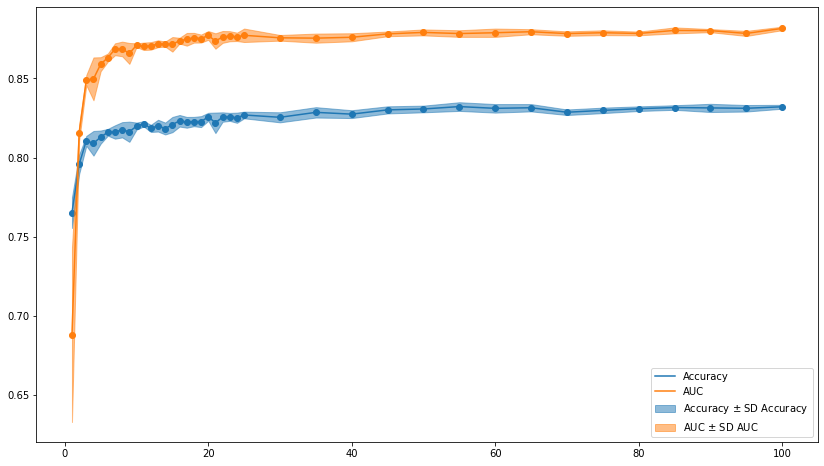

In [20]:
result = evaluate_n_epochs_through_prediction(data_train, data_test, dataset_dir = dataset_epochs_comparison_dir,
                                     n_epochs_vec = n_epochs_vec, n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
                                    save_dir = image_dir, save_path = "predictive_performance_against_n_epochs.svg",
                                             legend_pos="lower right")

In [82]:
result

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Epochs1,0.765139,0.687973,0.009671,0.055176
1,Epochs2,0.795750,0.815595,0.006211,0.004869
2,Epochs3,0.810571,0.848965,0.003098,0.003217
3,Epochs4,0.809004,0.849735,0.007799,0.013544
4,Epochs5,0.812922,0.859003,0.004153,0.004424
5,Epochs6,0.815976,0.863185,0.002142,0.002561
6,Epochs7,0.816162,0.868443,0.004239,0.003764
7,Epochs8,0.817556,0.868657,0.004831,0.004620
8,Epochs9,0.816308,0.865819,0.006393,0.006611
9,Epochs10,0.819867,0.871027,0.002240,0.001151


In [19]:
dataset_lr_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Learning_rate_comparison")
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
path_finished_lr = ".//Python_objects//qtr_existing_lr_tracker.pkl"
n_synthetic_datasets_lr_comparison = 5
n_epochs_lr = 100

def create_tabGAN_for_lr(opt_lr):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [35]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_lr,
                                                        hyperparams_vec=lr_vec, n_epochs=n_epochs_lr,
                                                        dataset_dir=dataset_lr_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
                                                        restart = False, path_finished_hyperparams = path_finished_lr,
                                                        redo_hyperparams_vec = [], plot_only_new_progress = True,
                                                        hyperparams_name = "learning_rate")

Hyperparameters subfolder creation:   0%|          | 0/5 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

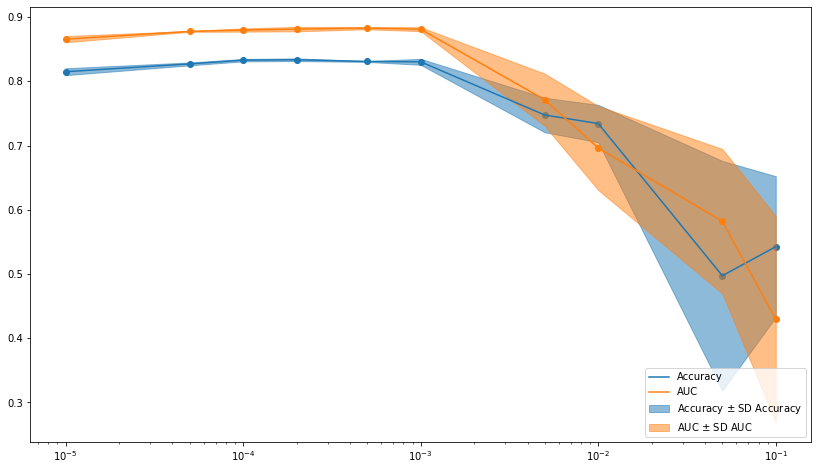

In [38]:
%run "$utils_path"
result_lr = evaluate_hyperparams_through_prediction(data_train, data_test, dataset_dir = dataset_lr_comparison_dir,
                                                 hyperparams_vec=lr_vec,
                                                    hyperparams_name = "learning_rate",
                                                 n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_lr.svg",
                                                 legend_pos="lower right", x_scale="log")

In [39]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.542590,0.429805,0.109769,0.160546
1,learning_rate_0.05,0.497397,0.582190,0.178773,0.112573
2,learning_rate_0.01,0.734316,0.696274,0.029129,0.065320
3,learning_rate_0.005,0.747623,0.771309,0.026860,0.040774
4,learning_rate_0.001,0.830452,0.881271,0.004635,0.003070
5,learning_rate_0.0005,0.830983,0.882891,0.000681,0.001777
6,learning_rate_0.0002,0.833705,0.881402,0.002065,0.003449
7,learning_rate_0.0001,0.833054,0.879992,0.001889,0.002528
8,learning_rate_5e-05,0.827224,0.877832,0.002241,0.000639
9,learning_rate_1e-05,0.815060,0.865679,0.005388,0.004818


In [32]:
dataset_adam_beta1_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Adam_beta1_comparison")
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
path_finished_adam_beta1 = ".//Python_objects//qtr_existing_adam_beta1_tracker.pkl"
n_synthetic_datasets_adam_beta1_comparison = 5
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [33]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_adam_beta1,
                                                        hyperparams_vec=adam_beta1_vec, n_epochs=n_epochs_adam_beta1,
                                                        dataset_dir=dataset_adam_beta1_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_adam_beta1_comparison,
                                                        restart = False, path_finished_hyperparams = path_finished_adam_beta1,
                                                        redo_hyperparams_vec = [], plot_only_new_progress = True,
                                                        hyperparams_name = "Adam_beta1")

Hyperparameters subfolder creation:   0%|          | 0/1 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

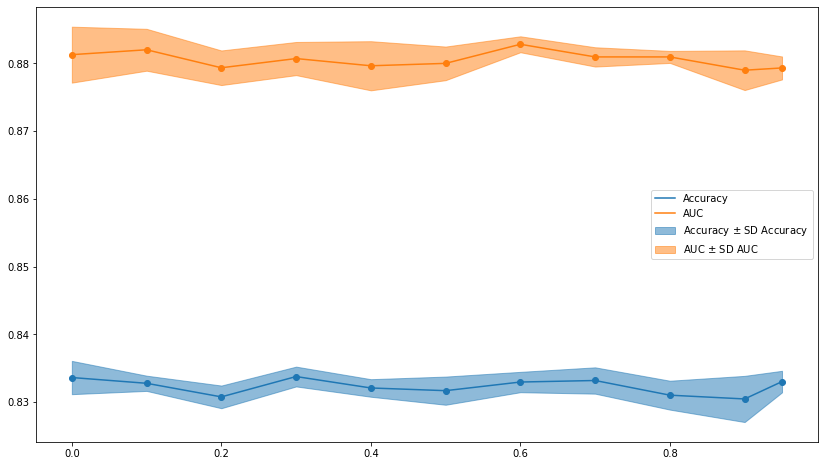

In [34]:
%run "$utils_path"
result_adam_beta1 = evaluate_hyperparams_through_prediction(data_train, data_test,
                                                            dataset_dir = dataset_adam_beta1_comparison_dir,
                                                 hyperparams_vec=adam_beta1_vec,
                                                    hyperparams_name = "Adam_beta1",
                                                 n_synthetic_datasets = n_synthetic_datasets_adam_beta1_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_adam_beta1.svg",
                                                 legend_pos="best")

In [35]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,Adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,Adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,Adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,Adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,Adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,Adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,Adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,Adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,Adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [5]:
dataset_adam_beta2_comparison_dir = os.path.join(const.dir.data_gen(), "tabGAN-qtr//Adam_beta2_comparison")
adam_beta2_vec = [0.01, 0.5, 0.999]
path_finished_adam_beta2 = ".//Python_objects//qtr_existing_adam_beta2_tracker.pkl"
n_synthetic_datasets_adam_beta2_comparison = 5
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TabGAN(data_train, n_critic = n_critic, opt_lr = opt_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [6]:
%run "$utils_path"
generate_multiple_datasets_for_multiple_hyperparameters(create_tabGAN_func=create_tabGAN_for_adam_beta2,
                                                        hyperparams_vec=adam_beta2_vec, n_epochs=n_epochs_adam_beta2,
                                                        dataset_dir=dataset_adam_beta2_comparison_dir,
                                                        n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
                                                        restart=False, path_finished_hyperparams=path_finished_adam_beta2,
                                                        redo_hyperparams_vec=[], plot_only_new_progress=True,
                                                        hyperparams_name = "Adam_beta2")

Hyperparameters subfolder creation:   0%|          | 0/1 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Progress generating dataset 1:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 2:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 3:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 4:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 5:   0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

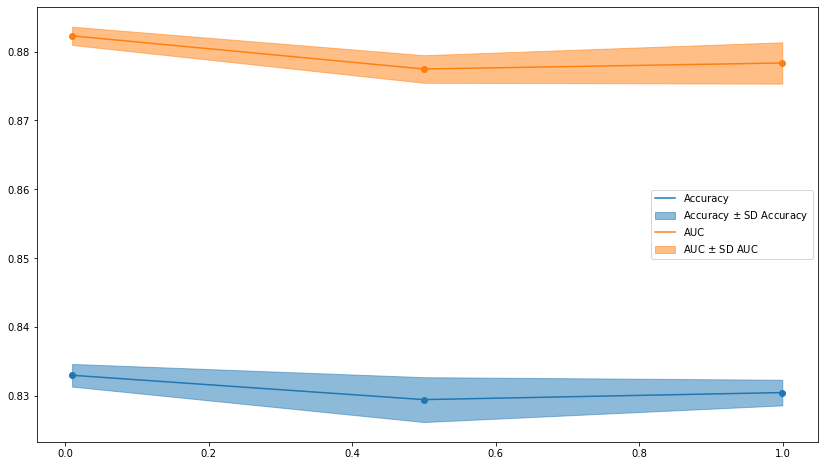

In [7]:
%run "$utils_path"
result_adam_beta2 = evaluate_hyperparams_through_prediction(data_train, data_test,
                                                            dataset_dir = dataset_adam_beta2_comparison_dir,
                                                 hyperparams_vec=adam_beta2_vec,
                                                    hyperparams_name = "Adam_beta2",
                                                 n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
                                                 save_dir = image_dir,
                                                 save_path = "predictive_performance_against_adam_beta2.svg",
                                                 legend_pos="best")

In [8]:
result_adam_beta2

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,Adam_beta2_0.01,0.833028,0.882279,0.001644,0.001328
1,Adam_beta2_0.5,0.829495,0.877468,0.003253,0.002003
2,Adam_beta2_0.999,0.830518,0.878340,0.001860,0.002999
